In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [77]:
listostocks = (os.listdir("/home/raflicky/Desktop/NYSE_DATA/1_Hour/Nasdaq_stocks"))

In [186]:
def clean_data(files, path = "/home/raflicky/Desktop/NYSE_DATA/1_Day/Stocks"):
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
        df = pd.merge(df,stock_price,how='left',on='Date')
    return df

In [229]:
import random
def next_batch(dataframe, dataframe2, batch_size, features):
    df_size = len(dataframe)
    sample = batch_size / df_size
    upper_bound = int(sample * 100)
    random_point = random.randint(1,100-upper_bound)
    starting_point = int(df_size * (random_point/100))
    ending_point = starting_point + batch_size
    
    data = dataframe.values
    data = data[starting_point-1:ending_point-1]
    data2 = dataframe2.values
    data2 = data2[starting_point-1:ending_point-1]

    X = data[:-1].reshape(batch_size-1,1,features)
    Y = data2[1:].reshape(batch_size-1)
        
    return X, Y

In [245]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [224]:
my_data_frame = clean_data(listostocks)
my_data_frame = my_data_frame.drop(['Date'], axis=1)
my_data_frame = my_data_frame.fillna(0)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [225]:
working_data = my_data_frame.iloc[0:5000]
working_data_sum = my_data_frame_sum.iloc[0:5000]
validate_data = my_data_frame.iloc[5000:]
validate_data_sum = my_data_frame_sum.iloc[5000:]

In [226]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [246]:
trainingX, trainingY = next_batch2(my_x, my_y, 100)
testingX, testingY = next_batch2(my_x, my_y, 100)

In [247]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 100)

In [159]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [288]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100))
model.add(Dense(1))

Train on 4999 samples, validate on 4999 samples
Epoch 1/20000
 - 2s - loss: 503.3334 - val_loss: 495.2266
Epoch 2/20000
 - 1s - loss: 490.7586 - val_loss: 486.3357
Epoch 3/20000
 - 1s - loss: 482.4568 - val_loss: 479.0918
Epoch 4/20000
 - 1s - loss: 476.3943 - val_loss: 474.1390
Epoch 5/20000
 - 1s - loss: 472.2726 - val_loss: 470.6639
Epoch 6/20000
 - 1s - loss: 469.2647 - val_loss: 467.7833
Epoch 7/20000
 - 1s - loss: 466.5844 - val_loss: 464.6606
Epoch 8/20000
 - 1s - loss: 460.2055 - val_loss: 460.6809
Epoch 9/20000
 - 1s - loss: 457.0140 - val_loss: 458.1932
Epoch 10/20000
 - 1s - loss: 453.0537 - val_loss: 449.0085
Epoch 11/20000
 - 1s - loss: 447.1290 - val_loss: 445.1194
Epoch 12/20000
 - 1s - loss: 442.6796 - val_loss: 440.8107
Epoch 13/20000
 - 1s - loss: 437.6618 - val_loss: 437.1140
Epoch 14/20000
 - 1s - loss: 434.2826 - val_loss: 437.2522
Epoch 15/20000
 - 1s - loss: 431.1738 - val_loss: 430.7152
Epoch 16/20000
 - 1s - loss: 427.1093 - val_loss: 426.9168
Epoch 17/20000
 -

Epoch 139/20000
 - 1s - loss: 174.8074 - val_loss: 176.2920
Epoch 140/20000
 - 1s - loss: 174.5207 - val_loss: 171.9648
Epoch 141/20000
 - 1s - loss: 172.1285 - val_loss: 170.5146
Epoch 142/20000
 - 1s - loss: 170.1006 - val_loss: 167.3605
Epoch 143/20000
 - 1s - loss: 167.6395 - val_loss: 167.3413
Epoch 144/20000
 - 1s - loss: 166.7163 - val_loss: 164.1014
Epoch 145/20000
 - 1s - loss: 164.6834 - val_loss: 164.8183
Epoch 146/20000
 - 1s - loss: 164.3716 - val_loss: 164.5396
Epoch 147/20000
 - 1s - loss: 163.0573 - val_loss: 168.3630
Epoch 148/20000
 - 1s - loss: 163.9860 - val_loss: 166.4528
Epoch 149/20000
 - 1s - loss: 162.7597 - val_loss: 165.4354
Epoch 150/20000
 - 1s - loss: 161.7918 - val_loss: 159.4190
Epoch 151/20000
 - 1s - loss: 158.3097 - val_loss: 160.7294
Epoch 152/20000
 - 1s - loss: 158.3546 - val_loss: 156.4134
Epoch 153/20000
 - 1s - loss: 155.4450 - val_loss: 156.7499
Epoch 154/20000
 - 1s - loss: 154.5254 - val_loss: 152.9037
Epoch 155/20000
 - 1s - loss: 152.6061 -

Epoch 278/20000
 - 1s - loss: 74.8863 - val_loss: 73.7344
Epoch 279/20000
 - 1s - loss: 74.6312 - val_loss: 72.4814
Epoch 280/20000
 - 1s - loss: 73.6505 - val_loss: 71.8979
Epoch 281/20000
 - 1s - loss: 72.7410 - val_loss: 71.6380
Epoch 282/20000
 - 1s - loss: 72.2638 - val_loss: 69.3952
Epoch 283/20000
 - 1s - loss: 71.3024 - val_loss: 70.9495
Epoch 284/20000
 - 1s - loss: 71.3918 - val_loss: 70.9157
Epoch 285/20000
 - 1s - loss: 72.1165 - val_loss: 69.2436
Epoch 286/20000
 - 1s - loss: 70.9339 - val_loss: 67.6227
Epoch 287/20000
 - 1s - loss: 70.8617 - val_loss: 67.9174
Epoch 288/20000
 - 1s - loss: 70.1274 - val_loss: 69.4958
Epoch 289/20000
 - 1s - loss: 71.1477 - val_loss: 68.8392
Epoch 290/20000
 - 1s - loss: 70.5375 - val_loss: 67.3389
Epoch 291/20000
 - 1s - loss: 70.5801 - val_loss: 68.0611
Epoch 292/20000
 - 1s - loss: 69.9420 - val_loss: 69.2658
Epoch 293/20000
 - 1s - loss: 71.0916 - val_loss: 68.0263
Epoch 294/20000
 - 1s - loss: 69.6321 - val_loss: 67.2704
Epoch 295/2000

 - 1s - loss: 52.6066 - val_loss: 50.8521
Epoch 420/20000
 - 1s - loss: 50.7270 - val_loss: 48.4618
Epoch 421/20000
 - 1s - loss: 50.8267 - val_loss: 47.3370
Epoch 422/20000
 - 1s - loss: 49.3042 - val_loss: 47.5654
Epoch 423/20000
 - 1s - loss: 48.8024 - val_loss: 44.9459
Epoch 424/20000
 - 1s - loss: 49.1576 - val_loss: 45.4336
Epoch 425/20000
 - 1s - loss: 48.0046 - val_loss: 45.7960
Epoch 426/20000
 - 1s - loss: 47.8661 - val_loss: 45.4049
Epoch 427/20000
 - 1s - loss: 47.9545 - val_loss: 45.5498
Epoch 428/20000
 - 1s - loss: 47.9763 - val_loss: 44.9467
Epoch 429/20000
 - 1s - loss: 48.4410 - val_loss: 45.8550
Epoch 430/20000
 - 1s - loss: 48.3353 - val_loss: 46.5046
Epoch 431/20000
 - 1s - loss: 48.6686 - val_loss: 47.3703
Epoch 432/20000
 - 1s - loss: 49.3805 - val_loss: 48.2146
Epoch 433/20000
 - 1s - loss: 50.1891 - val_loss: 46.3305
Epoch 434/20000
 - 1s - loss: 48.9048 - val_loss: 47.5486
Epoch 435/20000
 - 1s - loss: 48.3087 - val_loss: 47.4899
Epoch 436/20000
 - 1s - loss: 

Epoch 561/20000
 - 1s - loss: 37.0671 - val_loss: 35.0978
Epoch 562/20000
 - 1s - loss: 36.8396 - val_loss: 36.8300
Epoch 563/20000
 - 1s - loss: 38.1462 - val_loss: 36.0623
Epoch 564/20000
 - 1s - loss: 38.3938 - val_loss: 34.3993
Epoch 565/20000
 - 1s - loss: 37.0350 - val_loss: 33.8364
Epoch 566/20000
 - 1s - loss: 36.0080 - val_loss: 34.1239
Epoch 567/20000
 - 1s - loss: 35.8871 - val_loss: 33.4972
Epoch 568/20000
 - 1s - loss: 36.2242 - val_loss: 33.5583
Epoch 569/20000
 - 1s - loss: 35.9351 - val_loss: 32.7350
Epoch 570/20000
 - 1s - loss: 36.4431 - val_loss: 36.4157
Epoch 571/20000
 - 1s - loss: 36.9834 - val_loss: 36.1763
Epoch 572/20000
 - 1s - loss: 37.4436 - val_loss: 34.7031
Epoch 573/20000
 - 1s - loss: 36.6455 - val_loss: 34.2130
Epoch 574/20000
 - 1s - loss: 36.6683 - val_loss: 33.3028
Epoch 575/20000
 - 1s - loss: 35.7874 - val_loss: 34.5530
Epoch 576/20000
 - 1s - loss: 36.0016 - val_loss: 33.3245
Epoch 577/20000
 - 1s - loss: 35.8001 - val_loss: 36.1049
Epoch 578/2000

 - 1s - loss: 28.9123 - val_loss: 27.6392
Epoch 703/20000
 - 1s - loss: 29.1092 - val_loss: 27.3235
Epoch 704/20000
 - 1s - loss: 29.0185 - val_loss: 27.2344
Epoch 705/20000
 - 1s - loss: 29.4775 - val_loss: 26.9479
Epoch 706/20000
 - 1s - loss: 29.0035 - val_loss: 27.9511
Epoch 707/20000
 - 1s - loss: 29.1155 - val_loss: 26.6488
Epoch 708/20000
 - 1s - loss: 28.8614 - val_loss: 27.0687
Epoch 709/20000
 - 1s - loss: 29.7276 - val_loss: 27.5725
Epoch 710/20000
 - 1s - loss: 29.4574 - val_loss: 27.5581
Epoch 711/20000
 - 1s - loss: 29.3894 - val_loss: 28.2122
Epoch 712/20000
 - 1s - loss: 29.4550 - val_loss: 26.9352
Epoch 713/20000
 - 1s - loss: 29.0246 - val_loss: 27.7772
Epoch 714/20000
 - 1s - loss: 28.9076 - val_loss: 27.2751
Epoch 715/20000
 - 1s - loss: 28.8991 - val_loss: 27.9645
Epoch 716/20000
 - 1s - loss: 29.3552 - val_loss: 27.2304
Epoch 717/20000
 - 1s - loss: 28.7660 - val_loss: 27.2095
Epoch 718/20000
 - 1s - loss: 28.9203 - val_loss: 26.6919
Epoch 719/20000
 - 1s - loss: 

Epoch 844/20000
 - 1s - loss: 24.6218 - val_loss: 21.2521
Epoch 845/20000
 - 1s - loss: 24.4442 - val_loss: 22.1043
Epoch 846/20000
 - 1s - loss: 24.1555 - val_loss: 21.6147
Epoch 847/20000
 - 1s - loss: 24.7128 - val_loss: 23.8544
Epoch 848/20000
 - 1s - loss: 25.2965 - val_loss: 22.3911
Epoch 849/20000
 - 1s - loss: 24.5611 - val_loss: 21.5122
Epoch 850/20000
 - 1s - loss: 22.9004 - val_loss: 21.5482
Epoch 851/20000
 - 1s - loss: 23.6963 - val_loss: 21.8205
Epoch 852/20000
 - 1s - loss: 23.7534 - val_loss: 21.8720
Epoch 853/20000
 - 1s - loss: 23.5509 - val_loss: 20.7854
Epoch 854/20000
 - 1s - loss: 23.9094 - val_loss: 23.3245
Epoch 855/20000
 - 1s - loss: 23.6076 - val_loss: 22.9945
Epoch 856/20000
 - 1s - loss: 23.7579 - val_loss: 20.6413
Epoch 857/20000
 - 1s - loss: 23.6424 - val_loss: 21.5565
Epoch 858/20000
 - 1s - loss: 23.8143 - val_loss: 20.7764
Epoch 859/20000
 - 1s - loss: 23.9019 - val_loss: 20.8410
Epoch 860/20000
 - 1s - loss: 23.7500 - val_loss: 23.4708
Epoch 861/2000

 - 1s - loss: 21.8588 - val_loss: 19.7861
Epoch 986/20000
 - 1s - loss: 21.7466 - val_loss: 19.7094
Epoch 987/20000
 - 1s - loss: 20.9825 - val_loss: 18.5799
Epoch 988/20000
 - 1s - loss: 21.2766 - val_loss: 20.4530
Epoch 989/20000
 - 1s - loss: 21.3609 - val_loss: 19.1836
Epoch 990/20000
 - 1s - loss: 22.2472 - val_loss: 21.9754
Epoch 991/20000
 - 1s - loss: 22.8844 - val_loss: 20.5368
Epoch 992/20000
 - 1s - loss: 21.8615 - val_loss: 21.1430
Epoch 993/20000
 - 1s - loss: 22.3203 - val_loss: 19.4126
Epoch 994/20000
 - 1s - loss: 21.6993 - val_loss: 19.5144
Epoch 995/20000
 - 1s - loss: 21.7017 - val_loss: 19.4497
Epoch 996/20000
 - 1s - loss: 21.8483 - val_loss: 18.9277
Epoch 997/20000
 - 1s - loss: 21.6521 - val_loss: 19.0544
Epoch 998/20000
 - 1s - loss: 21.1330 - val_loss: 17.8537
Epoch 999/20000
 - 1s - loss: 20.4899 - val_loss: 19.0102
Epoch 1000/20000
 - 1s - loss: 21.1361 - val_loss: 20.3873
Epoch 1001/20000
 - 1s - loss: 20.8141 - val_loss: 18.7202
Epoch 1002/20000
 - 1s - los

Epoch 1125/20000
 - 1s - loss: 20.5899 - val_loss: 19.6969
Epoch 1126/20000
 - 1s - loss: 21.2372 - val_loss: 17.9317
Epoch 1127/20000
 - 1s - loss: 21.0262 - val_loss: 18.6446
Epoch 1128/20000
 - 1s - loss: 20.3403 - val_loss: 18.1520
Epoch 1129/20000
 - 1s - loss: 21.1037 - val_loss: 18.1208
Epoch 1130/20000
 - 1s - loss: 20.3048 - val_loss: 18.0356
Epoch 1131/20000
 - 1s - loss: 19.9465 - val_loss: 18.2403
Epoch 1132/20000
 - 1s - loss: 20.3049 - val_loss: 18.4388
Epoch 1133/20000
 - 1s - loss: 20.2598 - val_loss: 17.3671
Epoch 1134/20000
 - 1s - loss: 20.3978 - val_loss: 18.3720
Epoch 1135/20000
 - 1s - loss: 19.9878 - val_loss: 17.4736
Epoch 1136/20000
 - 1s - loss: 20.2690 - val_loss: 19.3117
Epoch 1137/20000
 - 1s - loss: 20.8856 - val_loss: 20.4293
Epoch 1138/20000
 - 1s - loss: 21.8508 - val_loss: 18.3931
Epoch 1139/20000
 - 1s - loss: 21.0258 - val_loss: 17.2495
Epoch 1140/20000
 - 1s - loss: 20.8085 - val_loss: 17.0915
Epoch 1141/20000
 - 1s - loss: 19.6262 - val_loss: 17.44

Epoch 1264/20000
 - 1s - loss: 17.8265 - val_loss: 15.1066
Epoch 1265/20000
 - 1s - loss: 18.3422 - val_loss: 15.6130
Epoch 1266/20000
 - 1s - loss: 17.6665 - val_loss: 16.0282
Epoch 1267/20000
 - 1s - loss: 18.4298 - val_loss: 16.3508
Epoch 1268/20000
 - 1s - loss: 18.0427 - val_loss: 15.0293
Epoch 1269/20000
 - 1s - loss: 17.3513 - val_loss: 15.1825
Epoch 1270/20000
 - 1s - loss: 17.7428 - val_loss: 16.2029
Epoch 1271/20000
 - 1s - loss: 17.7533 - val_loss: 14.8649
Epoch 1272/20000
 - 1s - loss: 17.9497 - val_loss: 16.7055
Epoch 1273/20000
 - 1s - loss: 18.2191 - val_loss: 17.2382
Epoch 1274/20000
 - 1s - loss: 19.0991 - val_loss: 17.4938
Epoch 1275/20000
 - 1s - loss: 18.7614 - val_loss: 15.6091
Epoch 1276/20000
 - 1s - loss: 18.8567 - val_loss: 16.6857
Epoch 1277/20000
 - 1s - loss: 18.1362 - val_loss: 15.3700
Epoch 1278/20000
 - 1s - loss: 18.3338 - val_loss: 16.3231
Epoch 1279/20000
 - 1s - loss: 18.4743 - val_loss: 16.0348
Epoch 1280/20000
 - 1s - loss: 18.7200 - val_loss: 15.72

Epoch 1403/20000
 - 1s - loss: 16.7550 - val_loss: 15.8631
Epoch 1404/20000
 - 1s - loss: 17.1749 - val_loss: 14.6727
Epoch 1405/20000
 - 1s - loss: 16.8405 - val_loss: 15.1076
Epoch 1406/20000
 - 1s - loss: 16.2831 - val_loss: 13.5688
Epoch 1407/20000
 - 1s - loss: 15.8152 - val_loss: 14.3860
Epoch 1408/20000
 - 1s - loss: 16.3216 - val_loss: 15.2884
Epoch 1409/20000
 - 1s - loss: 17.1081 - val_loss: 15.8787
Epoch 1410/20000
 - 1s - loss: 16.7157 - val_loss: 13.3952
Epoch 1411/20000
 - 1s - loss: 16.1824 - val_loss: 14.9677
Epoch 1412/20000
 - 1s - loss: 16.0982 - val_loss: 15.1034
Epoch 1413/20000
 - 1s - loss: 16.7245 - val_loss: 16.0097
Epoch 1414/20000
 - 1s - loss: 16.3630 - val_loss: 14.3346
Epoch 1415/20000
 - 1s - loss: 16.4912 - val_loss: 15.3263
Epoch 1416/20000
 - 1s - loss: 16.7079 - val_loss: 13.7106
Epoch 1417/20000
 - 1s - loss: 16.3092 - val_loss: 15.0051
Epoch 1418/20000
 - 1s - loss: 16.7612 - val_loss: 15.0695
Epoch 1419/20000
 - 1s - loss: 17.0850 - val_loss: 14.39

Epoch 1542/20000
 - 1s - loss: 17.0653 - val_loss: 14.5365
Epoch 1543/20000
 - 1s - loss: 15.4383 - val_loss: 13.0107
Epoch 1544/20000
 - 1s - loss: 15.6960 - val_loss: 15.1500
Epoch 1545/20000
 - 1s - loss: 16.5343 - val_loss: 13.1989
Epoch 1546/20000
 - 1s - loss: 15.5379 - val_loss: 14.6493
Epoch 1547/20000
 - 1s - loss: 15.3872 - val_loss: 14.0150
Epoch 1548/20000
 - 1s - loss: 15.8272 - val_loss: 14.3273
Epoch 1549/20000
 - 1s - loss: 15.5583 - val_loss: 13.3559
Epoch 1550/20000
 - 1s - loss: 15.7781 - val_loss: 14.9366
Epoch 1551/20000
 - 1s - loss: 16.3934 - val_loss: 14.2411
Epoch 1552/20000
 - 1s - loss: 16.4320 - val_loss: 15.6439
Epoch 1553/20000
 - 1s - loss: 16.5654 - val_loss: 13.2109
Epoch 1554/20000
 - 1s - loss: 16.5024 - val_loss: 15.3449
Epoch 1555/20000
 - 1s - loss: 16.5279 - val_loss: 14.5413
Epoch 1556/20000
 - 1s - loss: 16.2611 - val_loss: 14.8154
Epoch 1557/20000
 - 1s - loss: 15.9557 - val_loss: 13.3961
Epoch 1558/20000
 - 1s - loss: 16.2064 - val_loss: 15.47

Epoch 1681/20000
 - 1s - loss: 15.2660 - val_loss: 14.3923
Epoch 1682/20000
 - 1s - loss: 15.4594 - val_loss: 12.6864
Epoch 1683/20000
 - 1s - loss: 15.5633 - val_loss: 14.3437
Epoch 1684/20000
 - 1s - loss: 16.3278 - val_loss: 14.5187
Epoch 1685/20000
 - 1s - loss: 15.3873 - val_loss: 13.6690
Epoch 1686/20000
 - 1s - loss: 15.1473 - val_loss: 13.1371
Epoch 1687/20000
 - 1s - loss: 15.6352 - val_loss: 14.3847
Epoch 1688/20000
 - 1s - loss: 15.2871 - val_loss: 13.5700
Epoch 1689/20000
 - 1s - loss: 15.0289 - val_loss: 14.2013
Epoch 1690/20000
 - 1s - loss: 15.5176 - val_loss: 14.1435
Epoch 1691/20000
 - 1s - loss: 15.6299 - val_loss: 13.4594
Epoch 1692/20000
 - 1s - loss: 15.0032 - val_loss: 14.4208
Epoch 1693/20000
 - 1s - loss: 14.7157 - val_loss: 13.2284
Epoch 1694/20000
 - 1s - loss: 15.7557 - val_loss: 14.0932
Epoch 1695/20000
 - 1s - loss: 15.1886 - val_loss: 12.5803
Epoch 1696/20000
 - 1s - loss: 15.1947 - val_loss: 15.0764
Epoch 1697/20000
 - 1s - loss: 16.6615 - val_loss: 13.95

Epoch 1820/20000
 - 1s - loss: 15.6365 - val_loss: 13.2898
Epoch 1821/20000
 - 1s - loss: 14.9252 - val_loss: 12.7611
Epoch 1822/20000
 - 1s - loss: 15.1580 - val_loss: 14.2415
Epoch 1823/20000
 - 1s - loss: 14.4544 - val_loss: 12.4924
Epoch 1824/20000
 - 1s - loss: 14.9040 - val_loss: 14.2374
Epoch 1825/20000
 - 1s - loss: 15.9665 - val_loss: 14.0072
Epoch 1826/20000
 - 1s - loss: 14.6739 - val_loss: 12.6282
Epoch 1827/20000
 - 1s - loss: 14.5880 - val_loss: 13.8546
Epoch 1828/20000
 - 1s - loss: 14.6220 - val_loss: 12.6520
Epoch 1829/20000
 - 1s - loss: 14.7243 - val_loss: 14.5161
Epoch 1830/20000
 - 1s - loss: 15.4994 - val_loss: 13.6932
Epoch 1831/20000
 - 1s - loss: 15.8425 - val_loss: 14.4949
Epoch 1832/20000
 - 1s - loss: 14.8982 - val_loss: 13.8136
Epoch 1833/20000
 - 1s - loss: 15.0136 - val_loss: 12.7761
Epoch 1834/20000
 - 1s - loss: 14.6483 - val_loss: 13.8914
Epoch 1835/20000
 - 1s - loss: 14.5959 - val_loss: 13.2362
Epoch 1836/20000
 - 1s - loss: 14.8068 - val_loss: 13.36

Epoch 1959/20000
 - 1s - loss: 15.5555 - val_loss: 12.1939
Epoch 1960/20000
 - 1s - loss: 15.1237 - val_loss: 14.2654
Epoch 1961/20000
 - 1s - loss: 15.0336 - val_loss: 13.1055
Epoch 1962/20000
 - 1s - loss: 14.4213 - val_loss: 13.5762
Epoch 1963/20000
 - 1s - loss: 14.5530 - val_loss: 13.1627
Epoch 1964/20000
 - 1s - loss: 15.5362 - val_loss: 13.6055
Epoch 1965/20000
 - 1s - loss: 14.4067 - val_loss: 13.9291
Epoch 1966/20000
 - 1s - loss: 15.0616 - val_loss: 13.1479
Epoch 1967/20000
 - 1s - loss: 14.2968 - val_loss: 14.0196
Epoch 1968/20000
 - 1s - loss: 14.2890 - val_loss: 12.7760
Epoch 1969/20000
 - 1s - loss: 14.4385 - val_loss: 13.7475
Epoch 1970/20000
 - 1s - loss: 14.1930 - val_loss: 12.4893
Epoch 1971/20000
 - 1s - loss: 14.8666 - val_loss: 14.0020
Epoch 1972/20000
 - 1s - loss: 15.3335 - val_loss: 13.9241
Epoch 1973/20000
 - 1s - loss: 14.9777 - val_loss: 12.8439
Epoch 1974/20000
 - 1s - loss: 15.0074 - val_loss: 14.5724
Epoch 1975/20000
 - 1s - loss: 15.1594 - val_loss: 12.71

Epoch 2098/20000
 - 1s - loss: 14.4186 - val_loss: 12.7682
Epoch 2099/20000
 - 1s - loss: 14.6195 - val_loss: 14.8957
Epoch 2100/20000
 - 1s - loss: 14.9350 - val_loss: 12.5370
Epoch 2101/20000
 - 1s - loss: 14.5509 - val_loss: 14.3374
Epoch 2102/20000
 - 1s - loss: 14.7784 - val_loss: 12.8750
Epoch 2103/20000
 - 1s - loss: 14.6938 - val_loss: 14.1628
Epoch 2104/20000
 - 1s - loss: 15.3332 - val_loss: 13.7988
Epoch 2105/20000
 - 1s - loss: 15.2571 - val_loss: 14.0665
Epoch 2106/20000
 - 1s - loss: 15.9668 - val_loss: 14.2383
Epoch 2107/20000
 - 1s - loss: 15.4887 - val_loss: 12.5770
Epoch 2108/20000
 - 1s - loss: 15.2176 - val_loss: 14.4217
Epoch 2109/20000
 - 1s - loss: 14.4401 - val_loss: 12.8828
Epoch 2110/20000
 - 1s - loss: 14.9223 - val_loss: 13.7937
Epoch 2111/20000
 - 1s - loss: 15.0561 - val_loss: 13.1267
Epoch 2112/20000
 - 1s - loss: 14.3900 - val_loss: 13.3486
Epoch 2113/20000
 - 1s - loss: 14.1604 - val_loss: 13.0556
Epoch 2114/20000
 - 1s - loss: 14.6172 - val_loss: 12.73

Epoch 2237/20000
 - 1s - loss: 14.1561 - val_loss: 12.0623
Epoch 2238/20000
 - 1s - loss: 14.5686 - val_loss: 13.8575
Epoch 2239/20000
 - 1s - loss: 14.7046 - val_loss: 13.3786
Epoch 2240/20000
 - 1s - loss: 14.4750 - val_loss: 12.8109
Epoch 2241/20000
 - 1s - loss: 13.9482 - val_loss: 13.1077
Epoch 2242/20000
 - 1s - loss: 14.3242 - val_loss: 13.2508
Epoch 2243/20000
 - 1s - loss: 14.3543 - val_loss: 13.7711
Epoch 2244/20000
 - 1s - loss: 14.1924 - val_loss: 13.2745
Epoch 2245/20000
 - 1s - loss: 14.3516 - val_loss: 14.6955
Epoch 2246/20000
 - 1s - loss: 14.7556 - val_loss: 13.1272
Epoch 2247/20000
 - 1s - loss: 14.7915 - val_loss: 13.7020
Epoch 2248/20000
 - 1s - loss: 14.5367 - val_loss: 12.8040
Epoch 2249/20000
 - 1s - loss: 15.0064 - val_loss: 13.4654
Epoch 2250/20000
 - 1s - loss: 14.9297 - val_loss: 13.5745
Epoch 2251/20000
 - 1s - loss: 14.9069 - val_loss: 12.3475
Epoch 2252/20000
 - 1s - loss: 15.0948 - val_loss: 13.3255
Epoch 2253/20000
 - 1s - loss: 14.3893 - val_loss: 12.68

Epoch 2376/20000
 - 1s - loss: 14.9935 - val_loss: 13.9754
Epoch 2377/20000
 - 1s - loss: 13.8775 - val_loss: 13.6453
Epoch 2378/20000
 - 1s - loss: 14.5116 - val_loss: 12.4097
Epoch 2379/20000
 - 1s - loss: 15.0159 - val_loss: 13.3342
Epoch 2380/20000
 - 1s - loss: 13.7779 - val_loss: 12.2609
Epoch 2381/20000
 - 1s - loss: 14.1674 - val_loss: 13.7175
Epoch 2382/20000
 - 1s - loss: 14.2940 - val_loss: 12.0383
Epoch 2383/20000
 - 1s - loss: 14.5850 - val_loss: 14.0033
Epoch 2384/20000
 - 1s - loss: 15.1899 - val_loss: 13.5284
Epoch 2385/20000
 - 1s - loss: 14.1452 - val_loss: 12.5122
Epoch 2386/20000
 - 1s - loss: 14.7475 - val_loss: 14.1843
Epoch 2387/20000
 - 1s - loss: 15.0043 - val_loss: 11.9484
Epoch 2388/20000
 - 1s - loss: 14.5003 - val_loss: 14.9851
Epoch 2389/20000
 - 1s - loss: 14.5895 - val_loss: 12.7187
Epoch 2390/20000
 - 1s - loss: 14.1700 - val_loss: 12.3792
Epoch 2391/20000
 - 1s - loss: 13.8928 - val_loss: 13.5140
Epoch 2392/20000
 - 1s - loss: 14.1791 - val_loss: 12.78

Epoch 2515/20000
 - 1s - loss: 14.5738 - val_loss: 13.2477
Epoch 2516/20000
 - 1s - loss: 15.0147 - val_loss: 14.2640
Epoch 2517/20000
 - 1s - loss: 14.9412 - val_loss: 12.3037
Epoch 2518/20000
 - 1s - loss: 14.3244 - val_loss: 13.8692
Epoch 2519/20000
 - 1s - loss: 14.3158 - val_loss: 12.8379
Epoch 2520/20000
 - 1s - loss: 14.0371 - val_loss: 13.1399
Epoch 2521/20000
 - 1s - loss: 14.2401 - val_loss: 13.1453
Epoch 2522/20000
 - 1s - loss: 14.5604 - val_loss: 13.2388
Epoch 2523/20000
 - 1s - loss: 14.4131 - val_loss: 12.4955
Epoch 2524/20000
 - 1s - loss: 14.2637 - val_loss: 13.1038
Epoch 2525/20000
 - 1s - loss: 14.4986 - val_loss: 12.3751
Epoch 2526/20000
 - 1s - loss: 14.3597 - val_loss: 12.7968
Epoch 2527/20000
 - 1s - loss: 14.2491 - val_loss: 13.8255
Epoch 2528/20000
 - 1s - loss: 14.4302 - val_loss: 11.8569
Epoch 2529/20000
 - 1s - loss: 14.5816 - val_loss: 14.4854
Epoch 2530/20000
 - 1s - loss: 14.9862 - val_loss: 12.6313
Epoch 2531/20000
 - 1s - loss: 14.8266 - val_loss: 14.61

Epoch 2654/20000
 - 1s - loss: 13.6314 - val_loss: 12.8725
Epoch 2655/20000
 - 1s - loss: 13.6826 - val_loss: 12.0940
Epoch 2656/20000
 - 1s - loss: 14.1604 - val_loss: 13.6658
Epoch 2657/20000
 - 1s - loss: 13.8887 - val_loss: 12.7790
Epoch 2658/20000
 - 1s - loss: 14.2919 - val_loss: 14.1150
Epoch 2659/20000
 - 1s - loss: 14.6686 - val_loss: 12.7186
Epoch 2660/20000
 - 1s - loss: 14.7463 - val_loss: 13.9431
Epoch 2661/20000
 - 1s - loss: 13.9858 - val_loss: 12.3203
Epoch 2662/20000
 - 1s - loss: 14.9187 - val_loss: 14.4083
Epoch 2663/20000
 - 1s - loss: 14.7771 - val_loss: 12.0794
Epoch 2664/20000
 - 1s - loss: 14.3138 - val_loss: 14.1125
Epoch 2665/20000
 - 1s - loss: 14.3919 - val_loss: 12.8986
Epoch 2666/20000
 - 1s - loss: 14.6221 - val_loss: 13.1672
Epoch 2667/20000
 - 1s - loss: 13.9688 - val_loss: 13.2134
Epoch 2668/20000
 - 1s - loss: 14.2258 - val_loss: 13.0638
Epoch 2669/20000
 - 1s - loss: 13.7239 - val_loss: 12.8118
Epoch 2670/20000
 - 1s - loss: 13.9531 - val_loss: 13.33

Epoch 2793/20000
 - 1s - loss: 14.1468 - val_loss: 12.3040
Epoch 2794/20000
 - 1s - loss: 13.7554 - val_loss: 12.6081
Epoch 2795/20000
 - 1s - loss: 14.3163 - val_loss: 13.1494
Epoch 2796/20000
 - 1s - loss: 13.7447 - val_loss: 12.2803
Epoch 2797/20000
 - 1s - loss: 13.9934 - val_loss: 12.9473
Epoch 2798/20000
 - 1s - loss: 13.6043 - val_loss: 12.9769
Epoch 2799/20000
 - 1s - loss: 14.2969 - val_loss: 13.8432
Epoch 2800/20000
 - 1s - loss: 14.2825 - val_loss: 13.0746
Epoch 2801/20000
 - 1s - loss: 13.9991 - val_loss: 12.9473
Epoch 2802/20000
 - 1s - loss: 13.8499 - val_loss: 11.9484
Epoch 2803/20000
 - 1s - loss: 13.3116 - val_loss: 12.7898
Epoch 2804/20000
 - 1s - loss: 13.2896 - val_loss: 11.6146
Epoch 2805/20000
 - 1s - loss: 13.6846 - val_loss: 12.8038
Epoch 2806/20000
 - 1s - loss: 14.3269 - val_loss: 12.8196
Epoch 2807/20000
 - 1s - loss: 14.4012 - val_loss: 12.2737
Epoch 2808/20000
 - 1s - loss: 13.7099 - val_loss: 14.0120
Epoch 2809/20000
 - 1s - loss: 13.9848 - val_loss: 11.50

Epoch 2932/20000
 - 1s - loss: 13.5363 - val_loss: 12.3263
Epoch 2933/20000
 - 1s - loss: 13.0844 - val_loss: 12.3448
Epoch 2934/20000
 - 1s - loss: 13.4893 - val_loss: 12.8464
Epoch 2935/20000
 - 1s - loss: 13.1809 - val_loss: 13.6527
Epoch 2936/20000
 - 1s - loss: 14.0711 - val_loss: 13.2719
Epoch 2937/20000
 - 1s - loss: 13.5081 - val_loss: 11.9801
Epoch 2938/20000
 - 1s - loss: 13.9703 - val_loss: 13.3139
Epoch 2939/20000
 - 1s - loss: 13.1163 - val_loss: 11.6899
Epoch 2940/20000
 - 1s - loss: 13.8073 - val_loss: 13.4047
Epoch 2941/20000
 - 1s - loss: 14.1894 - val_loss: 12.7605
Epoch 2942/20000
 - 1s - loss: 14.3557 - val_loss: 13.5224
Epoch 2943/20000
 - 1s - loss: 14.4410 - val_loss: 12.6113
Epoch 2944/20000
 - 1s - loss: 13.8962 - val_loss: 11.7887
Epoch 2945/20000
 - 1s - loss: 13.8549 - val_loss: 13.1963
Epoch 2946/20000
 - 1s - loss: 13.7319 - val_loss: 12.0228
Epoch 2947/20000
 - 1s - loss: 13.5851 - val_loss: 13.1365
Epoch 2948/20000
 - 1s - loss: 13.7460 - val_loss: 12.21

Epoch 3071/20000
 - 1s - loss: 13.0516 - val_loss: 12.4903
Epoch 3072/20000
 - 1s - loss: 13.5710 - val_loss: 12.0364
Epoch 3073/20000
 - 1s - loss: 13.6207 - val_loss: 12.6273
Epoch 3074/20000
 - 1s - loss: 13.7446 - val_loss: 12.3724
Epoch 3075/20000
 - 1s - loss: 13.8695 - val_loss: 12.1402
Epoch 3076/20000
 - 1s - loss: 13.1805 - val_loss: 11.9611
Epoch 3077/20000
 - 1s - loss: 13.4260 - val_loss: 12.9234
Epoch 3078/20000
 - 1s - loss: 13.5351 - val_loss: 12.6677
Epoch 3079/20000
 - 1s - loss: 13.9759 - val_loss: 13.6489
Epoch 3080/20000
 - 1s - loss: 13.7453 - val_loss: 12.7985
Epoch 3081/20000
 - 1s - loss: 14.2761 - val_loss: 12.7868
Epoch 3082/20000
 - 1s - loss: 13.6090 - val_loss: 12.6052
Epoch 3083/20000
 - 1s - loss: 13.1765 - val_loss: 11.3806
Epoch 3084/20000
 - 1s - loss: 13.6291 - val_loss: 13.3602
Epoch 3085/20000
 - 1s - loss: 13.6774 - val_loss: 12.2169
Epoch 3086/20000
 - 1s - loss: 13.6052 - val_loss: 13.5337
Epoch 3087/20000
 - 1s - loss: 14.4922 - val_loss: 13.82

Epoch 3210/20000
 - 1s - loss: 13.5875 - val_loss: 12.7839
Epoch 3211/20000
 - 1s - loss: 13.5854 - val_loss: 12.2348
Epoch 3212/20000
 - 1s - loss: 14.0625 - val_loss: 12.8758
Epoch 3213/20000
 - 1s - loss: 14.1662 - val_loss: 13.1665
Epoch 3214/20000
 - 1s - loss: 13.9320 - val_loss: 11.8022
Epoch 3215/20000
 - 1s - loss: 13.1476 - val_loss: 12.3337
Epoch 3216/20000
 - 1s - loss: 13.0246 - val_loss: 12.0052
Epoch 3217/20000
 - 1s - loss: 13.9868 - val_loss: 13.7342
Epoch 3218/20000
 - 1s - loss: 14.6527 - val_loss: 12.5754
Epoch 3219/20000
 - 1s - loss: 13.9316 - val_loss: 12.4648
Epoch 3220/20000
 - 1s - loss: 13.6853 - val_loss: 12.5485
Epoch 3221/20000
 - 1s - loss: 13.2130 - val_loss: 11.8917
Epoch 3222/20000
 - 1s - loss: 13.4977 - val_loss: 13.0507
Epoch 3223/20000
 - 1s - loss: 13.5191 - val_loss: 11.5451
Epoch 3224/20000
 - 1s - loss: 13.6588 - val_loss: 13.2025
Epoch 3225/20000
 - 1s - loss: 14.5027 - val_loss: 12.2793
Epoch 3226/20000
 - 1s - loss: 13.4216 - val_loss: 12.32

Epoch 3349/20000
 - 1s - loss: 13.4332 - val_loss: 11.8024
Epoch 3350/20000
 - 1s - loss: 13.6028 - val_loss: 12.6119
Epoch 3351/20000
 - 1s - loss: 13.3387 - val_loss: 12.2589
Epoch 3352/20000
 - 1s - loss: 13.4889 - val_loss: 12.4811
Epoch 3353/20000
 - 1s - loss: 13.4843 - val_loss: 12.7766
Epoch 3354/20000
 - 1s - loss: 13.6567 - val_loss: 11.4495
Epoch 3355/20000
 - 1s - loss: 13.6637 - val_loss: 12.4525
Epoch 3356/20000
 - 1s - loss: 13.6184 - val_loss: 12.4934
Epoch 3357/20000
 - 1s - loss: 13.4882 - val_loss: 12.4472
Epoch 3358/20000
 - 1s - loss: 14.1725 - val_loss: 12.4411
Epoch 3359/20000
 - 1s - loss: 13.5155 - val_loss: 12.1187
Epoch 3360/20000
 - 1s - loss: 13.5800 - val_loss: 12.5906
Epoch 3361/20000
 - 1s - loss: 13.1827 - val_loss: 11.7594
Epoch 3362/20000
 - 1s - loss: 13.0426 - val_loss: 12.5905
Epoch 3363/20000
 - 1s - loss: 13.3057 - val_loss: 12.0598
Epoch 3364/20000
 - 1s - loss: 13.4123 - val_loss: 12.9044
Epoch 3365/20000
 - 1s - loss: 13.4431 - val_loss: 11.73

Epoch 3488/20000
 - 1s - loss: 13.4411 - val_loss: 12.2664
Epoch 3489/20000
 - 1s - loss: 13.2237 - val_loss: 12.1089
Epoch 3490/20000
 - 1s - loss: 12.6881 - val_loss: 11.6621
Epoch 3491/20000
 - 1s - loss: 13.0672 - val_loss: 12.2648
Epoch 3492/20000
 - 1s - loss: 12.9944 - val_loss: 11.9334
Epoch 3493/20000
 - 1s - loss: 13.5824 - val_loss: 12.8850
Epoch 3494/20000
 - 1s - loss: 13.3112 - val_loss: 12.1635
Epoch 3495/20000
 - 1s - loss: 13.3048 - val_loss: 11.9312
Epoch 3496/20000
 - 1s - loss: 12.8696 - val_loss: 12.2904
Epoch 3497/20000
 - 1s - loss: 13.6071 - val_loss: 12.0072
Epoch 3498/20000
 - 1s - loss: 12.9752 - val_loss: 11.9749
Epoch 3499/20000
 - 1s - loss: 13.1113 - val_loss: 12.7910
Epoch 3500/20000
 - 1s - loss: 13.7670 - val_loss: 12.5568
Epoch 3501/20000
 - 1s - loss: 13.4921 - val_loss: 12.0912
Epoch 3502/20000
 - 1s - loss: 13.6362 - val_loss: 12.6261
Epoch 3503/20000
 - 1s - loss: 13.1397 - val_loss: 11.5077
Epoch 3504/20000
 - 1s - loss: 13.1115 - val_loss: 12.73

Epoch 3627/20000
 - 1s - loss: 13.5687 - val_loss: 12.4792
Epoch 3628/20000
 - 1s - loss: 13.2361 - val_loss: 11.6241
Epoch 3629/20000
 - 1s - loss: 13.6069 - val_loss: 12.6689
Epoch 3630/20000
 - 1s - loss: 13.8137 - val_loss: 12.0823
Epoch 3631/20000
 - 1s - loss: 13.1206 - val_loss: 12.3022
Epoch 3632/20000
 - 1s - loss: 13.0604 - val_loss: 11.6293
Epoch 3633/20000
 - 1s - loss: 13.0099 - val_loss: 12.2421
Epoch 3634/20000
 - 1s - loss: 13.1376 - val_loss: 12.9812
Epoch 3635/20000
 - 1s - loss: 13.0029 - val_loss: 13.1956
Epoch 3636/20000
 - 1s - loss: 13.7873 - val_loss: 12.0815
Epoch 3637/20000
 - 1s - loss: 13.4203 - val_loss: 11.8897
Epoch 3638/20000
 - 1s - loss: 13.6241 - val_loss: 12.2427
Epoch 3639/20000
 - 1s - loss: 13.3371 - val_loss: 12.0114
Epoch 3640/20000
 - 1s - loss: 13.8488 - val_loss: 12.0663
Epoch 3641/20000
 - 1s - loss: 12.9936 - val_loss: 11.8457
Epoch 3642/20000
 - 1s - loss: 13.7348 - val_loss: 12.1788
Epoch 3643/20000
 - 1s - loss: 13.0215 - val_loss: 12.33

Epoch 3766/20000
 - 1s - loss: 13.1910 - val_loss: 11.4696
Epoch 3767/20000
 - 1s - loss: 13.0067 - val_loss: 13.0941
Epoch 3768/20000
 - 1s - loss: 13.4767 - val_loss: 11.7821
Epoch 3769/20000
 - 1s - loss: 13.7905 - val_loss: 13.1495
Epoch 3770/20000
 - 1s - loss: 13.2974 - val_loss: 11.4503
Epoch 3771/20000
 - 1s - loss: 13.4222 - val_loss: 12.4507
Epoch 3772/20000
 - 1s - loss: 13.1416 - val_loss: 11.5044
Epoch 3773/20000
 - 1s - loss: 13.3724 - val_loss: 12.4652
Epoch 3774/20000
 - 1s - loss: 13.5498 - val_loss: 11.3540
Epoch 3775/20000
 - 1s - loss: 12.9660 - val_loss: 12.0171
Epoch 3776/20000
 - 1s - loss: 12.8721 - val_loss: 11.4187
Epoch 3777/20000
 - 1s - loss: 12.7747 - val_loss: 12.0612
Epoch 3778/20000
 - 1s - loss: 12.9770 - val_loss: 12.0191
Epoch 3779/20000
 - 1s - loss: 13.1342 - val_loss: 11.8631
Epoch 3780/20000
 - 1s - loss: 13.7680 - val_loss: 13.1377
Epoch 3781/20000
 - 1s - loss: 13.1937 - val_loss: 11.5038
Epoch 3782/20000
 - 1s - loss: 13.6370 - val_loss: 13.49

Epoch 3905/20000
 - 1s - loss: 13.5507 - val_loss: 11.4431
Epoch 3906/20000
 - 1s - loss: 12.9715 - val_loss: 12.0106
Epoch 3907/20000
 - 1s - loss: 12.6544 - val_loss: 11.6112
Epoch 3908/20000
 - 1s - loss: 12.6821 - val_loss: 11.7755
Epoch 3909/20000
 - 1s - loss: 13.2342 - val_loss: 12.3754
Epoch 3910/20000
 - 1s - loss: 12.6501 - val_loss: 11.3537
Epoch 3911/20000
 - 1s - loss: 13.1327 - val_loss: 12.7286
Epoch 3912/20000
 - 1s - loss: 13.3672 - val_loss: 11.5161
Epoch 3913/20000
 - 1s - loss: 13.1463 - val_loss: 12.2813
Epoch 3914/20000
 - 1s - loss: 12.6183 - val_loss: 11.0410
Epoch 3915/20000
 - 1s - loss: 12.7717 - val_loss: 12.7576
Epoch 3916/20000
 - 1s - loss: 12.7255 - val_loss: 11.2935
Epoch 3917/20000
 - 1s - loss: 13.3286 - val_loss: 12.5515
Epoch 3918/20000
 - 1s - loss: 13.3861 - val_loss: 12.3881
Epoch 3919/20000
 - 1s - loss: 13.3112 - val_loss: 11.6493
Epoch 3920/20000
 - 1s - loss: 12.9744 - val_loss: 11.6264
Epoch 3921/20000
 - 1s - loss: 12.7361 - val_loss: 11.70

Epoch 4044/20000
 - 1s - loss: 12.5395 - val_loss: 11.4141
Epoch 4045/20000
 - 1s - loss: 12.8472 - val_loss: 12.8875
Epoch 4046/20000
 - 1s - loss: 13.8382 - val_loss: 11.6560
Epoch 4047/20000
 - 1s - loss: 13.2700 - val_loss: 12.6029
Epoch 4048/20000
 - 1s - loss: 12.7454 - val_loss: 11.2934
Epoch 4049/20000
 - 1s - loss: 12.9515 - val_loss: 13.2978
Epoch 4050/20000
 - 1s - loss: 14.4124 - val_loss: 12.0840
Epoch 4051/20000
 - 1s - loss: 13.5345 - val_loss: 13.3424
Epoch 4052/20000
 - 1s - loss: 13.5150 - val_loss: 11.5579
Epoch 4053/20000
 - 1s - loss: 13.2401 - val_loss: 11.7281
Epoch 4054/20000
 - 1s - loss: 13.3458 - val_loss: 11.7875
Epoch 4055/20000
 - 1s - loss: 12.7208 - val_loss: 11.9117
Epoch 4056/20000
 - 1s - loss: 12.7003 - val_loss: 11.9534
Epoch 4057/20000
 - 1s - loss: 12.5600 - val_loss: 12.1151
Epoch 4058/20000
 - 1s - loss: 12.9551 - val_loss: 11.8212
Epoch 4059/20000
 - 1s - loss: 12.4811 - val_loss: 11.5783
Epoch 4060/20000
 - 1s - loss: 12.4237 - val_loss: 11.80

Epoch 4183/20000
 - 1s - loss: 12.6711 - val_loss: 11.5053
Epoch 4184/20000
 - 1s - loss: 12.8818 - val_loss: 12.3166
Epoch 4185/20000
 - 1s - loss: 13.9791 - val_loss: 12.3496
Epoch 4186/20000
 - 1s - loss: 13.2417 - val_loss: 12.3339
Epoch 4187/20000
 - 1s - loss: 13.5738 - val_loss: 12.6708
Epoch 4188/20000
 - 1s - loss: 13.1506 - val_loss: 11.9596
Epoch 4189/20000
 - 1s - loss: 13.4693 - val_loss: 13.1572
Epoch 4190/20000
 - 1s - loss: 13.3789 - val_loss: 10.8423
Epoch 4191/20000
 - 1s - loss: 12.6142 - val_loss: 12.1864
Epoch 4192/20000
 - 1s - loss: 12.8681 - val_loss: 11.0777
Epoch 4193/20000
 - 1s - loss: 12.3936 - val_loss: 12.3645
Epoch 4194/20000
 - 1s - loss: 12.9738 - val_loss: 11.9627
Epoch 4195/20000
 - 1s - loss: 12.8452 - val_loss: 11.4551
Epoch 4196/20000
 - 1s - loss: 13.0498 - val_loss: 11.9755
Epoch 4197/20000
 - 1s - loss: 12.2456 - val_loss: 11.1439
Epoch 4198/20000
 - 1s - loss: 12.6116 - val_loss: 12.4993
Epoch 4199/20000
 - 1s - loss: 12.5693 - val_loss: 11.48

Epoch 4322/20000
 - 1s - loss: 12.9882 - val_loss: 11.7648
Epoch 4323/20000
 - 1s - loss: 12.9965 - val_loss: 12.0245
Epoch 4324/20000
 - 1s - loss: 12.8676 - val_loss: 10.7565
Epoch 4325/20000
 - 1s - loss: 12.6835 - val_loss: 11.9310
Epoch 4326/20000
 - 1s - loss: 12.9281 - val_loss: 11.5366
Epoch 4327/20000
 - 1s - loss: 12.5653 - val_loss: 11.6160
Epoch 4328/20000
 - 1s - loss: 12.6294 - val_loss: 11.7794
Epoch 4329/20000
 - 1s - loss: 12.6566 - val_loss: 10.9725
Epoch 4330/20000
 - 1s - loss: 12.5875 - val_loss: 12.0900
Epoch 4331/20000
 - 1s - loss: 12.5170 - val_loss: 11.5665
Epoch 4332/20000
 - 1s - loss: 12.5627 - val_loss: 11.1280
Epoch 4333/20000
 - 1s - loss: 12.6033 - val_loss: 11.8972
Epoch 4334/20000
 - 1s - loss: 12.8139 - val_loss: 11.1941
Epoch 4335/20000
 - 1s - loss: 12.8254 - val_loss: 12.2605
Epoch 4336/20000
 - 1s - loss: 12.9320 - val_loss: 10.7976
Epoch 4337/20000
 - 1s - loss: 13.2832 - val_loss: 12.6930
Epoch 4338/20000
 - 1s - loss: 12.6411 - val_loss: 11.44

Epoch 4461/20000
 - 1s - loss: 12.9872 - val_loss: 12.1827
Epoch 4462/20000
 - 1s - loss: 13.1685 - val_loss: 11.7594
Epoch 4463/20000
 - 1s - loss: 12.6076 - val_loss: 11.8834
Epoch 4464/20000
 - 1s - loss: 12.9952 - val_loss: 12.3408
Epoch 4465/20000
 - 1s - loss: 12.8922 - val_loss: 12.1325
Epoch 4466/20000
 - 1s - loss: 12.6911 - val_loss: 11.6218
Epoch 4467/20000
 - 1s - loss: 12.8402 - val_loss: 12.7075
Epoch 4468/20000
 - 1s - loss: 13.3233 - val_loss: 11.9733
Epoch 4469/20000
 - 1s - loss: 12.7618 - val_loss: 12.2050
Epoch 4470/20000
 - 1s - loss: 12.8822 - val_loss: 11.0391
Epoch 4471/20000
 - 1s - loss: 12.7803 - val_loss: 11.9477
Epoch 4472/20000
 - 1s - loss: 12.9829 - val_loss: 11.4363
Epoch 4473/20000
 - 1s - loss: 12.1441 - val_loss: 12.3863
Epoch 4474/20000
 - 1s - loss: 13.2258 - val_loss: 11.9404
Epoch 4475/20000
 - 1s - loss: 12.8487 - val_loss: 12.7045
Epoch 4476/20000
 - 1s - loss: 13.5790 - val_loss: 13.1180
Epoch 4477/20000
 - 1s - loss: 13.2321 - val_loss: 11.83

Epoch 4600/20000
 - 1s - loss: 12.5490 - val_loss: 11.1999
Epoch 4601/20000
 - 1s - loss: 12.7088 - val_loss: 11.9288
Epoch 4602/20000
 - 1s - loss: 12.4349 - val_loss: 11.2057
Epoch 4603/20000
 - 1s - loss: 12.6561 - val_loss: 11.9426
Epoch 4604/20000
 - 1s - loss: 12.8380 - val_loss: 11.1015
Epoch 4605/20000
 - 1s - loss: 12.3170 - val_loss: 12.1347
Epoch 4606/20000
 - 1s - loss: 13.0257 - val_loss: 11.3721
Epoch 4607/20000
 - 1s - loss: 12.1429 - val_loss: 11.5382
Epoch 4608/20000
 - 1s - loss: 13.2481 - val_loss: 11.6326
Epoch 4609/20000
 - 1s - loss: 12.2624 - val_loss: 11.3546
Epoch 4610/20000
 - 1s - loss: 12.2152 - val_loss: 11.4256
Epoch 4611/20000
 - 1s - loss: 12.2440 - val_loss: 12.1675
Epoch 4612/20000
 - 1s - loss: 12.5488 - val_loss: 11.3077
Epoch 4613/20000
 - 1s - loss: 12.4919 - val_loss: 12.1122
Epoch 4614/20000
 - 1s - loss: 12.2183 - val_loss: 11.1626
Epoch 4615/20000
 - 1s - loss: 13.0106 - val_loss: 12.3758
Epoch 4616/20000
 - 1s - loss: 12.8538 - val_loss: 11.00

Epoch 4739/20000
 - 1s - loss: 12.9026 - val_loss: 11.2890
Epoch 4740/20000
 - 1s - loss: 12.6006 - val_loss: 11.7965
Epoch 4741/20000
 - 1s - loss: 12.7571 - val_loss: 11.9427
Epoch 4742/20000
 - 1s - loss: 12.7596 - val_loss: 11.3051
Epoch 4743/20000
 - 1s - loss: 12.6005 - val_loss: 11.5533
Epoch 4744/20000
 - 1s - loss: 12.8590 - val_loss: 11.1420
Epoch 4745/20000
 - 1s - loss: 12.0135 - val_loss: 11.6624
Epoch 4746/20000
 - 1s - loss: 12.9011 - val_loss: 11.3306
Epoch 4747/20000
 - 1s - loss: 12.5439 - val_loss: 11.3497
Epoch 4748/20000
 - 1s - loss: 12.3164 - val_loss: 11.0058
Epoch 4749/20000
 - 1s - loss: 12.3806 - val_loss: 12.6210
Epoch 4750/20000
 - 1s - loss: 13.0435 - val_loss: 11.5836
Epoch 4751/20000
 - 1s - loss: 12.8996 - val_loss: 13.6951
Epoch 4752/20000
 - 1s - loss: 13.0642 - val_loss: 12.0217
Epoch 4753/20000
 - 1s - loss: 12.7172 - val_loss: 11.5286
Epoch 4754/20000
 - 1s - loss: 12.5434 - val_loss: 12.2282
Epoch 4755/20000
 - 1s - loss: 12.8487 - val_loss: 11.73

Epoch 4878/20000
 - 1s - loss: 12.1500 - val_loss: 11.8887
Epoch 4879/20000
 - 1s - loss: 12.5645 - val_loss: 11.7832
Epoch 4880/20000
 - 1s - loss: 12.8764 - val_loss: 11.7252
Epoch 4881/20000
 - 1s - loss: 13.0222 - val_loss: 11.7331
Epoch 4882/20000
 - 1s - loss: 12.4794 - val_loss: 11.7838
Epoch 4883/20000
 - 1s - loss: 12.6986 - val_loss: 11.0226
Epoch 4884/20000
 - 1s - loss: 13.3622 - val_loss: 12.3637
Epoch 4885/20000
 - 1s - loss: 12.4397 - val_loss: 11.0954
Epoch 4886/20000
 - 1s - loss: 12.7593 - val_loss: 11.9268
Epoch 4887/20000
 - 1s - loss: 13.0279 - val_loss: 11.3881
Epoch 4888/20000
 - 1s - loss: 12.4951 - val_loss: 11.0355
Epoch 4889/20000
 - 1s - loss: 12.6504 - val_loss: 11.8496
Epoch 4890/20000
 - 1s - loss: 12.3599 - val_loss: 11.0378
Epoch 4891/20000
 - 1s - loss: 12.8260 - val_loss: 12.3700
Epoch 4892/20000
 - 1s - loss: 12.4739 - val_loss: 11.4861
Epoch 4893/20000
 - 1s - loss: 12.4278 - val_loss: 11.2017
Epoch 4894/20000
 - 1s - loss: 12.2740 - val_loss: 11.75

Epoch 5017/20000
 - 1s - loss: 11.7730 - val_loss: 11.6422
Epoch 5018/20000
 - 1s - loss: 12.0222 - val_loss: 11.2380
Epoch 5019/20000
 - 1s - loss: 12.3341 - val_loss: 11.1236
Epoch 5020/20000
 - 1s - loss: 12.4822 - val_loss: 11.7610
Epoch 5021/20000
 - 1s - loss: 12.6712 - val_loss: 10.5259
Epoch 5022/20000
 - 1s - loss: 12.2783 - val_loss: 12.5097
Epoch 5023/20000
 - 1s - loss: 12.9965 - val_loss: 11.3509
Epoch 5024/20000
 - 1s - loss: 13.0977 - val_loss: 12.5368
Epoch 5025/20000
 - 1s - loss: 12.5710 - val_loss: 12.2443
Epoch 5026/20000
 - 1s - loss: 12.7587 - val_loss: 10.9743
Epoch 5027/20000
 - 1s - loss: 12.9099 - val_loss: 12.5969
Epoch 5028/20000
 - 1s - loss: 12.8439 - val_loss: 11.1023
Epoch 5029/20000
 - 1s - loss: 13.0817 - val_loss: 12.6545
Epoch 5030/20000
 - 1s - loss: 12.6429 - val_loss: 11.9131
Epoch 5031/20000
 - 1s - loss: 12.9418 - val_loss: 11.1410
Epoch 5032/20000
 - 1s - loss: 12.4275 - val_loss: 11.7689
Epoch 5033/20000
 - 1s - loss: 12.4884 - val_loss: 11.25

Epoch 5156/20000
 - 1s - loss: 12.7395 - val_loss: 11.9450
Epoch 5157/20000
 - 1s - loss: 12.3518 - val_loss: 11.1434
Epoch 5158/20000
 - 1s - loss: 13.0000 - val_loss: 12.2911
Epoch 5159/20000
 - 1s - loss: 12.5113 - val_loss: 10.9707
Epoch 5160/20000
 - 1s - loss: 12.5180 - val_loss: 11.5579
Epoch 5161/20000
 - 1s - loss: 12.3161 - val_loss: 10.3680
Epoch 5162/20000
 - 1s - loss: 12.4693 - val_loss: 12.1475
Epoch 5163/20000
 - 1s - loss: 13.0930 - val_loss: 11.5003
Epoch 5164/20000
 - 1s - loss: 12.4383 - val_loss: 11.3673
Epoch 5165/20000
 - 1s - loss: 12.4326 - val_loss: 11.3840
Epoch 5166/20000
 - 1s - loss: 12.4294 - val_loss: 11.2347
Epoch 5167/20000
 - 1s - loss: 12.4731 - val_loss: 11.1564
Epoch 5168/20000
 - 1s - loss: 12.3469 - val_loss: 11.4045
Epoch 5169/20000
 - 1s - loss: 12.4317 - val_loss: 11.4290
Epoch 5170/20000
 - 1s - loss: 12.2160 - val_loss: 11.2458
Epoch 5171/20000
 - 1s - loss: 12.5708 - val_loss: 12.0964
Epoch 5172/20000
 - 1s - loss: 12.9344 - val_loss: 10.92

Epoch 5295/20000
 - 1s - loss: 12.2572 - val_loss: 11.8799
Epoch 5296/20000
 - 1s - loss: 12.4498 - val_loss: 10.4973
Epoch 5297/20000
 - 1s - loss: 12.4036 - val_loss: 12.0519
Epoch 5298/20000
 - 1s - loss: 12.6766 - val_loss: 10.8768
Epoch 5299/20000
 - 1s - loss: 13.3293 - val_loss: 11.8986
Epoch 5300/20000
 - 1s - loss: 12.7155 - val_loss: 11.1039
Epoch 5301/20000
 - 1s - loss: 12.6618 - val_loss: 11.6669
Epoch 5302/20000
 - 1s - loss: 14.0559 - val_loss: 11.9404
Epoch 5303/20000
 - 1s - loss: 12.6189 - val_loss: 11.6688
Epoch 5304/20000
 - 1s - loss: 13.1973 - val_loss: 11.7974
Epoch 5305/20000
 - 1s - loss: 12.7037 - val_loss: 11.1404
Epoch 5306/20000
 - 1s - loss: 12.1827 - val_loss: 11.1978
Epoch 5307/20000
 - 1s - loss: 12.6229 - val_loss: 11.3391
Epoch 5308/20000
 - 1s - loss: 12.1772 - val_loss: 10.9650
Epoch 5309/20000
 - 1s - loss: 11.9098 - val_loss: 11.7458
Epoch 5310/20000
 - 1s - loss: 12.5259 - val_loss: 10.7859
Epoch 5311/20000
 - 1s - loss: 12.0980 - val_loss: 12.25

Epoch 5434/20000
 - 1s - loss: 12.5689 - val_loss: 12.3147
Epoch 5435/20000
 - 1s - loss: 12.8980 - val_loss: 10.9569
Epoch 5436/20000
 - 1s - loss: 12.6462 - val_loss: 11.8966
Epoch 5437/20000
 - 1s - loss: 12.5730 - val_loss: 11.7167
Epoch 5438/20000
 - 1s - loss: 12.5277 - val_loss: 11.3384
Epoch 5439/20000
 - 1s - loss: 11.9325 - val_loss: 10.8884
Epoch 5440/20000
 - 1s - loss: 11.9388 - val_loss: 11.3457
Epoch 5441/20000
 - 1s - loss: 11.8036 - val_loss: 11.2053
Epoch 5442/20000
 - 1s - loss: 12.3070 - val_loss: 11.6661
Epoch 5443/20000
 - 1s - loss: 12.8673 - val_loss: 12.2782
Epoch 5444/20000
 - 1s - loss: 12.9487 - val_loss: 10.7382
Epoch 5445/20000
 - 1s - loss: 12.6339 - val_loss: 12.6024
Epoch 5446/20000
 - 1s - loss: 12.5958 - val_loss: 11.2588
Epoch 5447/20000
 - 1s - loss: 13.1125 - val_loss: 12.9712
Epoch 5448/20000
 - 1s - loss: 13.6216 - val_loss: 11.7950
Epoch 5449/20000
 - 1s - loss: 12.6304 - val_loss: 11.2761
Epoch 5450/20000
 - 1s - loss: 13.5596 - val_loss: 11.74

Epoch 5573/20000
 - 1s - loss: 12.4540 - val_loss: 11.2282
Epoch 5574/20000
 - 1s - loss: 12.2811 - val_loss: 10.8879
Epoch 5575/20000
 - 1s - loss: 12.3228 - val_loss: 11.9375
Epoch 5576/20000
 - 1s - loss: 12.5901 - val_loss: 10.6398
Epoch 5577/20000
 - 1s - loss: 12.9183 - val_loss: 11.8121
Epoch 5578/20000
 - 1s - loss: 12.4165 - val_loss: 10.9056
Epoch 5579/20000
 - 1s - loss: 12.5681 - val_loss: 11.7996
Epoch 5580/20000
 - 1s - loss: 12.0094 - val_loss: 11.3213
Epoch 5581/20000
 - 1s - loss: 11.9228 - val_loss: 11.3238
Epoch 5582/20000
 - 1s - loss: 12.5032 - val_loss: 11.7540
Epoch 5583/20000
 - 1s - loss: 12.4455 - val_loss: 11.1736
Epoch 5584/20000
 - 1s - loss: 12.0317 - val_loss: 11.6349
Epoch 5585/20000
 - 1s - loss: 11.9329 - val_loss: 11.2839
Epoch 5586/20000
 - 1s - loss: 12.3514 - val_loss: 11.2889
Epoch 5587/20000
 - 1s - loss: 11.9887 - val_loss: 11.4280
Epoch 5588/20000
 - 1s - loss: 12.6605 - val_loss: 12.1490
Epoch 5589/20000
 - 1s - loss: 12.8481 - val_loss: 11.18

Epoch 5712/20000
 - 1s - loss: 12.3170 - val_loss: 10.5372
Epoch 5713/20000
 - 1s - loss: 11.9016 - val_loss: 11.3573
Epoch 5714/20000
 - 1s - loss: 11.8608 - val_loss: 10.8014
Epoch 5715/20000
 - 1s - loss: 12.0135 - val_loss: 11.8255
Epoch 5716/20000
 - 1s - loss: 12.0434 - val_loss: 10.6932
Epoch 5717/20000
 - 1s - loss: 11.9544 - val_loss: 11.4729
Epoch 5718/20000
 - 1s - loss: 12.2791 - val_loss: 11.7941
Epoch 5719/20000
 - 1s - loss: 12.2392 - val_loss: 10.9369
Epoch 5720/20000
 - 1s - loss: 12.3012 - val_loss: 11.8729
Epoch 5721/20000
 - 1s - loss: 12.1389 - val_loss: 11.1815
Epoch 5722/20000
 - 1s - loss: 13.2111 - val_loss: 12.1316
Epoch 5723/20000
 - 1s - loss: 12.1157 - val_loss: 10.6285
Epoch 5724/20000
 - 1s - loss: 12.5934 - val_loss: 11.9811
Epoch 5725/20000
 - 1s - loss: 12.2925 - val_loss: 10.6772
Epoch 5726/20000
 - 1s - loss: 12.0326 - val_loss: 11.9221
Epoch 5727/20000
 - 1s - loss: 12.0815 - val_loss: 10.6873
Epoch 5728/20000
 - 1s - loss: 12.7830 - val_loss: 12.18

Epoch 5851/20000
 - 1s - loss: 12.2274 - val_loss: 11.1840
Epoch 5852/20000
 - 1s - loss: 12.8617 - val_loss: 11.4592
Epoch 5853/20000
 - 1s - loss: 12.2106 - val_loss: 11.0335
Epoch 5854/20000
 - 1s - loss: 12.6586 - val_loss: 11.8372
Epoch 5855/20000
 - 1s - loss: 12.3868 - val_loss: 10.3733
Epoch 5856/20000
 - 1s - loss: 12.3740 - val_loss: 11.7974
Epoch 5857/20000
 - 1s - loss: 12.5903 - val_loss: 10.6294
Epoch 5858/20000
 - 1s - loss: 12.1710 - val_loss: 11.4836
Epoch 5859/20000
 - 1s - loss: 12.8039 - val_loss: 10.7309
Epoch 5860/20000
 - 1s - loss: 12.1822 - val_loss: 11.7181
Epoch 5861/20000
 - 1s - loss: 12.5206 - val_loss: 11.0236
Epoch 5862/20000
 - 1s - loss: 12.3690 - val_loss: 11.3131
Epoch 5863/20000
 - 1s - loss: 12.1441 - val_loss: 11.0234
Epoch 5864/20000
 - 1s - loss: 11.8370 - val_loss: 11.2793
Epoch 5865/20000
 - 1s - loss: 12.4238 - val_loss: 12.0678
Epoch 5866/20000
 - 1s - loss: 12.5734 - val_loss: 11.4007
Epoch 5867/20000
 - 1s - loss: 12.3658 - val_loss: 11.64

Epoch 5990/20000
 - 1s - loss: 12.7029 - val_loss: 11.4025
Epoch 5991/20000
 - 1s - loss: 12.5537 - val_loss: 11.2136
Epoch 5992/20000
 - 1s - loss: 12.3618 - val_loss: 10.9930
Epoch 5993/20000
 - 1s - loss: 11.6317 - val_loss: 11.4597
Epoch 5994/20000
 - 1s - loss: 12.3382 - val_loss: 11.9511
Epoch 5995/20000
 - 1s - loss: 12.3551 - val_loss: 10.9757
Epoch 5996/20000
 - 1s - loss: 12.6943 - val_loss: 11.7180
Epoch 5997/20000
 - 1s - loss: 12.4047 - val_loss: 10.6130
Epoch 5998/20000
 - 1s - loss: 12.1110 - val_loss: 11.7959
Epoch 5999/20000
 - 1s - loss: 12.3447 - val_loss: 10.9911
Epoch 6000/20000
 - 1s - loss: 12.0790 - val_loss: 11.0203
Epoch 6001/20000
 - 1s - loss: 12.3194 - val_loss: 11.1694
Epoch 6002/20000
 - 1s - loss: 12.0243 - val_loss: 10.7293
Epoch 6003/20000
 - 1s - loss: 12.1308 - val_loss: 11.4104
Epoch 6004/20000
 - 1s - loss: 12.3300 - val_loss: 11.0649
Epoch 6005/20000
 - 1s - loss: 12.0739 - val_loss: 11.0495
Epoch 6006/20000
 - 1s - loss: 11.8753 - val_loss: 11.32

Epoch 6129/20000
 - 1s - loss: 12.0441 - val_loss: 10.9131
Epoch 6130/20000
 - 1s - loss: 12.0413 - val_loss: 11.4577
Epoch 6131/20000
 - 1s - loss: 12.3442 - val_loss: 10.9349
Epoch 6132/20000
 - 1s - loss: 11.9676 - val_loss: 11.0126
Epoch 6133/20000
 - 1s - loss: 12.5928 - val_loss: 11.8556
Epoch 6134/20000
 - 1s - loss: 12.2329 - val_loss: 10.7827
Epoch 6135/20000
 - 1s - loss: 12.4707 - val_loss: 11.2495
Epoch 6136/20000
 - 1s - loss: 12.1823 - val_loss: 11.0802
Epoch 6137/20000
 - 1s - loss: 11.6694 - val_loss: 11.2883
Epoch 6138/20000
 - 1s - loss: 11.9931 - val_loss: 10.8169
Epoch 6139/20000
 - 1s - loss: 12.1237 - val_loss: 11.1329
Epoch 6140/20000
 - 1s - loss: 12.1013 - val_loss: 10.9786
Epoch 6141/20000
 - 1s - loss: 12.1419 - val_loss: 10.8747
Epoch 6142/20000
 - 1s - loss: 12.2673 - val_loss: 11.2914
Epoch 6143/20000
 - 1s - loss: 12.4280 - val_loss: 10.8168
Epoch 6144/20000
 - 1s - loss: 11.9597 - val_loss: 11.3068
Epoch 6145/20000
 - 1s - loss: 12.4990 - val_loss: 11.14

Epoch 6268/20000
 - 1s - loss: 11.8879 - val_loss: 11.2443
Epoch 6269/20000
 - 1s - loss: 12.1998 - val_loss: 10.8017
Epoch 6270/20000
 - 1s - loss: 11.6483 - val_loss: 12.0551
Epoch 6271/20000
 - 1s - loss: 12.1318 - val_loss: 11.1669
Epoch 6272/20000
 - 1s - loss: 12.3535 - val_loss: 11.1580
Epoch 6273/20000
 - 1s - loss: 12.4077 - val_loss: 11.1210
Epoch 6274/20000
 - 1s - loss: 11.9709 - val_loss: 11.1463
Epoch 6275/20000
 - 1s - loss: 12.1992 - val_loss: 10.8962
Epoch 6276/20000
 - 1s - loss: 12.0894 - val_loss: 11.2476
Epoch 6277/20000
 - 1s - loss: 11.9156 - val_loss: 11.2007
Epoch 6278/20000
 - 1s - loss: 11.8917 - val_loss: 11.0777
Epoch 6279/20000
 - 1s - loss: 12.0959 - val_loss: 11.2288
Epoch 6280/20000
 - 1s - loss: 11.9352 - val_loss: 11.2890
Epoch 6281/20000
 - 1s - loss: 12.2284 - val_loss: 11.4072
Epoch 6282/20000
 - 1s - loss: 11.8561 - val_loss: 10.8958
Epoch 6283/20000
 - 1s - loss: 12.3587 - val_loss: 11.3928
Epoch 6284/20000
 - 1s - loss: 11.8975 - val_loss: 10.30

Epoch 6407/20000
 - 1s - loss: 12.0716 - val_loss: 11.1616
Epoch 6408/20000
 - 1s - loss: 12.0285 - val_loss: 11.1979
Epoch 6409/20000
 - 1s - loss: 12.1422 - val_loss: 10.8972
Epoch 6410/20000
 - 1s - loss: 11.8001 - val_loss: 10.6766
Epoch 6411/20000
 - 1s - loss: 12.0422 - val_loss: 11.0052
Epoch 6412/20000
 - 1s - loss: 11.9497 - val_loss: 10.8365
Epoch 6413/20000
 - 1s - loss: 12.1549 - val_loss: 11.2004
Epoch 6414/20000
 - 1s - loss: 11.7231 - val_loss: 10.3435
Epoch 6415/20000
 - 1s - loss: 12.1443 - val_loss: 11.8821
Epoch 6416/20000
 - 1s - loss: 11.9236 - val_loss: 10.9279
Epoch 6417/20000
 - 1s - loss: 11.7656 - val_loss: 11.4192
Epoch 6418/20000
 - 1s - loss: 11.9316 - val_loss: 10.8493
Epoch 6419/20000
 - 1s - loss: 11.6047 - val_loss: 10.9115
Epoch 6420/20000
 - 1s - loss: 12.1312 - val_loss: 11.1585
Epoch 6421/20000
 - 1s - loss: 11.7758 - val_loss: 10.7493
Epoch 6422/20000
 - 1s - loss: 11.9021 - val_loss: 11.3742
Epoch 6423/20000
 - 1s - loss: 12.3642 - val_loss: 10.73

Epoch 6546/20000
 - 1s - loss: 12.6635 - val_loss: 11.2901
Epoch 6547/20000
 - 1s - loss: 12.0081 - val_loss: 10.9506
Epoch 6548/20000
 - 1s - loss: 11.8026 - val_loss: 11.1090
Epoch 6549/20000
 - 1s - loss: 12.5024 - val_loss: 10.8634
Epoch 6550/20000
 - 1s - loss: 12.4971 - val_loss: 10.9844
Epoch 6551/20000
 - 1s - loss: 11.7394 - val_loss: 10.7560
Epoch 6552/20000
 - 1s - loss: 12.1669 - val_loss: 11.4632
Epoch 6553/20000
 - 1s - loss: 11.9774 - val_loss: 10.4996
Epoch 6554/20000
 - 1s - loss: 12.0855 - val_loss: 11.8306
Epoch 6555/20000
 - 1s - loss: 11.8475 - val_loss: 11.0475
Epoch 6556/20000
 - 1s - loss: 12.1800 - val_loss: 10.9947
Epoch 6557/20000
 - 1s - loss: 12.1259 - val_loss: 11.3212
Epoch 6558/20000
 - 1s - loss: 12.6634 - val_loss: 11.2939
Epoch 6559/20000
 - 1s - loss: 12.0548 - val_loss: 11.5000
Epoch 6560/20000
 - 1s - loss: 11.8416 - val_loss: 10.9125
Epoch 6561/20000
 - 1s - loss: 12.1210 - val_loss: 12.0087
Epoch 6562/20000
 - 1s - loss: 12.1409 - val_loss: 11.52

Epoch 6685/20000
 - 1s - loss: 12.3998 - val_loss: 11.6243
Epoch 6686/20000
 - 1s - loss: 12.1137 - val_loss: 10.8545
Epoch 6687/20000
 - 1s - loss: 12.5518 - val_loss: 11.8212
Epoch 6688/20000
 - 1s - loss: 11.7932 - val_loss: 11.1858
Epoch 6689/20000
 - 1s - loss: 11.6069 - val_loss: 11.3659
Epoch 6690/20000
 - 1s - loss: 12.2601 - val_loss: 11.7135
Epoch 6691/20000
 - 1s - loss: 12.0009 - val_loss: 12.0525
Epoch 6692/20000
 - 1s - loss: 12.2800 - val_loss: 10.9578
Epoch 6693/20000
 - 1s - loss: 12.8432 - val_loss: 12.5104
Epoch 6694/20000
 - 1s - loss: 11.9294 - val_loss: 11.0056
Epoch 6695/20000
 - 1s - loss: 12.6800 - val_loss: 11.5228
Epoch 6696/20000
 - 1s - loss: 11.9028 - val_loss: 10.9580
Epoch 6697/20000
 - 1s - loss: 12.3836 - val_loss: 12.3326
Epoch 6698/20000
 - 1s - loss: 12.7091 - val_loss: 10.9497
Epoch 6699/20000
 - 1s - loss: 12.1437 - val_loss: 10.8527
Epoch 6700/20000
 - 1s - loss: 11.8484 - val_loss: 11.2771
Epoch 6701/20000
 - 1s - loss: 11.8245 - val_loss: 10.62

Epoch 6824/20000
 - 1s - loss: 11.3838 - val_loss: 10.7577
Epoch 6825/20000
 - 1s - loss: 12.4636 - val_loss: 11.3860
Epoch 6826/20000
 - 1s - loss: 12.2628 - val_loss: 11.2632
Epoch 6827/20000
 - 1s - loss: 12.3471 - val_loss: 11.0205
Epoch 6828/20000
 - 1s - loss: 11.9294 - val_loss: 11.0731
Epoch 6829/20000
 - 1s - loss: 12.2701 - val_loss: 10.8250
Epoch 6830/20000
 - 1s - loss: 11.4360 - val_loss: 11.2498
Epoch 6831/20000
 - 1s - loss: 11.8432 - val_loss: 10.4807
Epoch 6832/20000
 - 1s - loss: 12.2918 - val_loss: 13.3817
Epoch 6833/20000
 - 1s - loss: 12.9168 - val_loss: 10.9215
Epoch 6834/20000
 - 1s - loss: 11.7978 - val_loss: 10.8828
Epoch 6835/20000
 - 1s - loss: 11.4849 - val_loss: 11.1339
Epoch 6836/20000
 - 1s - loss: 11.8310 - val_loss: 11.4656
Epoch 6837/20000
 - 1s - loss: 12.0032 - val_loss: 11.1707
Epoch 6838/20000
 - 1s - loss: 11.9491 - val_loss: 10.7133
Epoch 6839/20000
 - 1s - loss: 11.6229 - val_loss: 11.0613
Epoch 6840/20000
 - 1s - loss: 11.3865 - val_loss: 11.13

Epoch 6963/20000
 - 1s - loss: 12.3508 - val_loss: 10.5446
Epoch 6964/20000
 - 1s - loss: 12.3567 - val_loss: 11.3337
Epoch 6965/20000
 - 1s - loss: 12.3307 - val_loss: 10.7603
Epoch 6966/20000
 - 1s - loss: 11.6573 - val_loss: 11.0894
Epoch 6967/20000
 - 1s - loss: 11.6821 - val_loss: 10.9518
Epoch 6968/20000
 - 1s - loss: 11.8768 - val_loss: 11.1415
Epoch 6969/20000
 - 1s - loss: 11.5437 - val_loss: 10.9054
Epoch 6970/20000
 - 1s - loss: 11.9766 - val_loss: 11.1417
Epoch 6971/20000
 - 1s - loss: 12.2128 - val_loss: 11.5926
Epoch 6972/20000
 - 1s - loss: 12.2081 - val_loss: 11.1885
Epoch 6973/20000
 - 1s - loss: 12.5011 - val_loss: 11.1825
Epoch 6974/20000
 - 1s - loss: 12.4611 - val_loss: 11.2421
Epoch 6975/20000
 - 1s - loss: 11.9094 - val_loss: 10.5192
Epoch 6976/20000
 - 1s - loss: 12.2126 - val_loss: 10.9946
Epoch 6977/20000
 - 1s - loss: 11.5125 - val_loss: 10.6385
Epoch 6978/20000
 - 1s - loss: 11.8666 - val_loss: 11.5889
Epoch 6979/20000
 - 1s - loss: 12.6059 - val_loss: 11.13

Epoch 7102/20000
 - 1s - loss: 12.0969 - val_loss: 10.9042
Epoch 7103/20000
 - 1s - loss: 12.2276 - val_loss: 11.4272
Epoch 7104/20000
 - 1s - loss: 12.2053 - val_loss: 10.5477
Epoch 7105/20000
 - 1s - loss: 11.7364 - val_loss: 10.7825
Epoch 7106/20000
 - 1s - loss: 11.5362 - val_loss: 11.6848
Epoch 7107/20000
 - 1s - loss: 12.3073 - val_loss: 10.4685
Epoch 7108/20000
 - 1s - loss: 11.7698 - val_loss: 11.7013
Epoch 7109/20000
 - 1s - loss: 12.3844 - val_loss: 10.2556
Epoch 7110/20000
 - 1s - loss: 11.9645 - val_loss: 10.9695
Epoch 7111/20000
 - 1s - loss: 11.7756 - val_loss: 10.8323
Epoch 7112/20000
 - 1s - loss: 11.5930 - val_loss: 10.8778
Epoch 7113/20000
 - 1s - loss: 11.6987 - val_loss: 10.9905
Epoch 7114/20000
 - 1s - loss: 12.2071 - val_loss: 11.3709
Epoch 7115/20000
 - 1s - loss: 11.9981 - val_loss: 10.6760
Epoch 7116/20000
 - 1s - loss: 11.5008 - val_loss: 11.9977
Epoch 7117/20000
 - 1s - loss: 12.3864 - val_loss: 10.9065
Epoch 7118/20000
 - 1s - loss: 12.7219 - val_loss: 10.93

Epoch 7241/20000
 - 1s - loss: 11.3848 - val_loss: 11.2434
Epoch 7242/20000
 - 1s - loss: 11.3705 - val_loss: 10.9290
Epoch 7243/20000
 - 1s - loss: 11.7089 - val_loss: 11.0629
Epoch 7244/20000
 - 1s - loss: 12.0677 - val_loss: 10.6497
Epoch 7245/20000
 - 1s - loss: 11.5623 - val_loss: 11.1519
Epoch 7246/20000
 - 1s - loss: 11.9168 - val_loss: 10.7827
Epoch 7247/20000
 - 1s - loss: 12.0343 - val_loss: 10.5939
Epoch 7248/20000
 - 1s - loss: 11.7347 - val_loss: 11.4542
Epoch 7249/20000
 - 1s - loss: 12.1646 - val_loss: 11.1130
Epoch 7250/20000
 - 1s - loss: 12.0191 - val_loss: 10.8415
Epoch 7251/20000
 - 1s - loss: 11.9277 - val_loss: 10.9162
Epoch 7252/20000
 - 1s - loss: 11.4628 - val_loss: 10.1837
Epoch 7253/20000
 - 1s - loss: 11.8066 - val_loss: 11.6058
Epoch 7254/20000
 - 1s - loss: 11.6835 - val_loss: 10.3851
Epoch 7255/20000
 - 1s - loss: 11.9910 - val_loss: 12.5687
Epoch 7256/20000
 - 1s - loss: 11.8857 - val_loss: 11.0905
Epoch 7257/20000
 - 1s - loss: 11.6966 - val_loss: 10.51

Epoch 7380/20000
 - 1s - loss: 11.9378 - val_loss: 11.7625
Epoch 7381/20000
 - 1s - loss: 11.8003 - val_loss: 9.9983
Epoch 7382/20000
 - 1s - loss: 12.0610 - val_loss: 11.8430
Epoch 7383/20000
 - 1s - loss: 12.1201 - val_loss: 11.3231
Epoch 7384/20000
 - 1s - loss: 12.0940 - val_loss: 10.9959
Epoch 7385/20000
 - 1s - loss: 11.2835 - val_loss: 10.7137
Epoch 7386/20000
 - 1s - loss: 11.4474 - val_loss: 10.9134
Epoch 7387/20000
 - 1s - loss: 11.2808 - val_loss: 10.4550
Epoch 7388/20000
 - 1s - loss: 11.6796 - val_loss: 11.1498
Epoch 7389/20000
 - 1s - loss: 11.9956 - val_loss: 10.6251
Epoch 7390/20000
 - 1s - loss: 11.8880 - val_loss: 11.3381
Epoch 7391/20000
 - 1s - loss: 11.7869 - val_loss: 10.7837
Epoch 7392/20000
 - 1s - loss: 11.7192 - val_loss: 10.8364
Epoch 7393/20000
 - 1s - loss: 11.9267 - val_loss: 10.8429
Epoch 7394/20000
 - 1s - loss: 11.8109 - val_loss: 11.2572
Epoch 7395/20000
 - 1s - loss: 11.5575 - val_loss: 10.5680
Epoch 7396/20000
 - 1s - loss: 12.1122 - val_loss: 10.922

Epoch 7519/20000
 - 1s - loss: 11.8006 - val_loss: 10.4160
Epoch 7520/20000
 - 1s - loss: 11.9104 - val_loss: 11.1768
Epoch 7521/20000
 - 1s - loss: 11.5658 - val_loss: 10.7332
Epoch 7522/20000
 - 1s - loss: 12.1506 - val_loss: 11.7419
Epoch 7523/20000
 - 1s - loss: 12.1190 - val_loss: 11.0814
Epoch 7524/20000
 - 1s - loss: 11.4425 - val_loss: 10.4335
Epoch 7525/20000
 - 1s - loss: 12.3503 - val_loss: 11.0511
Epoch 7526/20000
 - 1s - loss: 11.4237 - val_loss: 10.2926
Epoch 7527/20000
 - 1s - loss: 11.6546 - val_loss: 10.6708
Epoch 7528/20000
 - 1s - loss: 11.5987 - val_loss: 10.2941
Epoch 7529/20000
 - 1s - loss: 12.0158 - val_loss: 11.0350
Epoch 7530/20000
 - 1s - loss: 11.7865 - val_loss: 10.1670
Epoch 7531/20000
 - 1s - loss: 11.5460 - val_loss: 10.8398
Epoch 7532/20000
 - 1s - loss: 11.4239 - val_loss: 10.4231
Epoch 7533/20000
 - 1s - loss: 11.5765 - val_loss: 10.9179
Epoch 7534/20000
 - 1s - loss: 11.6423 - val_loss: 10.7874
Epoch 7535/20000
 - 1s - loss: 11.2602 - val_loss: 10.81

Epoch 7658/20000
 - 1s - loss: 11.5757 - val_loss: 10.8197
Epoch 7659/20000
 - 1s - loss: 11.8580 - val_loss: 10.5624
Epoch 7660/20000
 - 1s - loss: 11.9680 - val_loss: 11.6278
Epoch 7661/20000
 - 1s - loss: 12.0696 - val_loss: 10.2098
Epoch 7662/20000
 - 1s - loss: 11.9854 - val_loss: 11.2121
Epoch 7663/20000
 - 1s - loss: 12.1126 - val_loss: 11.0576
Epoch 7664/20000
 - 1s - loss: 12.3433 - val_loss: 11.1801
Epoch 7665/20000
 - 1s - loss: 12.4506 - val_loss: 10.9537
Epoch 7666/20000
 - 1s - loss: 11.7777 - val_loss: 11.0595
Epoch 7667/20000
 - 1s - loss: 12.0797 - val_loss: 10.5548
Epoch 7668/20000
 - 1s - loss: 11.3849 - val_loss: 10.8712
Epoch 7669/20000
 - 1s - loss: 11.5801 - val_loss: 10.2123
Epoch 7670/20000
 - 1s - loss: 11.3760 - val_loss: 11.3996
Epoch 7671/20000
 - 1s - loss: 12.0621 - val_loss: 10.4542
Epoch 7672/20000
 - 1s - loss: 11.5720 - val_loss: 11.2024
Epoch 7673/20000
 - 1s - loss: 11.9583 - val_loss: 10.4293
Epoch 7674/20000
 - 1s - loss: 12.1771 - val_loss: 11.39

Epoch 7797/20000
 - 1s - loss: 11.5704 - val_loss: 10.8387
Epoch 7798/20000
 - 1s - loss: 11.8784 - val_loss: 10.8818
Epoch 7799/20000
 - 1s - loss: 11.6632 - val_loss: 10.5111
Epoch 7800/20000
 - 1s - loss: 11.3016 - val_loss: 11.0409
Epoch 7801/20000
 - 1s - loss: 11.8341 - val_loss: 11.0799
Epoch 7802/20000
 - 1s - loss: 12.4464 - val_loss: 10.9845
Epoch 7803/20000
 - 1s - loss: 11.6914 - val_loss: 10.8540
Epoch 7804/20000
 - 1s - loss: 11.9341 - val_loss: 11.1556
Epoch 7805/20000
 - 1s - loss: 12.3664 - val_loss: 11.5194
Epoch 7806/20000
 - 1s - loss: 12.1205 - val_loss: 10.8764
Epoch 7807/20000
 - 1s - loss: 12.1128 - val_loss: 11.0099
Epoch 7808/20000
 - 1s - loss: 11.6975 - val_loss: 11.1689
Epoch 7809/20000
 - 1s - loss: 12.4715 - val_loss: 11.2657
Epoch 7810/20000
 - 1s - loss: 12.6666 - val_loss: 11.2845
Epoch 7811/20000
 - 1s - loss: 11.9943 - val_loss: 10.8400
Epoch 7812/20000
 - 1s - loss: 12.1081 - val_loss: 11.3025
Epoch 7813/20000
 - 1s - loss: 12.2325 - val_loss: 10.99

Epoch 7936/20000
 - 1s - loss: 11.7158 - val_loss: 11.3894
Epoch 7937/20000
 - 1s - loss: 11.7966 - val_loss: 10.1069
Epoch 7938/20000
 - 1s - loss: 11.4831 - val_loss: 10.9533
Epoch 7939/20000
 - 1s - loss: 11.9033 - val_loss: 10.9689
Epoch 7940/20000
 - 1s - loss: 11.8821 - val_loss: 11.0909
Epoch 7941/20000
 - 1s - loss: 11.9653 - val_loss: 10.8474
Epoch 7942/20000
 - 1s - loss: 11.3229 - val_loss: 11.2837
Epoch 7943/20000
 - 1s - loss: 12.0910 - val_loss: 10.1649
Epoch 7944/20000
 - 1s - loss: 11.3288 - val_loss: 11.3929
Epoch 7945/20000
 - 1s - loss: 11.6227 - val_loss: 10.6365
Epoch 7946/20000
 - 1s - loss: 12.1982 - val_loss: 11.4736
Epoch 7947/20000
 - 1s - loss: 11.9093 - val_loss: 10.6847
Epoch 7948/20000
 - 1s - loss: 11.8677 - val_loss: 11.2735
Epoch 7949/20000
 - 1s - loss: 11.7209 - val_loss: 10.3689
Epoch 7950/20000
 - 1s - loss: 11.5823 - val_loss: 11.5981
Epoch 7951/20000
 - 1s - loss: 12.4651 - val_loss: 10.6564
Epoch 7952/20000
 - 1s - loss: 11.8614 - val_loss: 11.61

Epoch 8075/20000
 - 1s - loss: 11.8026 - val_loss: 11.0859
Epoch 8076/20000
 - 1s - loss: 11.8965 - val_loss: 10.7323
Epoch 8077/20000
 - 1s - loss: 11.9702 - val_loss: 11.0617
Epoch 8078/20000
 - 1s - loss: 12.1995 - val_loss: 10.8055
Epoch 8079/20000
 - 1s - loss: 11.5902 - val_loss: 11.0691
Epoch 8080/20000
 - 1s - loss: 11.9813 - val_loss: 11.0230
Epoch 8081/20000
 - 1s - loss: 11.7133 - val_loss: 10.8299
Epoch 8082/20000
 - 1s - loss: 11.7191 - val_loss: 11.0567
Epoch 8083/20000
 - 1s - loss: 11.7539 - val_loss: 10.7762
Epoch 8084/20000
 - 1s - loss: 11.4913 - val_loss: 10.7569
Epoch 8085/20000
 - 1s - loss: 11.9090 - val_loss: 10.9795
Epoch 8086/20000
 - 1s - loss: 11.7789 - val_loss: 10.2933
Epoch 8087/20000
 - 1s - loss: 11.8030 - val_loss: 11.0097
Epoch 8088/20000
 - 1s - loss: 11.9693 - val_loss: 10.7973
Epoch 8089/20000
 - 1s - loss: 12.2862 - val_loss: 10.5326
Epoch 8090/20000
 - 1s - loss: 12.2000 - val_loss: 11.4833
Epoch 8091/20000
 - 1s - loss: 11.9646 - val_loss: 10.59

Epoch 8214/20000
 - 1s - loss: 11.5536 - val_loss: 10.8097
Epoch 8215/20000
 - 1s - loss: 12.1021 - val_loss: 10.9893
Epoch 8216/20000
 - 1s - loss: 11.9719 - val_loss: 10.8562
Epoch 8217/20000
 - 1s - loss: 12.1473 - val_loss: 10.6697
Epoch 8218/20000
 - 1s - loss: 11.6667 - val_loss: 10.4434
Epoch 8219/20000
 - 1s - loss: 11.9312 - val_loss: 10.9563
Epoch 8220/20000
 - 1s - loss: 11.5304 - val_loss: 10.3830
Epoch 8221/20000
 - 1s - loss: 11.5979 - val_loss: 11.4972
Epoch 8222/20000
 - 1s - loss: 11.9273 - val_loss: 10.4647
Epoch 8223/20000
 - 1s - loss: 12.0022 - val_loss: 12.1658
Epoch 8224/20000
 - 1s - loss: 12.9309 - val_loss: 10.9220
Epoch 8225/20000
 - 1s - loss: 11.6987 - val_loss: 10.7707
Epoch 8226/20000
 - 1s - loss: 11.4245 - val_loss: 10.2370
Epoch 8227/20000
 - 1s - loss: 11.1984 - val_loss: 11.5526
Epoch 8228/20000
 - 1s - loss: 11.6050 - val_loss: 10.7948
Epoch 8229/20000
 - 1s - loss: 11.6779 - val_loss: 10.5644
Epoch 8230/20000
 - 1s - loss: 11.6849 - val_loss: 11.60

Epoch 8353/20000
 - 1s - loss: 11.9716 - val_loss: 10.8085
Epoch 8354/20000
 - 1s - loss: 11.8672 - val_loss: 10.9691
Epoch 8355/20000
 - 1s - loss: 12.0979 - val_loss: 11.3043
Epoch 8356/20000
 - 1s - loss: 12.0273 - val_loss: 11.4650
Epoch 8357/20000
 - 1s - loss: 12.3209 - val_loss: 11.2975
Epoch 8358/20000
 - 1s - loss: 11.7510 - val_loss: 10.2223
Epoch 8359/20000
 - 1s - loss: 12.0735 - val_loss: 11.5312
Epoch 8360/20000
 - 1s - loss: 11.7720 - val_loss: 10.2581
Epoch 8361/20000
 - 1s - loss: 11.8481 - val_loss: 10.8024
Epoch 8362/20000
 - 1s - loss: 11.4587 - val_loss: 10.4224
Epoch 8363/20000
 - 1s - loss: 11.4493 - val_loss: 10.6571
Epoch 8364/20000
 - 1s - loss: 11.5895 - val_loss: 10.2589
Epoch 8365/20000
 - 1s - loss: 12.2635 - val_loss: 11.2674
Epoch 8366/20000
 - 1s - loss: 11.8050 - val_loss: 10.1074
Epoch 8367/20000
 - 1s - loss: 12.2877 - val_loss: 10.7075
Epoch 8368/20000
 - 1s - loss: 11.6643 - val_loss: 10.1905
Epoch 8369/20000
 - 1s - loss: 12.0503 - val_loss: 11.21

Epoch 8492/20000
 - 1s - loss: 11.7538 - val_loss: 10.6465
Epoch 8493/20000
 - 1s - loss: 11.4996 - val_loss: 10.3610
Epoch 8494/20000
 - 1s - loss: 11.8621 - val_loss: 10.9701
Epoch 8495/20000
 - 1s - loss: 12.1756 - val_loss: 10.6618
Epoch 8496/20000
 - 1s - loss: 12.0479 - val_loss: 11.0977
Epoch 8497/20000
 - 1s - loss: 12.3132 - val_loss: 10.6195
Epoch 8498/20000
 - 1s - loss: 11.6729 - val_loss: 10.7237
Epoch 8499/20000
 - 1s - loss: 11.7622 - val_loss: 10.5867
Epoch 8500/20000
 - 1s - loss: 11.4456 - val_loss: 10.7960
Epoch 8501/20000
 - 1s - loss: 11.6791 - val_loss: 10.9774
Epoch 8502/20000
 - 1s - loss: 11.5544 - val_loss: 10.5443
Epoch 8503/20000
 - 1s - loss: 11.6346 - val_loss: 10.8379
Epoch 8504/20000
 - 1s - loss: 11.4831 - val_loss: 10.4878
Epoch 8505/20000
 - 1s - loss: 11.2860 - val_loss: 10.9135
Epoch 8506/20000
 - 1s - loss: 11.7761 - val_loss: 10.1926
Epoch 8507/20000
 - 1s - loss: 11.5907 - val_loss: 10.3646
Epoch 8508/20000
 - 1s - loss: 11.9253 - val_loss: 10.64

Epoch 8631/20000
 - 1s - loss: 11.8501 - val_loss: 10.8455
Epoch 8632/20000
 - 1s - loss: 11.6580 - val_loss: 10.2270
Epoch 8633/20000
 - 1s - loss: 11.7256 - val_loss: 10.8201
Epoch 8634/20000
 - 1s - loss: 11.9124 - val_loss: 9.9707
Epoch 8635/20000
 - 1s - loss: 11.4689 - val_loss: 10.8463
Epoch 8636/20000
 - 1s - loss: 11.5119 - val_loss: 10.6289
Epoch 8637/20000
 - 1s - loss: 11.9438 - val_loss: 11.5871
Epoch 8638/20000
 - 1s - loss: 12.1289 - val_loss: 10.2961
Epoch 8639/20000
 - 1s - loss: 11.9946 - val_loss: 11.8028
Epoch 8640/20000
 - 1s - loss: 11.7591 - val_loss: 10.5463
Epoch 8641/20000
 - 1s - loss: 12.1762 - val_loss: 11.1877
Epoch 8642/20000
 - 1s - loss: 11.8917 - val_loss: 10.3317
Epoch 8643/20000
 - 1s - loss: 11.5898 - val_loss: 10.7789
Epoch 8644/20000
 - 1s - loss: 11.6601 - val_loss: 10.3436
Epoch 8645/20000
 - 1s - loss: 11.3365 - val_loss: 10.6831
Epoch 8646/20000
 - 1s - loss: 11.5637 - val_loss: 10.6610
Epoch 8647/20000
 - 1s - loss: 12.2810 - val_loss: 10.510

Epoch 8770/20000
 - 1s - loss: 12.2168 - val_loss: 10.5574
Epoch 8771/20000
 - 1s - loss: 11.5195 - val_loss: 10.2610
Epoch 8772/20000
 - 1s - loss: 12.2096 - val_loss: 11.3435
Epoch 8773/20000
 - 1s - loss: 12.2770 - val_loss: 10.1337
Epoch 8774/20000
 - 1s - loss: 11.4716 - val_loss: 10.8793
Epoch 8775/20000
 - 1s - loss: 11.4047 - val_loss: 9.7392
Epoch 8776/20000
 - 1s - loss: 11.7098 - val_loss: 10.9692
Epoch 8777/20000
 - 1s - loss: 11.7671 - val_loss: 9.9877
Epoch 8778/20000
 - 1s - loss: 11.6230 - val_loss: 10.8212
Epoch 8779/20000
 - 1s - loss: 11.4426 - val_loss: 10.3492
Epoch 8780/20000
 - 1s - loss: 11.7148 - val_loss: 11.2611
Epoch 8781/20000
 - 1s - loss: 11.6491 - val_loss: 10.2254
Epoch 8782/20000
 - 1s - loss: 11.3083 - val_loss: 10.4746
Epoch 8783/20000
 - 1s - loss: 11.5235 - val_loss: 10.4483
Epoch 8784/20000
 - 1s - loss: 11.8778 - val_loss: 10.8731
Epoch 8785/20000
 - 1s - loss: 11.6958 - val_loss: 10.5578
Epoch 8786/20000
 - 1s - loss: 11.6511 - val_loss: 10.5761

Epoch 8909/20000
 - 1s - loss: 11.6491 - val_loss: 10.7431
Epoch 8910/20000
 - 1s - loss: 11.4127 - val_loss: 9.9911
Epoch 8911/20000
 - 1s - loss: 11.4279 - val_loss: 10.8391
Epoch 8912/20000
 - 1s - loss: 11.6204 - val_loss: 10.6759
Epoch 8913/20000
 - 1s - loss: 12.2938 - val_loss: 11.2476
Epoch 8914/20000
 - 1s - loss: 11.8975 - val_loss: 10.5036
Epoch 8915/20000
 - 1s - loss: 11.4712 - val_loss: 10.6845
Epoch 8916/20000
 - 1s - loss: 11.7706 - val_loss: 10.2598
Epoch 8917/20000
 - 1s - loss: 11.8427 - val_loss: 11.0498
Epoch 8918/20000
 - 1s - loss: 11.8703 - val_loss: 10.1127
Epoch 8919/20000
 - 1s - loss: 11.6762 - val_loss: 10.8089
Epoch 8920/20000
 - 1s - loss: 11.7852 - val_loss: 10.9761
Epoch 8921/20000
 - 1s - loss: 11.6154 - val_loss: 10.5028
Epoch 8922/20000
 - 1s - loss: 11.8665 - val_loss: 11.4755
Epoch 8923/20000
 - 1s - loss: 12.0342 - val_loss: 10.3769
Epoch 8924/20000
 - 1s - loss: 11.5176 - val_loss: 10.9061
Epoch 8925/20000
 - 1s - loss: 12.1654 - val_loss: 10.565

Epoch 9048/20000
 - 1s - loss: 12.2139 - val_loss: 10.8845
Epoch 9049/20000
 - 1s - loss: 11.8279 - val_loss: 10.8386
Epoch 9050/20000
 - 1s - loss: 11.9339 - val_loss: 10.5257
Epoch 9051/20000
 - 1s - loss: 12.0430 - val_loss: 11.2354
Epoch 9052/20000
 - 1s - loss: 11.8673 - val_loss: 10.8930
Epoch 9053/20000
 - 1s - loss: 11.5663 - val_loss: 10.3590
Epoch 9054/20000
 - 1s - loss: 11.4452 - val_loss: 11.2856
Epoch 9055/20000
 - 1s - loss: 11.6932 - val_loss: 10.2401
Epoch 9056/20000
 - 1s - loss: 11.6987 - val_loss: 11.2113
Epoch 9057/20000
 - 1s - loss: 11.5679 - val_loss: 10.2088
Epoch 9058/20000
 - 1s - loss: 11.6183 - val_loss: 11.0450
Epoch 9059/20000
 - 1s - loss: 11.5694 - val_loss: 10.0018
Epoch 9060/20000
 - 1s - loss: 11.9841 - val_loss: 10.8940
Epoch 9061/20000
 - 1s - loss: 11.5089 - val_loss: 10.1083
Epoch 9062/20000
 - 1s - loss: 11.8282 - val_loss: 10.6018
Epoch 9063/20000
 - 1s - loss: 11.4710 - val_loss: 10.0971
Epoch 9064/20000
 - 1s - loss: 11.4989 - val_loss: 10.92

Epoch 9187/20000
 - 1s - loss: 11.8258 - val_loss: 10.8240
Epoch 9188/20000
 - 1s - loss: 11.9246 - val_loss: 10.3342
Epoch 9189/20000
 - 1s - loss: 11.6393 - val_loss: 10.4092
Epoch 9190/20000
 - 1s - loss: 11.4542 - val_loss: 10.4008
Epoch 9191/20000
 - 1s - loss: 11.5713 - val_loss: 10.6058
Epoch 9192/20000
 - 1s - loss: 11.5806 - val_loss: 10.8064
Epoch 9193/20000
 - 1s - loss: 11.4307 - val_loss: 10.1343
Epoch 9194/20000
 - 1s - loss: 11.7253 - val_loss: 10.3193
Epoch 9195/20000
 - 1s - loss: 11.8218 - val_loss: 11.0702
Epoch 9196/20000
 - 1s - loss: 11.8764 - val_loss: 10.8109
Epoch 9197/20000
 - 1s - loss: 12.1178 - val_loss: 10.8443
Epoch 9198/20000
 - 1s - loss: 11.8489 - val_loss: 10.3568
Epoch 9199/20000
 - 1s - loss: 11.7072 - val_loss: 10.6090
Epoch 9200/20000
 - 1s - loss: 11.4732 - val_loss: 10.1556
Epoch 9201/20000
 - 1s - loss: 11.3038 - val_loss: 10.4751
Epoch 9202/20000
 - 1s - loss: 11.2620 - val_loss: 10.1981
Epoch 9203/20000
 - 1s - loss: 11.5992 - val_loss: 10.72

Epoch 9326/20000
 - 1s - loss: 11.3654 - val_loss: 10.9884
Epoch 9327/20000
 - 1s - loss: 11.9715 - val_loss: 11.0126
Epoch 9328/20000
 - 1s - loss: 11.7155 - val_loss: 9.6980
Epoch 9329/20000
 - 1s - loss: 11.7195 - val_loss: 11.5630
Epoch 9330/20000
 - 1s - loss: 12.3325 - val_loss: 10.5055
Epoch 9331/20000
 - 1s - loss: 11.5230 - val_loss: 10.3185
Epoch 9332/20000
 - 1s - loss: 11.7496 - val_loss: 10.5751
Epoch 9333/20000
 - 1s - loss: 11.5251 - val_loss: 10.4872
Epoch 9334/20000
 - 1s - loss: 11.7424 - val_loss: 10.7497
Epoch 9335/20000
 - 1s - loss: 11.4843 - val_loss: 10.8613
Epoch 9336/20000
 - 1s - loss: 11.7592 - val_loss: 10.8011
Epoch 9337/20000
 - 1s - loss: 11.7112 - val_loss: 10.2063
Epoch 9338/20000
 - 1s - loss: 11.6675 - val_loss: 11.1116
Epoch 9339/20000
 - 1s - loss: 11.8767 - val_loss: 10.3635
Epoch 9340/20000
 - 1s - loss: 11.5827 - val_loss: 11.1520
Epoch 9341/20000
 - 1s - loss: 11.5721 - val_loss: 10.2897
Epoch 9342/20000
 - 1s - loss: 11.5945 - val_loss: 10.903

Epoch 9465/20000
 - 1s - loss: 11.5752 - val_loss: 11.1034
Epoch 9466/20000
 - 1s - loss: 12.0290 - val_loss: 10.6321
Epoch 9467/20000
 - 1s - loss: 11.7938 - val_loss: 10.4857
Epoch 9468/20000
 - 1s - loss: 11.5148 - val_loss: 10.9220
Epoch 9469/20000
 - 1s - loss: 11.8210 - val_loss: 10.1098
Epoch 9470/20000
 - 1s - loss: 11.3522 - val_loss: 10.7842
Epoch 9471/20000
 - 1s - loss: 11.9059 - val_loss: 10.2171
Epoch 9472/20000
 - 1s - loss: 11.4804 - val_loss: 11.3014
Epoch 9473/20000
 - 1s - loss: 11.9714 - val_loss: 10.3938
Epoch 9474/20000
 - 1s - loss: 11.7166 - val_loss: 10.8994
Epoch 9475/20000
 - 1s - loss: 11.5968 - val_loss: 10.8268
Epoch 9476/20000
 - 1s - loss: 11.6113 - val_loss: 11.1534
Epoch 9477/20000
 - 1s - loss: 11.3734 - val_loss: 10.7071
Epoch 9478/20000
 - 1s - loss: 11.2350 - val_loss: 10.1774
Epoch 9479/20000
 - 1s - loss: 11.4794 - val_loss: 10.6170
Epoch 9480/20000
 - 1s - loss: 11.6172 - val_loss: 10.1429
Epoch 9481/20000
 - 1s - loss: 10.9759 - val_loss: 10.81

Epoch 9604/20000
 - 1s - loss: 11.5911 - val_loss: 10.0758
Epoch 9605/20000
 - 1s - loss: 11.3260 - val_loss: 10.7881
Epoch 9606/20000
 - 1s - loss: 11.6275 - val_loss: 9.9630
Epoch 9607/20000
 - 1s - loss: 11.6384 - val_loss: 10.9788
Epoch 9608/20000
 - 1s - loss: 11.6861 - val_loss: 10.6047
Epoch 9609/20000
 - 1s - loss: 11.3065 - val_loss: 10.2652
Epoch 9610/20000
 - 1s - loss: 11.1915 - val_loss: 10.6565
Epoch 9611/20000
 - 1s - loss: 12.0744 - val_loss: 11.0585
Epoch 9612/20000
 - 1s - loss: 11.7345 - val_loss: 10.8581
Epoch 9613/20000
 - 1s - loss: 11.4776 - val_loss: 10.1320
Epoch 9614/20000
 - 1s - loss: 11.1782 - val_loss: 10.5349
Epoch 9615/20000
 - 1s - loss: 11.3090 - val_loss: 10.7635
Epoch 9616/20000
 - 1s - loss: 11.8222 - val_loss: 9.9045
Epoch 9617/20000
 - 1s - loss: 11.4208 - val_loss: 10.6507
Epoch 9618/20000
 - 1s - loss: 11.4216 - val_loss: 10.0290
Epoch 9619/20000
 - 1s - loss: 11.4092 - val_loss: 11.0685
Epoch 9620/20000
 - 1s - loss: 12.6283 - val_loss: 11.2179

 - 1s - loss: 11.3457 - val_loss: 10.8979
Epoch 9744/20000
 - 1s - loss: 11.2452 - val_loss: 9.3565
Epoch 9745/20000
 - 1s - loss: 11.6052 - val_loss: 11.3293
Epoch 9746/20000
 - 1s - loss: 12.2302 - val_loss: 10.4080
Epoch 9747/20000
 - 1s - loss: 12.3773 - val_loss: 11.4575
Epoch 9748/20000
 - 1s - loss: 12.1343 - val_loss: 10.4414
Epoch 9749/20000
 - 1s - loss: 11.3979 - val_loss: 10.1807
Epoch 9750/20000
 - 1s - loss: 11.4333 - val_loss: 10.2681
Epoch 9751/20000
 - 1s - loss: 11.5459 - val_loss: 11.0151
Epoch 9752/20000
 - 1s - loss: 11.4560 - val_loss: 10.5671
Epoch 9753/20000
 - 1s - loss: 11.3211 - val_loss: 10.7024
Epoch 9754/20000
 - 1s - loss: 11.5902 - val_loss: 10.2028
Epoch 9755/20000
 - 1s - loss: 11.2983 - val_loss: 10.8123
Epoch 9756/20000
 - 1s - loss: 11.3915 - val_loss: 10.3705
Epoch 9757/20000
 - 1s - loss: 11.6864 - val_loss: 10.5041
Epoch 9758/20000
 - 1s - loss: 11.7336 - val_loss: 10.6810
Epoch 9759/20000
 - 1s - loss: 11.4757 - val_loss: 11.0462
Epoch 9760/2000

 - 1s - loss: 11.8398 - val_loss: 10.1933
Epoch 9883/20000
 - 1s - loss: 11.6678 - val_loss: 10.7333
Epoch 9884/20000
 - 1s - loss: 11.8157 - val_loss: 10.5755
Epoch 9885/20000
 - 1s - loss: 12.2726 - val_loss: 10.5412
Epoch 9886/20000
 - 1s - loss: 11.6204 - val_loss: 10.7561
Epoch 9887/20000
 - 1s - loss: 11.4909 - val_loss: 10.9203
Epoch 9888/20000
 - 1s - loss: 11.5547 - val_loss: 10.5108
Epoch 9889/20000
 - 1s - loss: 11.8575 - val_loss: 10.5754
Epoch 9890/20000
 - 1s - loss: 11.8170 - val_loss: 10.8739
Epoch 9891/20000
 - 1s - loss: 11.3416 - val_loss: 10.1192
Epoch 9892/20000
 - 1s - loss: 11.7349 - val_loss: 11.8837
Epoch 9893/20000
 - 1s - loss: 12.1513 - val_loss: 10.1481
Epoch 9894/20000
 - 1s - loss: 11.7466 - val_loss: 11.4817
Epoch 9895/20000
 - 1s - loss: 11.6939 - val_loss: 10.7315
Epoch 9896/20000
 - 1s - loss: 11.7326 - val_loss: 10.5316
Epoch 9897/20000
 - 1s - loss: 11.4437 - val_loss: 10.6062
Epoch 9898/20000
 - 1s - loss: 11.6850 - val_loss: 10.7597
Epoch 9899/200

Epoch 10021/20000
 - 1s - loss: 11.7480 - val_loss: 10.7382
Epoch 10022/20000
 - 1s - loss: 11.5437 - val_loss: 10.2106
Epoch 10023/20000
 - 1s - loss: 11.3511 - val_loss: 10.3811
Epoch 10024/20000
 - 1s - loss: 11.5692 - val_loss: 10.3305
Epoch 10025/20000
 - 1s - loss: 11.3123 - val_loss: 10.8758
Epoch 10026/20000
 - 1s - loss: 11.4199 - val_loss: 9.9861
Epoch 10027/20000
 - 1s - loss: 11.3358 - val_loss: 11.1524
Epoch 10028/20000
 - 1s - loss: 11.6762 - val_loss: 9.7969
Epoch 10029/20000
 - 1s - loss: 11.2818 - val_loss: 10.9538
Epoch 10030/20000
 - 1s - loss: 11.4613 - val_loss: 10.0930
Epoch 10031/20000
 - 1s - loss: 11.1986 - val_loss: 10.6305
Epoch 10032/20000
 - 1s - loss: 11.8499 - val_loss: 10.5108
Epoch 10033/20000
 - 1s - loss: 11.5075 - val_loss: 10.9925
Epoch 10034/20000
 - 1s - loss: 11.6165 - val_loss: 10.0968
Epoch 10035/20000
 - 1s - loss: 11.5768 - val_loss: 11.0662
Epoch 10036/20000
 - 1s - loss: 11.9540 - val_loss: 10.5333
Epoch 10037/20000
 - 1s - loss: 11.3442 - 

Epoch 10158/20000
 - 1s - loss: 11.6171 - val_loss: 10.6505
Epoch 10159/20000
 - 1s - loss: 11.2607 - val_loss: 10.1671
Epoch 10160/20000
 - 1s - loss: 11.3980 - val_loss: 10.3928
Epoch 10161/20000
 - 1s - loss: 11.0901 - val_loss: 9.9569
Epoch 10162/20000
 - 1s - loss: 11.2503 - val_loss: 10.6903
Epoch 10163/20000
 - 1s - loss: 11.2834 - val_loss: 10.1489
Epoch 10164/20000
 - 1s - loss: 11.4452 - val_loss: 10.7011
Epoch 10165/20000
 - 1s - loss: 11.2366 - val_loss: 10.2997
Epoch 10166/20000
 - 1s - loss: 11.4120 - val_loss: 11.0472
Epoch 10167/20000
 - 1s - loss: 11.4602 - val_loss: 10.3631
Epoch 10168/20000
 - 1s - loss: 11.1949 - val_loss: 10.2476
Epoch 10169/20000
 - 1s - loss: 10.9813 - val_loss: 10.8684
Epoch 10170/20000
 - 1s - loss: 11.3542 - val_loss: 10.0289
Epoch 10171/20000
 - 1s - loss: 10.8734 - val_loss: 10.8497
Epoch 10172/20000
 - 1s - loss: 11.2620 - val_loss: 10.0878
Epoch 10173/20000
 - 1s - loss: 11.3940 - val_loss: 10.7916
Epoch 10174/20000
 - 1s - loss: 12.1535 -

Epoch 10295/20000
 - 1s - loss: 11.5573 - val_loss: 10.5529
Epoch 10296/20000
 - 1s - loss: 11.3756 - val_loss: 10.3676
Epoch 10297/20000
 - 1s - loss: 11.1912 - val_loss: 10.6991
Epoch 10298/20000
 - 1s - loss: 11.6066 - val_loss: 10.2365
Epoch 10299/20000
 - 1s - loss: 11.3678 - val_loss: 10.7670
Epoch 10300/20000
 - 1s - loss: 11.4543 - val_loss: 10.3218
Epoch 10301/20000
 - 1s - loss: 11.2816 - val_loss: 10.3957
Epoch 10302/20000
 - 1s - loss: 11.1308 - val_loss: 10.9720
Epoch 10303/20000
 - 1s - loss: 11.4073 - val_loss: 10.3609
Epoch 10304/20000
 - 1s - loss: 11.8017 - val_loss: 11.0702
Epoch 10305/20000
 - 1s - loss: 11.6962 - val_loss: 10.3604
Epoch 10306/20000
 - 1s - loss: 11.6407 - val_loss: 10.6856
Epoch 10307/20000
 - 1s - loss: 12.2312 - val_loss: 10.8050
Epoch 10308/20000
 - 1s - loss: 11.3787 - val_loss: 10.7444
Epoch 10309/20000
 - 1s - loss: 11.4582 - val_loss: 10.8269
Epoch 10310/20000
 - 1s - loss: 11.2438 - val_loss: 10.3872
Epoch 10311/20000
 - 1s - loss: 11.1893 

Epoch 10432/20000
 - 1s - loss: 11.1883 - val_loss: 10.5179
Epoch 10433/20000
 - 1s - loss: 11.5060 - val_loss: 10.5539
Epoch 10434/20000
 - 1s - loss: 11.3010 - val_loss: 10.8365
Epoch 10435/20000
 - 1s - loss: 11.5058 - val_loss: 9.8592
Epoch 10436/20000
 - 1s - loss: 11.6553 - val_loss: 11.1432
Epoch 10437/20000
 - 1s - loss: 11.8438 - val_loss: 10.2618
Epoch 10438/20000
 - 1s - loss: 11.7457 - val_loss: 10.4212
Epoch 10439/20000
 - 1s - loss: 11.6689 - val_loss: 10.1301
Epoch 10440/20000
 - 1s - loss: 11.5859 - val_loss: 10.4658
Epoch 10441/20000
 - 1s - loss: 11.7517 - val_loss: 10.3974
Epoch 10442/20000
 - 1s - loss: 11.3047 - val_loss: 10.7484
Epoch 10443/20000
 - 1s - loss: 11.9114 - val_loss: 10.3053
Epoch 10444/20000
 - 1s - loss: 11.2678 - val_loss: 10.5425
Epoch 10445/20000
 - 1s - loss: 11.5715 - val_loss: 10.3879
Epoch 10446/20000
 - 1s - loss: 11.3778 - val_loss: 11.2370
Epoch 10447/20000
 - 1s - loss: 11.9006 - val_loss: 10.3275
Epoch 10448/20000
 - 1s - loss: 11.4862 -

Epoch 10569/20000
 - 1s - loss: 11.3285 - val_loss: 9.9578
Epoch 10570/20000
 - 1s - loss: 11.2159 - val_loss: 10.6875
Epoch 10571/20000
 - 1s - loss: 11.4405 - val_loss: 9.8786
Epoch 10572/20000
 - 1s - loss: 11.0762 - val_loss: 10.9605
Epoch 10573/20000
 - 1s - loss: 11.7305 - val_loss: 10.0933
Epoch 10574/20000
 - 1s - loss: 11.2987 - val_loss: 10.3281
Epoch 10575/20000
 - 1s - loss: 11.5447 - val_loss: 10.5512
Epoch 10576/20000
 - 1s - loss: 11.0934 - val_loss: 10.3106
Epoch 10577/20000
 - 1s - loss: 11.4507 - val_loss: 10.5178
Epoch 10578/20000
 - 1s - loss: 11.3193 - val_loss: 10.5912
Epoch 10579/20000
 - 1s - loss: 11.7124 - val_loss: 10.5163
Epoch 10580/20000
 - 1s - loss: 11.5862 - val_loss: 10.4460
Epoch 10581/20000
 - 1s - loss: 11.5699 - val_loss: 10.5873
Epoch 10582/20000
 - 1s - loss: 11.0358 - val_loss: 9.8406
Epoch 10583/20000
 - 1s - loss: 11.4852 - val_loss: 10.8842
Epoch 10584/20000
 - 1s - loss: 11.4231 - val_loss: 9.7468
Epoch 10585/20000
 - 1s - loss: 11.5210 - va

Epoch 10706/20000
 - 1s - loss: 11.7399 - val_loss: 10.3831
Epoch 10707/20000
 - 1s - loss: 11.5717 - val_loss: 10.9482
Epoch 10708/20000
 - 1s - loss: 11.1470 - val_loss: 10.3851
Epoch 10709/20000
 - 1s - loss: 11.4413 - val_loss: 10.4582
Epoch 10710/20000
 - 1s - loss: 11.2979 - val_loss: 10.6371
Epoch 10711/20000
 - 1s - loss: 10.9654 - val_loss: 10.3551
Epoch 10712/20000
 - 1s - loss: 11.3158 - val_loss: 10.3689
Epoch 10713/20000
 - 1s - loss: 11.6419 - val_loss: 10.4729
Epoch 10714/20000
 - 1s - loss: 11.6821 - val_loss: 10.0021
Epoch 10715/20000
 - 1s - loss: 11.0825 - val_loss: 10.7057
Epoch 10716/20000
 - 1s - loss: 10.9211 - val_loss: 10.1127
Epoch 10717/20000
 - 1s - loss: 11.3824 - val_loss: 10.2996
Epoch 10718/20000
 - 1s - loss: 11.3346 - val_loss: 10.3255
Epoch 10719/20000
 - 1s - loss: 11.0594 - val_loss: 10.1639
Epoch 10720/20000
 - 1s - loss: 11.5634 - val_loss: 10.7744
Epoch 10721/20000
 - 1s - loss: 11.3503 - val_loss: 10.5596
Epoch 10722/20000
 - 1s - loss: 11.2499 

Epoch 10843/20000
 - 1s - loss: 11.7734 - val_loss: 10.7786
Epoch 10844/20000
 - 1s - loss: 11.7566 - val_loss: 10.8357
Epoch 10845/20000
 - 1s - loss: 11.7555 - val_loss: 10.2509
Epoch 10846/20000
 - 1s - loss: 11.6796 - val_loss: 10.4796
Epoch 10847/20000
 - 1s - loss: 11.3921 - val_loss: 9.8856
Epoch 10848/20000
 - 1s - loss: 11.0127 - val_loss: 10.4644
Epoch 10849/20000
 - 1s - loss: 11.3254 - val_loss: 10.3128
Epoch 10850/20000
 - 1s - loss: 11.6672 - val_loss: 10.5930
Epoch 10851/20000
 - 1s - loss: 11.2690 - val_loss: 10.3855
Epoch 10852/20000
 - 1s - loss: 11.4611 - val_loss: 10.6350
Epoch 10853/20000
 - 1s - loss: 11.5125 - val_loss: 10.2249
Epoch 10854/20000
 - 1s - loss: 11.2928 - val_loss: 10.5801
Epoch 10855/20000
 - 1s - loss: 10.8551 - val_loss: 9.3825
Epoch 10856/20000
 - 1s - loss: 10.9983 - val_loss: 11.1599
Epoch 10857/20000
 - 1s - loss: 11.7067 - val_loss: 10.5536
Epoch 10858/20000
 - 1s - loss: 11.4343 - val_loss: 10.9378
Epoch 10859/20000
 - 1s - loss: 12.3193 - 

Epoch 10980/20000
 - 1s - loss: 10.9870 - val_loss: 10.1203
Epoch 10981/20000
 - 1s - loss: 11.1245 - val_loss: 10.3978
Epoch 10982/20000
 - 1s - loss: 11.3541 - val_loss: 10.6893
Epoch 10983/20000
 - 1s - loss: 11.0781 - val_loss: 10.2228
Epoch 10984/20000
 - 1s - loss: 12.9416 - val_loss: 12.2320
Epoch 10985/20000
 - 1s - loss: 11.6037 - val_loss: 10.1752
Epoch 10986/20000
 - 1s - loss: 10.9906 - val_loss: 10.5652
Epoch 10987/20000
 - 1s - loss: 10.7462 - val_loss: 10.0300
Epoch 10988/20000
 - 1s - loss: 10.9056 - val_loss: 10.6788
Epoch 10989/20000
 - 1s - loss: 10.8858 - val_loss: 9.7557
Epoch 10990/20000
 - 1s - loss: 11.0314 - val_loss: 11.4819
Epoch 10991/20000
 - 1s - loss: 14.2083 - val_loss: 10.1795
Epoch 10992/20000
 - 1s - loss: 11.2814 - val_loss: 10.9055
Epoch 10993/20000
 - 1s - loss: 11.3183 - val_loss: 9.7816
Epoch 10994/20000
 - 1s - loss: 10.8370 - val_loss: 10.2658
Epoch 10995/20000
 - 1s - loss: 10.9773 - val_loss: 10.5753
Epoch 10996/20000
 - 1s - loss: 11.2094 - 

Epoch 11117/20000
 - 1s - loss: 11.2391 - val_loss: 11.1111
Epoch 11118/20000
 - 1s - loss: 11.3177 - val_loss: 9.9140
Epoch 11119/20000
 - 1s - loss: 11.8229 - val_loss: 10.7901
Epoch 11120/20000
 - 1s - loss: 11.0316 - val_loss: 9.9077
Epoch 11121/20000
 - 1s - loss: 11.7609 - val_loss: 10.8556
Epoch 11122/20000
 - 1s - loss: 11.2989 - val_loss: 10.3885
Epoch 11123/20000
 - 1s - loss: 11.2919 - val_loss: 10.5180
Epoch 11124/20000
 - 1s - loss: 11.7080 - val_loss: 9.9671
Epoch 11125/20000
 - 1s - loss: 11.0933 - val_loss: 10.2875
Epoch 11126/20000
 - 1s - loss: 11.2523 - val_loss: 11.0217
Epoch 11127/20000
 - 1s - loss: 11.2735 - val_loss: 10.0476
Epoch 11128/20000
 - 1s - loss: 11.0424 - val_loss: 10.5507
Epoch 11129/20000
 - 1s - loss: 11.2376 - val_loss: 9.6914
Epoch 11130/20000
 - 1s - loss: 11.3138 - val_loss: 10.4329
Epoch 11131/20000
 - 1s - loss: 11.2737 - val_loss: 10.3558
Epoch 11132/20000
 - 1s - loss: 11.5415 - val_loss: 10.5070
Epoch 11133/20000
 - 1s - loss: 10.9157 - va

Epoch 11254/20000
 - 1s - loss: 11.8113 - val_loss: 10.0876
Epoch 11255/20000
 - 1s - loss: 11.5022 - val_loss: 10.7707
Epoch 11256/20000
 - 1s - loss: 11.5941 - val_loss: 10.0218
Epoch 11257/20000
 - 1s - loss: 11.6278 - val_loss: 11.5001
Epoch 11258/20000
 - 1s - loss: 12.9382 - val_loss: 10.1319
Epoch 11259/20000
 - 1s - loss: 11.3517 - val_loss: 10.6797
Epoch 11260/20000
 - 1s - loss: 11.2637 - val_loss: 9.7937
Epoch 11261/20000
 - 1s - loss: 11.1524 - val_loss: 10.2177
Epoch 11262/20000
 - 1s - loss: 11.2043 - val_loss: 9.8932
Epoch 11263/20000
 - 1s - loss: 10.7371 - val_loss: 10.3850
Epoch 11264/20000
 - 1s - loss: 11.1327 - val_loss: 9.5832
Epoch 11265/20000
 - 1s - loss: 11.1362 - val_loss: 10.6739
Epoch 11266/20000
 - 1s - loss: 11.0478 - val_loss: 9.8990
Epoch 11267/20000
 - 1s - loss: 11.5626 - val_loss: 10.8685
Epoch 11268/20000
 - 1s - loss: 11.3011 - val_loss: 9.9914
Epoch 11269/20000
 - 1s - loss: 11.1510 - val_loss: 10.2948
Epoch 11270/20000
 - 1s - loss: 10.9536 - val

Epoch 11391/20000
 - 1s - loss: 11.0583 - val_loss: 10.1332
Epoch 11392/20000
 - 1s - loss: 10.8639 - val_loss: 10.5927
Epoch 11393/20000
 - 1s - loss: 11.4168 - val_loss: 10.0940
Epoch 11394/20000
 - 1s - loss: 11.1790 - val_loss: 11.0512
Epoch 11395/20000
 - 1s - loss: 11.4487 - val_loss: 9.6958
Epoch 11396/20000
 - 1s - loss: 11.5003 - val_loss: 10.8050
Epoch 11397/20000
 - 1s - loss: 10.9108 - val_loss: 9.7916
Epoch 11398/20000
 - 1s - loss: 11.0590 - val_loss: 12.1822
Epoch 11399/20000
 - 1s - loss: 12.2224 - val_loss: 9.8310
Epoch 11400/20000
 - 1s - loss: 11.0550 - val_loss: 10.2706
Epoch 11401/20000
 - 1s - loss: 11.0245 - val_loss: 9.9423
Epoch 11402/20000
 - 1s - loss: 10.8187 - val_loss: 10.1312
Epoch 11403/20000
 - 1s - loss: 11.3687 - val_loss: 10.0653
Epoch 11404/20000
 - 1s - loss: 11.0136 - val_loss: 10.1606
Epoch 11405/20000
 - 1s - loss: 10.9153 - val_loss: 10.4206
Epoch 11406/20000
 - 1s - loss: 11.3332 - val_loss: 10.6829
Epoch 11407/20000
 - 1s - loss: 11.4368 - va

 - 1s - loss: 11.3481 - val_loss: 10.3678
Epoch 11529/20000
 - 1s - loss: 11.3420 - val_loss: 10.6682
Epoch 11530/20000
 - 1s - loss: 11.6186 - val_loss: 10.3498
Epoch 11531/20000
 - 1s - loss: 11.1719 - val_loss: 10.1760
Epoch 11532/20000
 - 1s - loss: 11.3086 - val_loss: 10.4768
Epoch 11533/20000
 - 1s - loss: 11.4652 - val_loss: 10.5501
Epoch 11534/20000
 - 1s - loss: 11.2542 - val_loss: 10.7091
Epoch 11535/20000
 - 1s - loss: 11.3615 - val_loss: 10.0492
Epoch 11536/20000
 - 1s - loss: 11.2358 - val_loss: 10.7668
Epoch 11537/20000
 - 1s - loss: 10.7819 - val_loss: 10.0059
Epoch 11538/20000
 - 1s - loss: 11.1787 - val_loss: 10.0292
Epoch 11539/20000
 - 1s - loss: 10.5785 - val_loss: 10.2043
Epoch 11540/20000
 - 1s - loss: 10.8713 - val_loss: 10.6155
Epoch 11541/20000
 - 1s - loss: 10.9334 - val_loss: 10.2618
Epoch 11542/20000
 - 1s - loss: 11.0882 - val_loss: 10.1619
Epoch 11543/20000
 - 1s - loss: 11.1318 - val_loss: 10.1768
Epoch 11544/20000
 - 1s - loss: 10.9854 - val_loss: 10.054

 - 1s - loss: 10.8820 - val_loss: 9.7578
Epoch 11666/20000
 - 1s - loss: 10.7241 - val_loss: 10.1775
Epoch 11667/20000
 - 1s - loss: 11.0153 - val_loss: 9.8656
Epoch 11668/20000
 - 1s - loss: 11.5500 - val_loss: 10.5363
Epoch 11669/20000
 - 1s - loss: 11.2467 - val_loss: 9.5912
Epoch 11670/20000
 - 1s - loss: 11.0810 - val_loss: 10.4540
Epoch 11671/20000
 - 1s - loss: 10.8611 - val_loss: 9.5640
Epoch 11672/20000
 - 1s - loss: 10.7418 - val_loss: 10.9230
Epoch 11673/20000
 - 1s - loss: 11.1746 - val_loss: 9.7805
Epoch 11674/20000
 - 1s - loss: 10.7401 - val_loss: 10.3465
Epoch 11675/20000
 - 1s - loss: 11.4574 - val_loss: 10.5125
Epoch 11676/20000
 - 1s - loss: 11.1061 - val_loss: 10.5988
Epoch 11677/20000
 - 1s - loss: 11.3751 - val_loss: 10.1211
Epoch 11678/20000
 - 1s - loss: 10.8768 - val_loss: 10.6449
Epoch 11679/20000
 - 1s - loss: 11.3426 - val_loss: 9.9025
Epoch 11680/20000
 - 1s - loss: 10.9391 - val_loss: 10.5935
Epoch 11681/20000
 - 1s - loss: 11.3271 - val_loss: 10.1366
Epoc

Epoch 11803/20000
 - 1s - loss: 10.7485 - val_loss: 9.7880
Epoch 11804/20000
 - 1s - loss: 11.0526 - val_loss: 10.1851
Epoch 11805/20000
 - 1s - loss: 10.7309 - val_loss: 9.5863
Epoch 11806/20000
 - 1s - loss: 10.7219 - val_loss: 10.0864
Epoch 11807/20000
 - 1s - loss: 10.9402 - val_loss: 10.0712
Epoch 11808/20000
 - 1s - loss: 10.9473 - val_loss: 10.0153
Epoch 11809/20000
 - 1s - loss: 10.8561 - val_loss: 10.0329
Epoch 11810/20000
 - 1s - loss: 11.8679 - val_loss: 10.1698
Epoch 11811/20000
 - 1s - loss: 10.7792 - val_loss: 10.4448
Epoch 11812/20000
 - 1s - loss: 11.5789 - val_loss: 10.7505
Epoch 11813/20000
 - 1s - loss: 11.4976 - val_loss: 10.0951
Epoch 11814/20000
 - 1s - loss: 11.1223 - val_loss: 10.3876
Epoch 11815/20000
 - 1s - loss: 11.0741 - val_loss: 10.0184
Epoch 11816/20000
 - 1s - loss: 10.8788 - val_loss: 9.9074
Epoch 11817/20000
 - 1s - loss: 10.8342 - val_loss: 9.8506
Epoch 11818/20000
 - 1s - loss: 11.0040 - val_loss: 9.9684
Epoch 11819/20000
 - 1s - loss: 11.1224 - val

Epoch 11941/20000
 - 1s - loss: 10.9711 - val_loss: 10.1899
Epoch 11942/20000
 - 1s - loss: 11.0878 - val_loss: 9.4576
Epoch 11943/20000
 - 1s - loss: 10.8994 - val_loss: 10.1752
Epoch 11944/20000
 - 1s - loss: 10.9830 - val_loss: 9.4137
Epoch 11945/20000
 - 1s - loss: 11.0703 - val_loss: 10.6163
Epoch 11946/20000
 - 1s - loss: 11.3238 - val_loss: 9.6447
Epoch 11947/20000
 - 1s - loss: 11.0337 - val_loss: 10.1119
Epoch 11948/20000
 - 1s - loss: 11.7590 - val_loss: 10.4144
Epoch 11949/20000
 - 1s - loss: 11.2579 - val_loss: 9.4437
Epoch 11950/20000
 - 1s - loss: 11.1725 - val_loss: 10.3216
Epoch 11951/20000
 - 1s - loss: 11.4288 - val_loss: 9.7917
Epoch 11952/20000
 - 1s - loss: 11.1149 - val_loss: 9.7447
Epoch 11953/20000
 - 1s - loss: 10.9718 - val_loss: 9.8888
Epoch 11954/20000
 - 1s - loss: 10.9298 - val_loss: 9.9293
Epoch 11955/20000
 - 1s - loss: 11.3175 - val_loss: 10.4375
Epoch 11956/20000
 - 1s - loss: 11.4418 - val_loss: 9.8249
Epoch 11957/20000
 - 1s - loss: 11.1725 - val_los

Epoch 12079/20000
 - 1s - loss: 10.9398 - val_loss: 10.4058
Epoch 12080/20000
 - 1s - loss: 10.9339 - val_loss: 9.6130
Epoch 12081/20000
 - 1s - loss: 10.4587 - val_loss: 9.7397
Epoch 12082/20000
 - 1s - loss: 10.5372 - val_loss: 9.9802
Epoch 12083/20000
 - 1s - loss: 11.2455 - val_loss: 10.3321
Epoch 12084/20000
 - 1s - loss: 11.1758 - val_loss: 10.1989
Epoch 12085/20000
 - 1s - loss: 11.1532 - val_loss: 10.0240
Epoch 12086/20000
 - 1s - loss: 11.2032 - val_loss: 10.3371
Epoch 12087/20000
 - 1s - loss: 11.0824 - val_loss: 9.4652
Epoch 12088/20000
 - 1s - loss: 10.6766 - val_loss: 9.4073
Epoch 12089/20000
 - 1s - loss: 11.0174 - val_loss: 10.0913
Epoch 12090/20000
 - 1s - loss: 10.8788 - val_loss: 9.6243
Epoch 12091/20000
 - 1s - loss: 10.8744 - val_loss: 10.0656
Epoch 12092/20000
 - 1s - loss: 10.9871 - val_loss: 9.3251
Epoch 12093/20000
 - 1s - loss: 10.7179 - val_loss: 10.1908
Epoch 12094/20000
 - 1s - loss: 10.9954 - val_loss: 9.2322
Epoch 12095/20000
 - 1s - loss: 11.3037 - val_lo

 - 1s - loss: 10.6941 - val_loss: 10.0261
Epoch 12218/20000
 - 1s - loss: 10.7499 - val_loss: 10.0133
Epoch 12219/20000
 - 1s - loss: 10.3946 - val_loss: 9.1952
Epoch 12220/20000
 - 1s - loss: 10.9909 - val_loss: 10.4362
Epoch 12221/20000
 - 1s - loss: 11.1645 - val_loss: 9.4688
Epoch 12222/20000
 - 1s - loss: 11.1267 - val_loss: 10.2357
Epoch 12223/20000
 - 1s - loss: 10.8733 - val_loss: 10.6485
Epoch 12224/20000
 - 1s - loss: 11.3256 - val_loss: 10.2082
Epoch 12225/20000
 - 1s - loss: 10.8651 - val_loss: 9.5336
Epoch 12226/20000
 - 1s - loss: 10.9658 - val_loss: 10.0842
Epoch 12227/20000
 - 1s - loss: 10.7872 - val_loss: 9.6312
Epoch 12228/20000
 - 1s - loss: 10.6486 - val_loss: 9.7386
Epoch 12229/20000
 - 1s - loss: 10.6247 - val_loss: 9.1607
Epoch 12230/20000
 - 1s - loss: 10.8402 - val_loss: 10.3198
Epoch 12231/20000
 - 1s - loss: 11.2370 - val_loss: 9.2274
Epoch 12232/20000
 - 1s - loss: 10.9329 - val_loss: 10.5288
Epoch 12233/20000
 - 1s - loss: 10.7177 - val_loss: 10.2732
Epoch

Epoch 12356/20000
 - 1s - loss: 10.8411 - val_loss: 9.9847
Epoch 12357/20000
 - 1s - loss: 11.0781 - val_loss: 9.7529
Epoch 12358/20000
 - 1s - loss: 10.6699 - val_loss: 9.4152
Epoch 12359/20000
 - 1s - loss: 10.7797 - val_loss: 10.2428
Epoch 12360/20000
 - 1s - loss: 10.4333 - val_loss: 9.7176
Epoch 12361/20000
 - 1s - loss: 10.7219 - val_loss: 9.8299
Epoch 12362/20000
 - 1s - loss: 10.8676 - val_loss: 9.2012
Epoch 12363/20000
 - 1s - loss: 10.4624 - val_loss: 10.0940
Epoch 12364/20000
 - 1s - loss: 10.5118 - val_loss: 9.2188
Epoch 12365/20000
 - 1s - loss: 10.4046 - val_loss: 10.0732
Epoch 12366/20000
 - 1s - loss: 10.8491 - val_loss: 9.5409
Epoch 12367/20000
 - 1s - loss: 10.8686 - val_loss: 9.7255
Epoch 12368/20000
 - 1s - loss: 10.6431 - val_loss: 9.2108
Epoch 12369/20000
 - 1s - loss: 10.8842 - val_loss: 9.7575
Epoch 12370/20000
 - 1s - loss: 10.8830 - val_loss: 9.1646
Epoch 12371/20000
 - 1s - loss: 10.8950 - val_loss: 10.2961
Epoch 12372/20000
 - 1s - loss: 10.8508 - val_loss: 

 - 1s - loss: 10.6003 - val_loss: 9.7458
Epoch 12495/20000
 - 1s - loss: 11.2636 - val_loss: 9.4166
Epoch 12496/20000
 - 1s - loss: 10.5841 - val_loss: 10.2492
Epoch 12497/20000
 - 1s - loss: 10.6207 - val_loss: 9.8271
Epoch 12498/20000
 - 1s - loss: 10.6793 - val_loss: 9.4475
Epoch 12499/20000
 - 1s - loss: 10.3496 - val_loss: 9.9832
Epoch 12500/20000
 - 1s - loss: 10.6993 - val_loss: 9.6613
Epoch 12501/20000
 - 1s - loss: 11.0055 - val_loss: 9.4763
Epoch 12502/20000
 - 1s - loss: 10.9296 - val_loss: 10.1983
Epoch 12503/20000
 - 1s - loss: 10.7830 - val_loss: 9.9585
Epoch 12504/20000
 - 1s - loss: 11.4590 - val_loss: 10.1009
Epoch 12505/20000
 - 1s - loss: 11.0281 - val_loss: 9.9226
Epoch 12506/20000
 - 1s - loss: 10.7831 - val_loss: 8.9472
Epoch 12507/20000
 - 1s - loss: 10.9909 - val_loss: 10.2271
Epoch 12508/20000
 - 1s - loss: 10.9707 - val_loss: 9.3560
Epoch 12509/20000
 - 1s - loss: 11.0970 - val_loss: 10.1387
Epoch 12510/20000
 - 1s - loss: 10.9001 - val_loss: 9.7810
Epoch 1251

Epoch 12633/20000
 - 1s - loss: 10.9842 - val_loss: 10.0154
Epoch 12634/20000
 - 1s - loss: 11.0962 - val_loss: 9.9442
Epoch 12635/20000
 - 1s - loss: 11.1591 - val_loss: 10.0857
Epoch 12636/20000
 - 1s - loss: 10.9531 - val_loss: 9.6854
Epoch 12637/20000
 - 1s - loss: 10.7200 - val_loss: 9.6901
Epoch 12638/20000
 - 1s - loss: 10.7455 - val_loss: 9.6665
Epoch 12639/20000
 - 1s - loss: 10.6835 - val_loss: 9.6604
Epoch 12640/20000
 - 1s - loss: 11.0057 - val_loss: 9.8457
Epoch 12641/20000
 - 1s - loss: 10.9181 - val_loss: 9.7249
Epoch 12642/20000
 - 1s - loss: 11.0198 - val_loss: 9.8787
Epoch 12643/20000
 - 1s - loss: 10.7845 - val_loss: 9.5247
Epoch 12644/20000
 - 1s - loss: 10.5962 - val_loss: 10.0455
Epoch 12645/20000
 - 1s - loss: 10.8104 - val_loss: 9.5231
Epoch 12646/20000
 - 1s - loss: 10.9665 - val_loss: 9.9349
Epoch 12647/20000
 - 1s - loss: 11.0406 - val_loss: 9.6843
Epoch 12648/20000
 - 1s - loss: 10.8278 - val_loss: 9.6642
Epoch 12649/20000
 - 1s - loss: 10.5470 - val_loss: 9

Epoch 12772/20000
 - 1s - loss: 10.4286 - val_loss: 9.8702
Epoch 12773/20000
 - 1s - loss: 10.5275 - val_loss: 9.2690
Epoch 12774/20000
 - 1s - loss: 10.5293 - val_loss: 10.0595
Epoch 12775/20000
 - 1s - loss: 11.2278 - val_loss: 9.9005
Epoch 12776/20000
 - 1s - loss: 11.0984 - val_loss: 9.8056
Epoch 12777/20000
 - 1s - loss: 11.1915 - val_loss: 9.7298
Epoch 12778/20000
 - 1s - loss: 10.6179 - val_loss: 9.2615
Epoch 12779/20000
 - 1s - loss: 10.6371 - val_loss: 9.8289
Epoch 12780/20000
 - 1s - loss: 11.0358 - val_loss: 9.7361
Epoch 12781/20000
 - 1s - loss: 10.5792 - val_loss: 9.2049
Epoch 12782/20000
 - 1s - loss: 10.8267 - val_loss: 9.9451
Epoch 12783/20000
 - 1s - loss: 11.0803 - val_loss: 9.8133
Epoch 12784/20000
 - 1s - loss: 10.8708 - val_loss: 10.1300
Epoch 12785/20000
 - 1s - loss: 10.8855 - val_loss: 9.5091
Epoch 12786/20000
 - 1s - loss: 10.5994 - val_loss: 10.6342
Epoch 12787/20000
 - 1s - loss: 11.3071 - val_loss: 9.3430
Epoch 12788/20000
 - 1s - loss: 10.7371 - val_loss: 1

 - 1s - loss: 11.0351 - val_loss: 9.8717
Epoch 12911/20000
 - 1s - loss: 11.1697 - val_loss: 9.5782
Epoch 12912/20000
 - 1s - loss: 10.8799 - val_loss: 9.1203
Epoch 12913/20000
 - 1s - loss: 10.8760 - val_loss: 10.1023
Epoch 12914/20000
 - 1s - loss: 11.3088 - val_loss: 9.2387
Epoch 12915/20000
 - 1s - loss: 10.6900 - val_loss: 10.0962
Epoch 12916/20000
 - 1s - loss: 10.6991 - val_loss: 9.5516
Epoch 12917/20000
 - 1s - loss: 10.2743 - val_loss: 9.6701
Epoch 12918/20000
 - 1s - loss: 10.4995 - val_loss: 9.5146
Epoch 12919/20000
 - 1s - loss: 10.6947 - val_loss: 9.8468
Epoch 12920/20000
 - 1s - loss: 10.4662 - val_loss: 9.7797
Epoch 12921/20000
 - 1s - loss: 10.7437 - val_loss: 9.7621
Epoch 12922/20000
 - 1s - loss: 10.6580 - val_loss: 10.2684
Epoch 12923/20000
 - 1s - loss: 11.2148 - val_loss: 10.9110
Epoch 12924/20000
 - 1s - loss: 11.2499 - val_loss: 9.2295
Epoch 12925/20000
 - 1s - loss: 10.9091 - val_loss: 10.7120
Epoch 12926/20000
 - 1s - loss: 11.4230 - val_loss: 9.6943
Epoch 1292

Epoch 13049/20000
 - 1s - loss: 10.6079 - val_loss: 10.0596
Epoch 13050/20000
 - 1s - loss: 11.0703 - val_loss: 9.3344
Epoch 13051/20000
 - 1s - loss: 11.3558 - val_loss: 10.6328
Epoch 13052/20000
 - 1s - loss: 11.6551 - val_loss: 9.8155
Epoch 13053/20000
 - 1s - loss: 10.9466 - val_loss: 9.4054
Epoch 13054/20000
 - 1s - loss: 11.0069 - val_loss: 10.3953
Epoch 13055/20000
 - 1s - loss: 10.9587 - val_loss: 9.1437
Epoch 13056/20000
 - 1s - loss: 11.3255 - val_loss: 10.4807
Epoch 13057/20000
 - 1s - loss: 11.1038 - val_loss: 9.2865
Epoch 13058/20000
 - 1s - loss: 11.2216 - val_loss: 10.2501
Epoch 13059/20000
 - 1s - loss: 10.9390 - val_loss: 9.7809
Epoch 13060/20000
 - 1s - loss: 11.1147 - val_loss: 10.1355
Epoch 13061/20000
 - 1s - loss: 10.8495 - val_loss: 9.5019
Epoch 13062/20000
 - 1s - loss: 11.1318 - val_loss: 10.3731
Epoch 13063/20000
 - 1s - loss: 10.7842 - val_loss: 9.4066
Epoch 13064/20000
 - 1s - loss: 10.8626 - val_loss: 10.2719
Epoch 13065/20000
 - 1s - loss: 10.9360 - val_lo

Epoch 13188/20000
 - 1s - loss: 10.8342 - val_loss: 9.2853
Epoch 13189/20000
 - 1s - loss: 10.7900 - val_loss: 9.8197
Epoch 13190/20000
 - 1s - loss: 10.7300 - val_loss: 9.5468
Epoch 13191/20000
 - 1s - loss: 10.4510 - val_loss: 9.5435
Epoch 13192/20000
 - 1s - loss: 10.5807 - val_loss: 8.9103
Epoch 13193/20000
 - 1s - loss: 10.5549 - val_loss: 10.3518
Epoch 13194/20000
 - 1s - loss: 11.2819 - val_loss: 9.6212
Epoch 13195/20000
 - 1s - loss: 10.9050 - val_loss: 9.7843
Epoch 13196/20000
 - 1s - loss: 11.1262 - val_loss: 9.9534
Epoch 13197/20000
 - 1s - loss: 10.7609 - val_loss: 9.4469
Epoch 13198/20000
 - 1s - loss: 10.8677 - val_loss: 9.7335
Epoch 13199/20000
 - 1s - loss: 10.8496 - val_loss: 9.4601
Epoch 13200/20000
 - 1s - loss: 10.8127 - val_loss: 9.3493
Epoch 13201/20000
 - 1s - loss: 11.2293 - val_loss: 9.5658
Epoch 13202/20000
 - 1s - loss: 10.7479 - val_loss: 9.2193
Epoch 13203/20000
 - 1s - loss: 10.8696 - val_loss: 9.9110
Epoch 13204/20000
 - 1s - loss: 10.8562 - val_loss: 9.5

Epoch 13327/20000
 - 1s - loss: 11.2538 - val_loss: 9.6906
Epoch 13328/20000
 - 1s - loss: 10.9195 - val_loss: 10.4105
Epoch 13329/20000
 - 1s - loss: 11.2359 - val_loss: 9.5493
Epoch 13330/20000
 - 1s - loss: 10.8972 - val_loss: 10.3522
Epoch 13331/20000
 - 1s - loss: 10.9216 - val_loss: 9.7763
Epoch 13332/20000
 - 1s - loss: 10.7981 - val_loss: 9.2932
Epoch 13333/20000
 - 1s - loss: 10.9226 - val_loss: 9.6203
Epoch 13334/20000
 - 1s - loss: 10.7829 - val_loss: 9.9852
Epoch 13335/20000
 - 1s - loss: 11.1812 - val_loss: 9.5202
Epoch 13336/20000
 - 1s - loss: 10.8599 - val_loss: 9.5058
Epoch 13337/20000
 - 1s - loss: 10.9885 - val_loss: 9.8903
Epoch 13338/20000
 - 1s - loss: 11.1795 - val_loss: 9.8123
Epoch 13339/20000
 - 1s - loss: 11.0068 - val_loss: 9.5374
Epoch 13340/20000
 - 1s - loss: 10.6839 - val_loss: 9.4740
Epoch 13341/20000
 - 1s - loss: 10.5618 - val_loss: 9.9054
Epoch 13342/20000
 - 1s - loss: 10.6766 - val_loss: 8.8111
Epoch 13343/20000
 - 1s - loss: 10.5876 - val_loss: 9.

Epoch 13466/20000
 - 1s - loss: 10.9132 - val_loss: 9.2412
Epoch 13467/20000
 - 1s - loss: 10.6911 - val_loss: 10.0759
Epoch 13468/20000
 - 1s - loss: 10.6527 - val_loss: 9.4716
Epoch 13469/20000
 - 1s - loss: 10.9109 - val_loss: 9.3163
Epoch 13470/20000
 - 1s - loss: 10.6424 - val_loss: 9.6798
Epoch 13471/20000
 - 1s - loss: 10.4561 - val_loss: 9.3092
Epoch 13472/20000
 - 1s - loss: 10.7023 - val_loss: 10.6567
Epoch 13473/20000
 - 1s - loss: 10.9200 - val_loss: 9.7502
Epoch 13474/20000
 - 1s - loss: 10.8417 - val_loss: 9.6836
Epoch 13475/20000
 - 1s - loss: 10.6490 - val_loss: 9.9562
Epoch 13476/20000
 - 1s - loss: 11.0054 - val_loss: 9.9401
Epoch 13477/20000
 - 1s - loss: 11.3433 - val_loss: 9.3568
Epoch 13478/20000
 - 1s - loss: 10.6515 - val_loss: 9.6752
Epoch 13479/20000
 - 1s - loss: 10.9161 - val_loss: 10.3626
Epoch 13480/20000
 - 1s - loss: 11.1896 - val_loss: 9.1247
Epoch 13481/20000
 - 1s - loss: 10.7392 - val_loss: 10.1034
Epoch 13482/20000
 - 1s - loss: 10.8001 - val_loss: 

Epoch 13605/20000
 - 1s - loss: 10.4832 - val_loss: 9.7034
Epoch 13606/20000
 - 1s - loss: 10.7245 - val_loss: 9.7974
Epoch 13607/20000
 - 1s - loss: 11.0202 - val_loss: 9.0764
Epoch 13608/20000
 - 1s - loss: 10.8161 - val_loss: 10.1941
Epoch 13609/20000
 - 1s - loss: 11.0881 - val_loss: 9.4033
Epoch 13610/20000
 - 1s - loss: 10.7916 - val_loss: 9.4396
Epoch 13611/20000
 - 1s - loss: 11.1208 - val_loss: 9.8377
Epoch 13612/20000
 - 1s - loss: 10.7249 - val_loss: 9.6662
Epoch 13613/20000
 - 1s - loss: 10.8640 - val_loss: 9.5008
Epoch 13614/20000
 - 1s - loss: 10.6579 - val_loss: 9.5674
Epoch 13615/20000
 - 1s - loss: 10.8090 - val_loss: 9.7754
Epoch 13616/20000
 - 1s - loss: 10.5684 - val_loss: 9.2691
Epoch 13617/20000
 - 1s - loss: 10.4060 - val_loss: 9.6720
Epoch 13618/20000
 - 1s - loss: 10.9268 - val_loss: 9.6432
Epoch 13619/20000
 - 1s - loss: 10.5909 - val_loss: 9.6027
Epoch 13620/20000
 - 1s - loss: 10.2692 - val_loss: 9.3140
Epoch 13621/20000
 - 1s - loss: 10.5280 - val_loss: 9.6

Epoch 13744/20000
 - 1s - loss: 10.9468 - val_loss: 9.4395
Epoch 13745/20000
 - 1s - loss: 10.9723 - val_loss: 9.3963
Epoch 13746/20000
 - 1s - loss: 10.3739 - val_loss: 9.5519
Epoch 13747/20000
 - 1s - loss: 10.6699 - val_loss: 9.5476
Epoch 13748/20000
 - 1s - loss: 11.1258 - val_loss: 9.7291
Epoch 13749/20000
 - 1s - loss: 10.7912 - val_loss: 9.4873
Epoch 13750/20000
 - 1s - loss: 10.6609 - val_loss: 9.5252
Epoch 13751/20000
 - 1s - loss: 10.8333 - val_loss: 9.4880
Epoch 13752/20000
 - 1s - loss: 10.6590 - val_loss: 10.4917
Epoch 13753/20000
 - 1s - loss: 11.5580 - val_loss: 9.3873
Epoch 13754/20000
 - 1s - loss: 11.1293 - val_loss: 9.4842
Epoch 13755/20000
 - 1s - loss: 10.8219 - val_loss: 9.0998
Epoch 13756/20000
 - 1s - loss: 10.8366 - val_loss: 9.6551
Epoch 13757/20000
 - 1s - loss: 10.8662 - val_loss: 9.6083
Epoch 13758/20000
 - 1s - loss: 10.1995 - val_loss: 9.1110
Epoch 13759/20000
 - 1s - loss: 10.8612 - val_loss: 9.9605
Epoch 13760/20000
 - 1s - loss: 10.7526 - val_loss: 9.6

Epoch 13883/20000
 - 1s - loss: 10.7493 - val_loss: 8.9631
Epoch 13884/20000
 - 1s - loss: 10.9291 - val_loss: 10.0581
Epoch 13885/20000
 - 1s - loss: 10.7157 - val_loss: 9.7986
Epoch 13886/20000
 - 1s - loss: 11.2866 - val_loss: 9.4009
Epoch 13887/20000
 - 1s - loss: 10.9498 - val_loss: 10.1287
Epoch 13888/20000
 - 1s - loss: 11.0742 - val_loss: 9.0164
Epoch 13889/20000
 - 1s - loss: 10.6427 - val_loss: 9.7846
Epoch 13890/20000
 - 1s - loss: 10.5874 - val_loss: 9.1564
Epoch 13891/20000
 - 1s - loss: 10.8564 - val_loss: 9.7548
Epoch 13892/20000
 - 1s - loss: 11.2479 - val_loss: 9.4258
Epoch 13893/20000
 - 1s - loss: 11.0975 - val_loss: 10.6715
Epoch 13894/20000
 - 1s - loss: 11.1749 - val_loss: 9.2996
Epoch 13895/20000
 - 1s - loss: 10.9550 - val_loss: 9.7712
Epoch 13896/20000
 - 1s - loss: 10.5247 - val_loss: 9.5384
Epoch 13897/20000
 - 1s - loss: 10.5272 - val_loss: 9.4343
Epoch 13898/20000
 - 1s - loss: 10.6130 - val_loss: 9.4242
Epoch 13899/20000
 - 1s - loss: 10.6768 - val_loss: 9

Epoch 14022/20000
 - 1s - loss: 11.2568 - val_loss: 9.5733
Epoch 14023/20000
 - 1s - loss: 10.9636 - val_loss: 10.3899
Epoch 14024/20000
 - 1s - loss: 10.6883 - val_loss: 9.3449
Epoch 14025/20000
 - 1s - loss: 11.0524 - val_loss: 10.0920
Epoch 14026/20000
 - 1s - loss: 10.8428 - val_loss: 9.4344
Epoch 14027/20000
 - 1s - loss: 11.1550 - val_loss: 10.1045
Epoch 14028/20000
 - 1s - loss: 10.8526 - val_loss: 9.3889
Epoch 14029/20000
 - 1s - loss: 10.9838 - val_loss: 9.4765
Epoch 14030/20000
 - 1s - loss: 10.4667 - val_loss: 9.3547
Epoch 14031/20000
 - 1s - loss: 10.7693 - val_loss: 9.3627
Epoch 14032/20000
 - 1s - loss: 10.6805 - val_loss: 9.2824
Epoch 14033/20000
 - 1s - loss: 10.5816 - val_loss: 9.1339
Epoch 14034/20000
 - 1s - loss: 10.7239 - val_loss: 9.7993
Epoch 14035/20000
 - 1s - loss: 10.9781 - val_loss: 9.7513
Epoch 14036/20000
 - 1s - loss: 10.6534 - val_loss: 8.9672
Epoch 14037/20000
 - 1s - loss: 10.8688 - val_loss: 9.6323
Epoch 14038/20000
 - 1s - loss: 11.1356 - val_loss: 9

Epoch 14161/20000
 - 1s - loss: 11.0491 - val_loss: 9.9987
Epoch 14162/20000
 - 1s - loss: 10.5996 - val_loss: 9.3530
Epoch 14163/20000
 - 1s - loss: 11.0687 - val_loss: 9.8733
Epoch 14164/20000
 - 1s - loss: 10.8074 - val_loss: 9.8713
Epoch 14165/20000
 - 1s - loss: 10.8254 - val_loss: 9.4779
Epoch 14166/20000
 - 1s - loss: 10.8487 - val_loss: 9.1648
Epoch 14167/20000
 - 1s - loss: 10.7114 - val_loss: 9.6299
Epoch 14168/20000
 - 1s - loss: 10.4823 - val_loss: 9.5396
Epoch 14169/20000
 - 1s - loss: 10.8207 - val_loss: 9.7634
Epoch 14170/20000
 - 1s - loss: 10.8637 - val_loss: 9.6211
Epoch 14171/20000
 - 1s - loss: 10.6659 - val_loss: 9.5634
Epoch 14172/20000
 - 1s - loss: 10.4022 - val_loss: 9.0181
Epoch 14173/20000
 - 1s - loss: 10.6788 - val_loss: 9.7978
Epoch 14174/20000
 - 1s - loss: 11.1029 - val_loss: 9.1940
Epoch 14175/20000
 - 1s - loss: 10.7673 - val_loss: 10.7319
Epoch 14176/20000
 - 1s - loss: 11.5088 - val_loss: 9.1664
Epoch 14177/20000
 - 1s - loss: 10.2858 - val_loss: 9.6

Epoch 14300/20000
 - 1s - loss: 11.3324 - val_loss: 10.0740
Epoch 14301/20000
 - 1s - loss: 11.0000 - val_loss: 9.6009
Epoch 14302/20000
 - 1s - loss: 11.0647 - val_loss: 9.2855
Epoch 14303/20000
 - 1s - loss: 10.7166 - val_loss: 9.7965
Epoch 14304/20000
 - 1s - loss: 10.8639 - val_loss: 9.3964
Epoch 14305/20000
 - 1s - loss: 10.8700 - val_loss: 9.9239
Epoch 14306/20000
 - 1s - loss: 10.6853 - val_loss: 9.5613
Epoch 14307/20000
 - 1s - loss: 11.0160 - val_loss: 10.2940
Epoch 14308/20000
 - 1s - loss: 10.9382 - val_loss: 9.2090
Epoch 14309/20000
 - 1s - loss: 10.9245 - val_loss: 9.7908
Epoch 14310/20000
 - 1s - loss: 10.8452 - val_loss: 9.8058
Epoch 14311/20000
 - 1s - loss: 11.3740 - val_loss: 9.5048
Epoch 14312/20000
 - 1s - loss: 11.0341 - val_loss: 10.2933
Epoch 14313/20000
 - 1s - loss: 10.9678 - val_loss: 9.2578
Epoch 14314/20000
 - 1s - loss: 10.8019 - val_loss: 10.2663
Epoch 14315/20000
 - 1s - loss: 10.8570 - val_loss: 9.1877
Epoch 14316/20000
 - 1s - loss: 10.5096 - val_loss: 

Epoch 14439/20000
 - 1s - loss: 10.3730 - val_loss: 9.3281
Epoch 14440/20000
 - 1s - loss: 10.4011 - val_loss: 9.2757
Epoch 14441/20000
 - 1s - loss: 10.6947 - val_loss: 9.9317
Epoch 14442/20000
 - 1s - loss: 10.6256 - val_loss: 9.8155
Epoch 14443/20000
 - 1s - loss: 11.2250 - val_loss: 9.3589
Epoch 14444/20000
 - 1s - loss: 10.6123 - val_loss: 9.7347
Epoch 14445/20000
 - 1s - loss: 11.0144 - val_loss: 9.9412
Epoch 14446/20000
 - 1s - loss: 10.5886 - val_loss: 9.6574
Epoch 14447/20000
 - 1s - loss: 10.9429 - val_loss: 10.2853
Epoch 14448/20000
 - 1s - loss: 11.4102 - val_loss: 9.5608
Epoch 14449/20000
 - 1s - loss: 10.8680 - val_loss: 9.4130
Epoch 14450/20000
 - 1s - loss: 10.6143 - val_loss: 9.2046
Epoch 14451/20000
 - 1s - loss: 10.5875 - val_loss: 9.7257
Epoch 14452/20000
 - 1s - loss: 10.6932 - val_loss: 9.0639
Epoch 14453/20000
 - 1s - loss: 10.8335 - val_loss: 10.1967
Epoch 14454/20000
 - 1s - loss: 10.8181 - val_loss: 9.8841
Epoch 14455/20000
 - 1s - loss: 10.8504 - val_loss: 9.

Epoch 14578/20000
 - 1s - loss: 10.4799 - val_loss: 8.8230
Epoch 14579/20000
 - 1s - loss: 10.5972 - val_loss: 10.0986
Epoch 14580/20000
 - 1s - loss: 11.1372 - val_loss: 9.4013
Epoch 14581/20000
 - 1s - loss: 10.7514 - val_loss: 9.2992
Epoch 14582/20000
 - 1s - loss: 10.8169 - val_loss: 9.4325
Epoch 14583/20000
 - 1s - loss: 10.8110 - val_loss: 9.1903
Epoch 14584/20000
 - 1s - loss: 10.6382 - val_loss: 9.5283
Epoch 14585/20000
 - 1s - loss: 11.0456 - val_loss: 9.4396
Epoch 14586/20000
 - 1s - loss: 10.7608 - val_loss: 9.6470
Epoch 14587/20000
 - 1s - loss: 10.5667 - val_loss: 9.3502
Epoch 14588/20000
 - 1s - loss: 11.1475 - val_loss: 9.5138
Epoch 14589/20000
 - 1s - loss: 11.1052 - val_loss: 9.7421
Epoch 14590/20000
 - 1s - loss: 10.7236 - val_loss: 9.7944
Epoch 14591/20000
 - 1s - loss: 10.8483 - val_loss: 9.7646
Epoch 14592/20000
 - 1s - loss: 11.0939 - val_loss: 9.4507
Epoch 14593/20000
 - 1s - loss: 10.9818 - val_loss: 9.8079
Epoch 14594/20000
 - 1s - loss: 11.0877 - val_loss: 9.4

Epoch 14717/20000
 - 1s - loss: 10.9151 - val_loss: 9.1884
Epoch 14718/20000
 - 1s - loss: 10.9718 - val_loss: 10.0672
Epoch 14719/20000
 - 1s - loss: 10.7873 - val_loss: 9.5401
Epoch 14720/20000
 - 1s - loss: 10.8362 - val_loss: 9.4461
Epoch 14721/20000
 - 1s - loss: 10.9173 - val_loss: 9.6114
Epoch 14722/20000
 - 1s - loss: 10.5877 - val_loss: 10.2445
Epoch 14723/20000
 - 1s - loss: 11.0004 - val_loss: 9.5270
Epoch 14724/20000
 - 1s - loss: 10.9050 - val_loss: 9.6798
Epoch 14725/20000
 - 1s - loss: 10.7310 - val_loss: 9.6488
Epoch 14726/20000
 - 1s - loss: 10.6722 - val_loss: 9.7687
Epoch 14727/20000
 - 1s - loss: 10.6078 - val_loss: 9.7795
Epoch 14728/20000
 - 1s - loss: 10.8569 - val_loss: 9.7469
Epoch 14729/20000
 - 1s - loss: 10.6780 - val_loss: 9.8132
Epoch 14730/20000
 - 1s - loss: 10.9477 - val_loss: 9.1610
Epoch 14731/20000
 - 1s - loss: 11.0512 - val_loss: 10.4814
Epoch 14732/20000
 - 1s - loss: 11.5256 - val_loss: 10.6277
Epoch 14733/20000
 - 1s - loss: 11.4559 - val_loss: 

Epoch 14856/20000
 - 1s - loss: 10.5201 - val_loss: 9.4135
Epoch 14857/20000
 - 1s - loss: 10.8407 - val_loss: 9.4773
Epoch 14858/20000
 - 1s - loss: 10.8521 - val_loss: 9.7368
Epoch 14859/20000
 - 1s - loss: 10.7221 - val_loss: 9.1766
Epoch 14860/20000
 - 1s - loss: 10.7397 - val_loss: 9.6535
Epoch 14861/20000
 - 1s - loss: 11.1983 - val_loss: 10.0739
Epoch 14862/20000
 - 1s - loss: 11.0152 - val_loss: 9.1726
Epoch 14863/20000
 - 1s - loss: 10.6144 - val_loss: 9.4941
Epoch 14864/20000
 - 1s - loss: 10.1568 - val_loss: 9.4482
Epoch 14865/20000
 - 1s - loss: 10.9648 - val_loss: 9.3764
Epoch 14866/20000
 - 1s - loss: 10.4639 - val_loss: 9.4223
Epoch 14867/20000
 - 1s - loss: 10.8070 - val_loss: 9.5343
Epoch 14868/20000
 - 1s - loss: 10.6538 - val_loss: 10.3532
Epoch 14869/20000
 - 1s - loss: 11.5108 - val_loss: 10.4194
Epoch 14870/20000
 - 1s - loss: 10.7132 - val_loss: 9.5258
Epoch 14871/20000
 - 1s - loss: 11.1120 - val_loss: 9.9686
Epoch 14872/20000
 - 1s - loss: 11.7724 - val_loss: 9

Epoch 14995/20000
 - 1s - loss: 10.7413 - val_loss: 9.5329
Epoch 14996/20000
 - 1s - loss: 10.4994 - val_loss: 9.2036
Epoch 14997/20000
 - 1s - loss: 11.0665 - val_loss: 9.6698
Epoch 14998/20000
 - 1s - loss: 11.0900 - val_loss: 9.2386
Epoch 14999/20000
 - 1s - loss: 10.8782 - val_loss: 9.2664
Epoch 15000/20000
 - 1s - loss: 10.6875 - val_loss: 10.2671
Epoch 15001/20000
 - 1s - loss: 11.2176 - val_loss: 9.2302
Epoch 15002/20000
 - 1s - loss: 10.2577 - val_loss: 9.4772
Epoch 15003/20000
 - 1s - loss: 10.8841 - val_loss: 9.7704
Epoch 15004/20000
 - 1s - loss: 10.9770 - val_loss: 10.1815
Epoch 15005/20000
 - 1s - loss: 10.8488 - val_loss: 10.0933
Epoch 15006/20000
 - 1s - loss: 11.3136 - val_loss: 9.1237
Epoch 15007/20000
 - 1s - loss: 10.9725 - val_loss: 9.6456
Epoch 15008/20000
 - 1s - loss: 10.9159 - val_loss: 9.3187
Epoch 15009/20000
 - 1s - loss: 10.5213 - val_loss: 9.5205
Epoch 15010/20000
 - 1s - loss: 10.6997 - val_loss: 9.3643
Epoch 15011/20000
 - 1s - loss: 10.6414 - val_loss: 9

Epoch 15134/20000
 - 1s - loss: 10.4680 - val_loss: 9.6811
Epoch 15135/20000
 - 1s - loss: 10.4315 - val_loss: 9.2595
Epoch 15136/20000
 - 1s - loss: 10.5753 - val_loss: 8.8082
Epoch 15137/20000
 - 1s - loss: 10.7982 - val_loss: 9.9239
Epoch 15138/20000
 - 1s - loss: 10.5914 - val_loss: 9.0486
Epoch 15139/20000
 - 1s - loss: 10.6777 - val_loss: 9.7416
Epoch 15140/20000
 - 1s - loss: 11.0838 - val_loss: 9.1361
Epoch 15141/20000
 - 1s - loss: 10.8978 - val_loss: 9.9184
Epoch 15142/20000
 - 1s - loss: 10.9590 - val_loss: 9.5831
Epoch 15143/20000
 - 1s - loss: 10.9491 - val_loss: 9.8727
Epoch 15144/20000
 - 1s - loss: 11.3332 - val_loss: 9.8065
Epoch 15145/20000
 - 1s - loss: 10.9627 - val_loss: 10.1850
Epoch 15146/20000
 - 1s - loss: 11.0316 - val_loss: 9.7236
Epoch 15147/20000
 - 1s - loss: 11.0174 - val_loss: 9.0870
Epoch 15148/20000
 - 1s - loss: 10.8888 - val_loss: 9.9841
Epoch 15149/20000
 - 1s - loss: 10.4445 - val_loss: 9.5207
Epoch 15150/20000
 - 1s - loss: 10.7526 - val_loss: 9.2

Epoch 15273/20000
 - 1s - loss: 10.7928 - val_loss: 10.1905
Epoch 15274/20000
 - 1s - loss: 11.0518 - val_loss: 9.0311
Epoch 15275/20000
 - 1s - loss: 10.9438 - val_loss: 9.7839
Epoch 15276/20000
 - 1s - loss: 10.7520 - val_loss: 9.4595
Epoch 15277/20000
 - 1s - loss: 11.3411 - val_loss: 9.8540
Epoch 15278/20000
 - 1s - loss: 10.6872 - val_loss: 10.2750
Epoch 15279/20000
 - 1s - loss: 11.2096 - val_loss: 9.5807
Epoch 15280/20000
 - 1s - loss: 11.0297 - val_loss: 8.9473
Epoch 15281/20000
 - 1s - loss: 10.8568 - val_loss: 9.8425
Epoch 15282/20000
 - 1s - loss: 10.4229 - val_loss: 9.0151
Epoch 15283/20000
 - 1s - loss: 10.7369 - val_loss: 9.4303
Epoch 15284/20000
 - 1s - loss: 10.7810 - val_loss: 10.3485
Epoch 15285/20000
 - 1s - loss: 11.4369 - val_loss: 9.7288
Epoch 15286/20000
 - 1s - loss: 10.8564 - val_loss: 9.5490
Epoch 15287/20000
 - 1s - loss: 10.9788 - val_loss: 9.7278
Epoch 15288/20000
 - 1s - loss: 11.1167 - val_loss: 9.7524
Epoch 15289/20000
 - 1s - loss: 10.8943 - val_loss: 9

Epoch 15412/20000
 - 1s - loss: 10.9798 - val_loss: 9.6196
Epoch 15413/20000
 - 1s - loss: 10.4966 - val_loss: 9.9879
Epoch 15414/20000
 - 1s - loss: 11.3592 - val_loss: 9.8105
Epoch 15415/20000
 - 1s - loss: 11.0231 - val_loss: 10.5054
Epoch 15416/20000
 - 1s - loss: 11.6609 - val_loss: 10.1752
Epoch 15417/20000
 - 1s - loss: 10.9785 - val_loss: 9.6916
Epoch 15418/20000
 - 1s - loss: 10.9036 - val_loss: 9.7919
Epoch 15419/20000
 - 1s - loss: 10.8213 - val_loss: 9.9316
Epoch 15420/20000
 - 1s - loss: 11.0536 - val_loss: 9.2181
Epoch 15421/20000
 - 1s - loss: 10.7016 - val_loss: 9.7620
Epoch 15422/20000
 - 1s - loss: 10.4087 - val_loss: 9.2573
Epoch 15423/20000
 - 1s - loss: 10.8450 - val_loss: 9.9623
Epoch 15424/20000
 - 1s - loss: 10.7619 - val_loss: 9.5203
Epoch 15425/20000
 - 1s - loss: 10.9578 - val_loss: 9.6491
Epoch 15426/20000
 - 1s - loss: 10.8343 - val_loss: 9.6877
Epoch 15427/20000
 - 1s - loss: 10.5541 - val_loss: 8.8046
Epoch 15428/20000
 - 1s - loss: 10.2503 - val_loss: 9.

Epoch 15551/20000
 - 1s - loss: 10.6367 - val_loss: 10.2950
Epoch 15552/20000
 - 1s - loss: 11.5344 - val_loss: 9.7547
Epoch 15553/20000
 - 1s - loss: 10.8814 - val_loss: 9.2985
Epoch 15554/20000
 - 1s - loss: 10.6990 - val_loss: 9.5802
Epoch 15555/20000
 - 1s - loss: 10.9302 - val_loss: 9.7270
Epoch 15556/20000
 - 1s - loss: 10.7986 - val_loss: 9.2152
Epoch 15557/20000
 - 1s - loss: 10.8501 - val_loss: 9.7741
Epoch 15558/20000
 - 1s - loss: 10.7988 - val_loss: 9.6818
Epoch 15559/20000
 - 1s - loss: 11.0290 - val_loss: 9.7013
Epoch 15560/20000
 - 1s - loss: 10.8533 - val_loss: 9.9788
Epoch 15561/20000
 - 1s - loss: 11.4431 - val_loss: 9.7149
Epoch 15562/20000
 - 1s - loss: 11.2739 - val_loss: 9.8709
Epoch 15563/20000
 - 1s - loss: 11.2382 - val_loss: 9.6523
Epoch 15564/20000
 - 1s - loss: 10.8590 - val_loss: 9.0946
Epoch 15565/20000
 - 1s - loss: 10.7801 - val_loss: 10.0979
Epoch 15566/20000
 - 1s - loss: 10.7432 - val_loss: 9.1418
Epoch 15567/20000
 - 1s - loss: 10.7065 - val_loss: 10

Epoch 15690/20000
 - 1s - loss: 10.5270 - val_loss: 9.9477
Epoch 15691/20000
 - 1s - loss: 10.4198 - val_loss: 9.4601
Epoch 15692/20000
 - 1s - loss: 11.0130 - val_loss: 9.7442
Epoch 15693/20000
 - 1s - loss: 10.8328 - val_loss: 9.5347
Epoch 15694/20000
 - 1s - loss: 10.7377 - val_loss: 10.2109
Epoch 15695/20000
 - 1s - loss: 10.9446 - val_loss: 9.5452
Epoch 15696/20000
 - 1s - loss: 11.3840 - val_loss: 10.3453
Epoch 15697/20000
 - 1s - loss: 10.7143 - val_loss: 9.2973
Epoch 15698/20000
 - 1s - loss: 11.0179 - val_loss: 9.3105
Epoch 15699/20000
 - 1s - loss: 10.6737 - val_loss: 9.3882
Epoch 15700/20000
 - 1s - loss: 10.4796 - val_loss: 9.3982
Epoch 15701/20000
 - 1s - loss: 10.4853 - val_loss: 8.8951
Epoch 15702/20000
 - 1s - loss: 10.5168 - val_loss: 9.7368
Epoch 15703/20000
 - 1s - loss: 10.6958 - val_loss: 9.5136
Epoch 15704/20000
 - 1s - loss: 10.7660 - val_loss: 9.1410
Epoch 15705/20000
 - 1s - loss: 10.1802 - val_loss: 9.3673
Epoch 15706/20000
 - 1s - loss: 10.6709 - val_loss: 9.

Epoch 15829/20000
 - 1s - loss: 11.2106 - val_loss: 9.5654
Epoch 15830/20000
 - 1s - loss: 10.6121 - val_loss: 9.0367
Epoch 15831/20000
 - 1s - loss: 10.8767 - val_loss: 10.4012
Epoch 15832/20000
 - 1s - loss: 10.7098 - val_loss: 8.7337
Epoch 15833/20000
 - 1s - loss: 10.6253 - val_loss: 9.9819
Epoch 15834/20000
 - 1s - loss: 10.5415 - val_loss: 9.4774
Epoch 15835/20000
 - 1s - loss: 11.1364 - val_loss: 9.1452
Epoch 15836/20000
 - 1s - loss: 10.6432 - val_loss: 9.8527
Epoch 15837/20000
 - 1s - loss: 10.5442 - val_loss: 8.8220
Epoch 15838/20000
 - 1s - loss: 10.8080 - val_loss: 10.1861
Epoch 15839/20000
 - 1s - loss: 10.9482 - val_loss: 9.9726
Epoch 15840/20000
 - 1s - loss: 10.9834 - val_loss: 9.3909
Epoch 15841/20000
 - 1s - loss: 10.4611 - val_loss: 9.4646
Epoch 15842/20000
 - 1s - loss: 10.8323 - val_loss: 9.4705
Epoch 15843/20000
 - 1s - loss: 10.5540 - val_loss: 9.4989
Epoch 15844/20000
 - 1s - loss: 10.7975 - val_loss: 9.2120
Epoch 15845/20000
 - 1s - loss: 10.4289 - val_loss: 9.

Epoch 15968/20000
 - 1s - loss: 10.5653 - val_loss: 9.8846
Epoch 15969/20000
 - 1s - loss: 11.0081 - val_loss: 9.5555
Epoch 15970/20000
 - 1s - loss: 10.8916 - val_loss: 9.5393
Epoch 15971/20000
 - 1s - loss: 10.7557 - val_loss: 9.9370
Epoch 15972/20000
 - 1s - loss: 11.1278 - val_loss: 9.6078
Epoch 15973/20000
 - 1s - loss: 10.9327 - val_loss: 9.6547
Epoch 15974/20000
 - 1s - loss: 10.6232 - val_loss: 9.6046
Epoch 15975/20000
 - 1s - loss: 10.9196 - val_loss: 9.6981
Epoch 15976/20000
 - 1s - loss: 10.5497 - val_loss: 9.4742
Epoch 15977/20000
 - 1s - loss: 10.6354 - val_loss: 9.2715
Epoch 15978/20000
 - 1s - loss: 10.3673 - val_loss: 9.6699
Epoch 15979/20000
 - 1s - loss: 10.6868 - val_loss: 9.4557
Epoch 15980/20000
 - 1s - loss: 10.3668 - val_loss: 9.4621
Epoch 15981/20000
 - 1s - loss: 10.8866 - val_loss: 9.7208
Epoch 15982/20000
 - 1s - loss: 10.8371 - val_loss: 9.1641
Epoch 15983/20000
 - 1s - loss: 10.5821 - val_loss: 9.6899
Epoch 15984/20000
 - 1s - loss: 10.5444 - val_loss: 9.02

Epoch 16107/20000
 - 1s - loss: 10.2637 - val_loss: 9.2423
Epoch 16108/20000
 - 1s - loss: 10.3946 - val_loss: 9.4958
Epoch 16109/20000
 - 1s - loss: 10.9209 - val_loss: 9.6255
Epoch 16110/20000
 - 1s - loss: 10.6454 - val_loss: 9.9670
Epoch 16111/20000
 - 1s - loss: 10.8054 - val_loss: 9.4860
Epoch 16112/20000
 - 1s - loss: 10.7009 - val_loss: 9.6040
Epoch 16113/20000
 - 1s - loss: 10.5320 - val_loss: 9.6765
Epoch 16114/20000
 - 1s - loss: 10.8556 - val_loss: 8.7042
Epoch 16115/20000
 - 1s - loss: 10.8706 - val_loss: 9.8318
Epoch 16116/20000
 - 1s - loss: 10.3023 - val_loss: 8.9715
Epoch 16117/20000
 - 1s - loss: 10.6395 - val_loss: 9.6412
Epoch 16118/20000
 - 1s - loss: 10.3079 - val_loss: 9.3182
Epoch 16119/20000
 - 1s - loss: 10.6108 - val_loss: 9.4657
Epoch 16120/20000
 - 1s - loss: 10.5402 - val_loss: 9.6403
Epoch 16121/20000
 - 1s - loss: 10.9478 - val_loss: 9.2428
Epoch 16122/20000
 - 1s - loss: 10.3644 - val_loss: 9.6246
Epoch 16123/20000
 - 1s - loss: 10.4149 - val_loss: 9.66

Epoch 16246/20000
 - 1s - loss: 10.6716 - val_loss: 9.9202
Epoch 16247/20000
 - 1s - loss: 10.8126 - val_loss: 9.4115
Epoch 16248/20000
 - 1s - loss: 10.7855 - val_loss: 9.7291
Epoch 16249/20000
 - 1s - loss: 10.7182 - val_loss: 9.9626
Epoch 16250/20000
 - 1s - loss: 11.0591 - val_loss: 9.7486
Epoch 16251/20000
 - 1s - loss: 11.0740 - val_loss: 9.1747
Epoch 16252/20000
 - 1s - loss: 10.9662 - val_loss: 10.1884
Epoch 16253/20000
 - 1s - loss: 11.4776 - val_loss: 9.6421
Epoch 16254/20000
 - 1s - loss: 11.5825 - val_loss: 10.3127
Epoch 16255/20000
 - 1s - loss: 11.0885 - val_loss: 10.3502
Epoch 16256/20000
 - 1s - loss: 11.8664 - val_loss: 10.1984
Epoch 16257/20000
 - 1s - loss: 11.2706 - val_loss: 10.1867
Epoch 16258/20000
 - 1s - loss: 11.0220 - val_loss: 9.9811
Epoch 16259/20000
 - 1s - loss: 11.4313 - val_loss: 10.2600
Epoch 16260/20000
 - 1s - loss: 11.1541 - val_loss: 9.8512
Epoch 16261/20000
 - 1s - loss: 11.0278 - val_loss: 9.3288
Epoch 16262/20000
 - 1s - loss: 10.8750 - val_loss

Epoch 16385/20000
 - 1s - loss: 10.5047 - val_loss: 9.5946
Epoch 16386/20000
 - 1s - loss: 10.6098 - val_loss: 9.6567
Epoch 16387/20000
 - 1s - loss: 10.5393 - val_loss: 9.0933
Epoch 16388/20000
 - 1s - loss: 10.9036 - val_loss: 10.6491
Epoch 16389/20000
 - 1s - loss: 11.2186 - val_loss: 9.4607
Epoch 16390/20000
 - 1s - loss: 10.5539 - val_loss: 9.2127
Epoch 16391/20000
 - 1s - loss: 10.7272 - val_loss: 9.5296
Epoch 16392/20000
 - 1s - loss: 10.5143 - val_loss: 9.4638
Epoch 16393/20000
 - 1s - loss: 10.5088 - val_loss: 9.2614
Epoch 16394/20000
 - 1s - loss: 10.8282 - val_loss: 9.4014
Epoch 16395/20000
 - 1s - loss: 10.7063 - val_loss: 9.4115
Epoch 16396/20000
 - 1s - loss: 10.2949 - val_loss: 9.4701
Epoch 16397/20000
 - 1s - loss: 10.4996 - val_loss: 9.2506
Epoch 16398/20000
 - 1s - loss: 10.4119 - val_loss: 9.2309
Epoch 16399/20000
 - 1s - loss: 10.1858 - val_loss: 9.4589
Epoch 16400/20000
 - 1s - loss: 10.8671 - val_loss: 9.7871
Epoch 16401/20000
 - 1s - loss: 10.8580 - val_loss: 9.4

Epoch 16524/20000
 - 1s - loss: 10.8257 - val_loss: 9.2718
Epoch 16525/20000
 - 1s - loss: 10.7650 - val_loss: 9.1481
Epoch 16526/20000
 - 1s - loss: 10.6774 - val_loss: 9.8497
Epoch 16527/20000
 - 1s - loss: 10.5084 - val_loss: 9.3145
Epoch 16528/20000
 - 1s - loss: 10.8335 - val_loss: 9.8522
Epoch 16529/20000
 - 1s - loss: 10.7951 - val_loss: 9.4352
Epoch 16530/20000
 - 1s - loss: 10.7502 - val_loss: 9.2957
Epoch 16531/20000
 - 1s - loss: 10.4991 - val_loss: 9.3147
Epoch 16532/20000
 - 1s - loss: 10.3010 - val_loss: 9.6432
Epoch 16533/20000
 - 1s - loss: 10.9468 - val_loss: 8.9848
Epoch 16534/20000
 - 1s - loss: 10.1838 - val_loss: 9.5254
Epoch 16535/20000
 - 1s - loss: 10.2482 - val_loss: 9.1280
Epoch 16536/20000
 - 1s - loss: 10.6512 - val_loss: 9.4685
Epoch 16537/20000
 - 1s - loss: 10.7019 - val_loss: 9.0727
Epoch 16538/20000
 - 1s - loss: 10.2644 - val_loss: 9.2973
Epoch 16539/20000
 - 1s - loss: 10.2620 - val_loss: 9.1423
Epoch 16540/20000
 - 1s - loss: 10.7299 - val_loss: 9.30

Epoch 16663/20000
 - 1s - loss: 10.7179 - val_loss: 9.8156
Epoch 16664/20000
 - 1s - loss: 10.3116 - val_loss: 9.5661
Epoch 16665/20000
 - 1s - loss: 10.5430 - val_loss: 9.8150
Epoch 16666/20000
 - 1s - loss: 10.4356 - val_loss: 9.2885
Epoch 16667/20000
 - 1s - loss: 10.6376 - val_loss: 9.3374
Epoch 16668/20000
 - 1s - loss: 10.4101 - val_loss: 9.5725
Epoch 16669/20000
 - 1s - loss: 10.9626 - val_loss: 9.2212
Epoch 16670/20000
 - 1s - loss: 10.6320 - val_loss: 9.3004
Epoch 16671/20000
 - 1s - loss: 10.3920 - val_loss: 9.5074
Epoch 16672/20000
 - 1s - loss: 10.3136 - val_loss: 9.3831
Epoch 16673/20000
 - 1s - loss: 10.4788 - val_loss: 9.3058
Epoch 16674/20000
 - 1s - loss: 10.5762 - val_loss: 10.1141
Epoch 16675/20000
 - 1s - loss: 10.9394 - val_loss: 9.9965
Epoch 16676/20000
 - 1s - loss: 10.9676 - val_loss: 9.3995
Epoch 16677/20000
 - 1s - loss: 10.7237 - val_loss: 9.4944
Epoch 16678/20000
 - 1s - loss: 10.4371 - val_loss: 9.1147
Epoch 16679/20000
 - 1s - loss: 10.3343 - val_loss: 9.5

Epoch 16802/20000
 - 1s - loss: 10.6484 - val_loss: 9.2864
Epoch 16803/20000
 - 1s - loss: 10.1930 - val_loss: 9.7680
Epoch 16804/20000
 - 1s - loss: 10.8412 - val_loss: 9.3500
Epoch 16805/20000
 - 1s - loss: 10.4327 - val_loss: 9.1647
Epoch 16806/20000
 - 1s - loss: 10.6073 - val_loss: 9.8035
Epoch 16807/20000
 - 1s - loss: 10.8810 - val_loss: 9.2673
Epoch 16808/20000
 - 1s - loss: 10.7695 - val_loss: 9.4357
Epoch 16809/20000
 - 1s - loss: 10.6839 - val_loss: 9.8096
Epoch 16810/20000
 - 1s - loss: 10.7151 - val_loss: 9.3372
Epoch 16811/20000
 - 1s - loss: 10.8814 - val_loss: 9.7478
Epoch 16812/20000
 - 1s - loss: 10.7374 - val_loss: 9.6915
Epoch 16813/20000
 - 1s - loss: 10.6618 - val_loss: 9.4923
Epoch 16814/20000
 - 1s - loss: 10.2709 - val_loss: 9.3751
Epoch 16815/20000
 - 1s - loss: 10.6122 - val_loss: 9.6362
Epoch 16816/20000
 - 1s - loss: 10.1909 - val_loss: 9.4199
Epoch 16817/20000
 - 1s - loss: 10.7843 - val_loss: 9.7826
Epoch 16818/20000
 - 1s - loss: 10.6609 - val_loss: 9.00

Epoch 16941/20000
 - 1s - loss: 10.1765 - val_loss: 9.8775
Epoch 16942/20000
 - 1s - loss: 10.5924 - val_loss: 9.2200
Epoch 16943/20000
 - 1s - loss: 10.2635 - val_loss: 9.9030
Epoch 16944/20000
 - 1s - loss: 11.1284 - val_loss: 9.8366
Epoch 16945/20000
 - 1s - loss: 10.7439 - val_loss: 8.6196
Epoch 16946/20000
 - 1s - loss: 10.6708 - val_loss: 9.8474
Epoch 16947/20000
 - 1s - loss: 10.1876 - val_loss: 9.4160
Epoch 16948/20000
 - 1s - loss: 10.7792 - val_loss: 9.4592
Epoch 16949/20000
 - 1s - loss: 10.9992 - val_loss: 9.8809
Epoch 16950/20000
 - 1s - loss: 10.8440 - val_loss: 9.5158
Epoch 16951/20000
 - 1s - loss: 10.8015 - val_loss: 8.8674
Epoch 16952/20000
 - 1s - loss: 10.5216 - val_loss: 10.4439
Epoch 16953/20000
 - 1s - loss: 11.0274 - val_loss: 9.6823
Epoch 16954/20000
 - 1s - loss: 10.8454 - val_loss: 9.6128
Epoch 16955/20000
 - 1s - loss: 10.7148 - val_loss: 9.7316
Epoch 16956/20000
 - 1s - loss: 11.0045 - val_loss: 9.8207
Epoch 16957/20000
 - 1s - loss: 11.0244 - val_loss: 9.9

Epoch 17080/20000
 - 1s - loss: 10.7690 - val_loss: 9.0824
Epoch 17081/20000
 - 1s - loss: 10.3576 - val_loss: 9.5567
Epoch 17082/20000
 - 1s - loss: 10.5074 - val_loss: 9.2022
Epoch 17083/20000
 - 1s - loss: 10.5132 - val_loss: 9.3106
Epoch 17084/20000
 - 1s - loss: 10.5946 - val_loss: 9.0722
Epoch 17085/20000
 - 1s - loss: 10.3999 - val_loss: 9.0287
Epoch 17086/20000
 - 1s - loss: 10.5961 - val_loss: 9.4731
Epoch 17087/20000
 - 1s - loss: 10.7491 - val_loss: 9.4797
Epoch 17088/20000
 - 1s - loss: 10.4356 - val_loss: 9.3076
Epoch 17089/20000
 - 1s - loss: 10.5322 - val_loss: 10.1447
Epoch 17090/20000
 - 1s - loss: 10.8064 - val_loss: 9.4966
Epoch 17091/20000
 - 1s - loss: 11.0236 - val_loss: 10.3623
Epoch 17092/20000
 - 1s - loss: 11.0587 - val_loss: 9.6256
Epoch 17093/20000
 - 1s - loss: 10.9003 - val_loss: 9.8313
Epoch 17094/20000
 - 1s - loss: 10.7304 - val_loss: 9.7574
Epoch 17095/20000
 - 1s - loss: 10.8709 - val_loss: 9.7839
Epoch 17096/20000
 - 1s - loss: 10.9994 - val_loss: 9.

Epoch 17219/20000
 - 1s - loss: 10.3444 - val_loss: 9.1195
Epoch 17220/20000
 - 1s - loss: 10.5061 - val_loss: 9.5611
Epoch 17221/20000
 - 1s - loss: 10.7211 - val_loss: 9.0290
Epoch 17222/20000
 - 1s - loss: 10.4187 - val_loss: 9.5144
Epoch 17223/20000
 - 1s - loss: 10.5278 - val_loss: 9.8459
Epoch 17224/20000
 - 1s - loss: 10.8738 - val_loss: 9.1235
Epoch 17225/20000
 - 1s - loss: 10.6464 - val_loss: 8.8304
Epoch 17226/20000
 - 1s - loss: 10.3205 - val_loss: 10.1740
Epoch 17227/20000
 - 1s - loss: 10.8517 - val_loss: 9.2497
Epoch 17228/20000
 - 1s - loss: 10.6181 - val_loss: 9.5178
Epoch 17229/20000
 - 1s - loss: 10.6846 - val_loss: 10.7831
Epoch 17230/20000
 - 1s - loss: 10.7928 - val_loss: 9.0550
Epoch 17231/20000
 - 1s - loss: 10.6251 - val_loss: 9.5658
Epoch 17232/20000
 - 1s - loss: 10.2168 - val_loss: 9.4013
Epoch 17233/20000
 - 1s - loss: 10.5767 - val_loss: 9.6162
Epoch 17234/20000
 - 1s - loss: 10.4827 - val_loss: 9.4656
Epoch 17235/20000
 - 1s - loss: 10.2196 - val_loss: 8.

Epoch 17358/20000
 - 1s - loss: 10.6113 - val_loss: 9.8211
Epoch 17359/20000
 - 1s - loss: 10.7575 - val_loss: 9.7170
Epoch 17360/20000
 - 1s - loss: 11.4248 - val_loss: 9.5763
Epoch 17361/20000
 - 1s - loss: 10.5907 - val_loss: 9.0585
Epoch 17362/20000
 - 1s - loss: 10.4965 - val_loss: 9.5490
Epoch 17363/20000
 - 1s - loss: 10.8298 - val_loss: 9.3842
Epoch 17364/20000
 - 1s - loss: 10.4393 - val_loss: 9.8413
Epoch 17365/20000
 - 1s - loss: 10.6782 - val_loss: 8.9630
Epoch 17366/20000
 - 1s - loss: 10.4652 - val_loss: 9.9478
Epoch 17367/20000
 - 1s - loss: 11.3600 - val_loss: 9.3923
Epoch 17368/20000
 - 1s - loss: 10.5644 - val_loss: 9.2992
Epoch 17369/20000
 - 1s - loss: 10.7014 - val_loss: 9.5214
Epoch 17370/20000
 - 1s - loss: 10.2204 - val_loss: 9.7885
Epoch 17371/20000
 - 1s - loss: 11.0109 - val_loss: 9.9075
Epoch 17372/20000
 - 1s - loss: 10.9445 - val_loss: 9.2936
Epoch 17373/20000
 - 1s - loss: 10.5130 - val_loss: 9.9807
Epoch 17374/20000
 - 1s - loss: 10.7756 - val_loss: 9.54

Epoch 17497/20000
 - 1s - loss: 10.2596 - val_loss: 9.8210
Epoch 17498/20000
 - 1s - loss: 10.8908 - val_loss: 9.1728
Epoch 17499/20000
 - 1s - loss: 10.7493 - val_loss: 9.6005
Epoch 17500/20000
 - 1s - loss: 10.3321 - val_loss: 9.1105
Epoch 17501/20000
 - 1s - loss: 10.9378 - val_loss: 9.5800
Epoch 17502/20000
 - 1s - loss: 10.5003 - val_loss: 9.6372
Epoch 17503/20000
 - 1s - loss: 10.2149 - val_loss: 9.5585
Epoch 17504/20000
 - 1s - loss: 10.3717 - val_loss: 9.4871
Epoch 17505/20000
 - 1s - loss: 10.7413 - val_loss: 9.6498
Epoch 17506/20000
 - 1s - loss: 10.7480 - val_loss: 10.3581
Epoch 17507/20000
 - 1s - loss: 10.8270 - val_loss: 9.1687
Epoch 17508/20000
 - 1s - loss: 10.2951 - val_loss: 10.1073
Epoch 17509/20000
 - 1s - loss: 10.8675 - val_loss: 9.0338
Epoch 17510/20000
 - 1s - loss: 10.4079 - val_loss: 9.5335
Epoch 17511/20000
 - 1s - loss: 10.4522 - val_loss: 9.4671
Epoch 17512/20000
 - 1s - loss: 10.1768 - val_loss: 8.9770
Epoch 17513/20000
 - 1s - loss: 10.2740 - val_loss: 9.

Epoch 17636/20000
 - 1s - loss: 10.5230 - val_loss: 9.0913
Epoch 17637/20000
 - 1s - loss: 10.5756 - val_loss: 9.5965
Epoch 17638/20000
 - 1s - loss: 10.4183 - val_loss: 9.5636
Epoch 17639/20000
 - 1s - loss: 10.8376 - val_loss: 10.0572
Epoch 17640/20000
 - 1s - loss: 10.8397 - val_loss: 9.1258
Epoch 17641/20000
 - 1s - loss: 10.7565 - val_loss: 9.9135
Epoch 17642/20000
 - 1s - loss: 10.4084 - val_loss: 9.5068
Epoch 17643/20000
 - 1s - loss: 10.9492 - val_loss: 9.8637
Epoch 17644/20000
 - 1s - loss: 10.7688 - val_loss: 9.3132
Epoch 17645/20000
 - 1s - loss: 10.5524 - val_loss: 9.7888
Epoch 17646/20000
 - 1s - loss: 10.8263 - val_loss: 9.6297
Epoch 17647/20000
 - 1s - loss: 10.6324 - val_loss: 9.5432
Epoch 17648/20000
 - 1s - loss: 10.5226 - val_loss: 8.9221
Epoch 17649/20000
 - 1s - loss: 10.9273 - val_loss: 9.8589
Epoch 17650/20000
 - 1s - loss: 10.2810 - val_loss: 8.9848
Epoch 17651/20000
 - 1s - loss: 10.1178 - val_loss: 9.6726
Epoch 17652/20000
 - 1s - loss: 10.6067 - val_loss: 9.4

Epoch 17775/20000
 - 1s - loss: 10.4117 - val_loss: 8.8622
Epoch 17776/20000
 - 1s - loss: 10.5168 - val_loss: 9.5868
Epoch 17777/20000
 - 1s - loss: 10.3360 - val_loss: 9.0467
Epoch 17778/20000
 - 1s - loss: 10.5365 - val_loss: 9.1164
Epoch 17779/20000
 - 1s - loss: 10.5170 - val_loss: 9.3511
Epoch 17780/20000
 - 1s - loss: 10.4873 - val_loss: 10.1549
Epoch 17781/20000
 - 1s - loss: 11.1068 - val_loss: 9.3418
Epoch 17782/20000
 - 1s - loss: 10.3630 - val_loss: 9.7616
Epoch 17783/20000
 - 1s - loss: 10.6279 - val_loss: 9.5168
Epoch 17784/20000
 - 1s - loss: 10.6181 - val_loss: 9.2424
Epoch 17785/20000
 - 1s - loss: 10.5586 - val_loss: 9.2550
Epoch 17786/20000
 - 1s - loss: 10.3449 - val_loss: 9.9550
Epoch 17787/20000
 - 1s - loss: 10.6748 - val_loss: 9.2640
Epoch 17788/20000
 - 1s - loss: 10.4623 - val_loss: 9.3871
Epoch 17789/20000
 - 1s - loss: 10.7048 - val_loss: 9.4437
Epoch 17790/20000
 - 1s - loss: 10.4493 - val_loss: 9.1901
Epoch 17791/20000
 - 1s - loss: 10.5639 - val_loss: 9.5

Epoch 17914/20000
 - 1s - loss: 10.2860 - val_loss: 9.9142
Epoch 17915/20000
 - 1s - loss: 10.7574 - val_loss: 9.2285
Epoch 17916/20000
 - 1s - loss: 10.7096 - val_loss: 9.6196
Epoch 17917/20000
 - 1s - loss: 10.2823 - val_loss: 9.6625
Epoch 17918/20000
 - 1s - loss: 10.5158 - val_loss: 9.1880
Epoch 17919/20000
 - 1s - loss: 10.0555 - val_loss: 9.2029
Epoch 17920/20000
 - 1s - loss: 10.4966 - val_loss: 9.2708
Epoch 17921/20000
 - 1s - loss: 10.0646 - val_loss: 9.0502
Epoch 17922/20000
 - 1s - loss: 10.4155 - val_loss: 9.7667
Epoch 17923/20000
 - 1s - loss: 10.6665 - val_loss: 9.1380
Epoch 17924/20000
 - 1s - loss: 11.2747 - val_loss: 10.0749
Epoch 17925/20000
 - 1s - loss: 11.0444 - val_loss: 9.2683
Epoch 17926/20000
 - 1s - loss: 10.8870 - val_loss: 9.7520
Epoch 17927/20000
 - 1s - loss: 10.7093 - val_loss: 8.8819
Epoch 17928/20000
 - 1s - loss: 10.5007 - val_loss: 9.6846
Epoch 17929/20000
 - 1s - loss: 10.7054 - val_loss: 9.9145
Epoch 17930/20000
 - 1s - loss: 10.7687 - val_loss: 9.3

Epoch 18053/20000
 - 1s - loss: 10.6049 - val_loss: 9.2685
Epoch 18054/20000
 - 1s - loss: 10.5235 - val_loss: 8.9322
Epoch 18055/20000
 - 1s - loss: 10.2478 - val_loss: 9.2460
Epoch 18056/20000
 - 1s - loss: 10.2777 - val_loss: 9.2319
Epoch 18057/20000
 - 1s - loss: 10.0089 - val_loss: 8.8449
Epoch 18058/20000
 - 1s - loss: 10.2503 - val_loss: 9.2338
Epoch 18059/20000
 - 1s - loss: 10.5555 - val_loss: 9.5537
Epoch 18060/20000
 - 1s - loss: 10.3922 - val_loss: 9.7046
Epoch 18061/20000
 - 1s - loss: 10.7232 - val_loss: 9.2274
Epoch 18062/20000
 - 1s - loss: 10.4359 - val_loss: 9.1583
Epoch 18063/20000
 - 1s - loss: 10.6546 - val_loss: 9.5467
Epoch 18064/20000
 - 1s - loss: 10.1796 - val_loss: 9.6294
Epoch 18065/20000
 - 1s - loss: 10.3738 - val_loss: 9.8433
Epoch 18066/20000
 - 1s - loss: 10.9530 - val_loss: 10.0475
Epoch 18067/20000
 - 1s - loss: 10.6218 - val_loss: 9.1590
Epoch 18068/20000
 - 1s - loss: 10.5634 - val_loss: 10.0388
Epoch 18069/20000
 - 1s - loss: 10.5635 - val_loss: 9.

Epoch 18192/20000
 - 1s - loss: 10.4324 - val_loss: 9.7775
Epoch 18193/20000
 - 1s - loss: 10.5368 - val_loss: 9.1275
Epoch 18194/20000
 - 1s - loss: 10.2935 - val_loss: 9.5551
Epoch 18195/20000
 - 1s - loss: 10.2509 - val_loss: 9.0840
Epoch 18196/20000
 - 1s - loss: 10.6753 - val_loss: 10.2729
Epoch 18197/20000
 - 1s - loss: 10.6699 - val_loss: 9.2191
Epoch 18198/20000
 - 1s - loss: 10.5757 - val_loss: 9.8036
Epoch 18199/20000
 - 1s - loss: 10.5969 - val_loss: 9.6128
Epoch 18200/20000
 - 1s - loss: 10.5405 - val_loss: 9.6192
Epoch 18201/20000
 - 1s - loss: 10.1062 - val_loss: 8.5860
Epoch 18202/20000
 - 1s - loss: 10.3534 - val_loss: 9.6914
Epoch 18203/20000
 - 1s - loss: 10.4922 - val_loss: 9.2072
Epoch 18204/20000
 - 1s - loss: 10.3563 - val_loss: 9.4188
Epoch 18205/20000
 - 1s - loss: 10.5989 - val_loss: 9.4547
Epoch 18206/20000
 - 1s - loss: 10.5491 - val_loss: 9.2258
Epoch 18207/20000
 - 1s - loss: 11.1202 - val_loss: 9.8069
Epoch 18208/20000
 - 1s - loss: 10.6214 - val_loss: 9.0

Epoch 18331/20000
 - 1s - loss: 10.5815 - val_loss: 9.2598
Epoch 18332/20000
 - 1s - loss: 10.2567 - val_loss: 9.3307
Epoch 18333/20000
 - 1s - loss: 10.3126 - val_loss: 9.4145
Epoch 18334/20000
 - 1s - loss: 10.5991 - val_loss: 9.5036
Epoch 18335/20000
 - 1s - loss: 10.2976 - val_loss: 9.2342
Epoch 18336/20000
 - 1s - loss: 10.5250 - val_loss: 9.5979
Epoch 18337/20000
 - 1s - loss: 11.0785 - val_loss: 9.6328
Epoch 18338/20000
 - 1s - loss: 10.5435 - val_loss: 9.6496
Epoch 18339/20000
 - 1s - loss: 10.5550 - val_loss: 10.0901
Epoch 18340/20000
 - 1s - loss: 10.6698 - val_loss: 9.6226
Epoch 18341/20000
 - 1s - loss: 10.7138 - val_loss: 9.2442
Epoch 18342/20000
 - 1s - loss: 10.6881 - val_loss: 9.3070
Epoch 18343/20000
 - 1s - loss: 10.3803 - val_loss: 9.5438
Epoch 18344/20000
 - 1s - loss: 10.5094 - val_loss: 9.6846
Epoch 18345/20000
 - 1s - loss: 10.8620 - val_loss: 9.6822
Epoch 18346/20000
 - 1s - loss: 10.7551 - val_loss: 9.7862
Epoch 18347/20000
 - 1s - loss: 10.9209 - val_loss: 8.9

Epoch 18470/20000
 - 1s - loss: 10.6226 - val_loss: 9.5420
Epoch 18471/20000
 - 1s - loss: 10.7845 - val_loss: 9.5702
Epoch 18472/20000
 - 1s - loss: 10.5082 - val_loss: 8.9995
Epoch 18473/20000
 - 1s - loss: 10.8962 - val_loss: 10.1415
Epoch 18474/20000
 - 1s - loss: 11.0003 - val_loss: 9.1217
Epoch 18475/20000
 - 1s - loss: 10.6257 - val_loss: 9.3734
Epoch 18476/20000
 - 1s - loss: 10.2160 - val_loss: 9.1266
Epoch 18477/20000
 - 1s - loss: 10.2879 - val_loss: 9.6504
Epoch 18478/20000
 - 1s - loss: 10.4957 - val_loss: 8.9725
Epoch 18479/20000
 - 1s - loss: 10.5143 - val_loss: 9.7471
Epoch 18480/20000
 - 1s - loss: 10.6661 - val_loss: 8.9211
Epoch 18481/20000
 - 1s - loss: 10.2763 - val_loss: 9.3301
Epoch 18482/20000
 - 1s - loss: 10.4599 - val_loss: 8.9580
Epoch 18483/20000
 - 1s - loss: 10.8062 - val_loss: 9.7623
Epoch 18484/20000
 - 1s - loss: 10.5503 - val_loss: 9.2815
Epoch 18485/20000
 - 1s - loss: 10.3672 - val_loss: 9.2244
Epoch 18486/20000
 - 1s - loss: 9.9529 - val_loss: 9.20

Epoch 18609/20000
 - 1s - loss: 11.2392 - val_loss: 9.5864
Epoch 18610/20000
 - 1s - loss: 10.3005 - val_loss: 9.5188
Epoch 18611/20000
 - 1s - loss: 10.1972 - val_loss: 9.3434
Epoch 18612/20000
 - 1s - loss: 10.6629 - val_loss: 9.6295
Epoch 18613/20000
 - 1s - loss: 10.5667 - val_loss: 9.0486
Epoch 18614/20000
 - 1s - loss: 10.6567 - val_loss: 9.1635
Epoch 18615/20000
 - 1s - loss: 11.0482 - val_loss: 9.8325
Epoch 18616/20000
 - 1s - loss: 10.4462 - val_loss: 9.1972
Epoch 18617/20000
 - 1s - loss: 10.3039 - val_loss: 9.1310
Epoch 18618/20000
 - 1s - loss: 10.7196 - val_loss: 9.4427
Epoch 18619/20000
 - 1s - loss: 10.6356 - val_loss: 9.6743
Epoch 18620/20000
 - 1s - loss: 10.5653 - val_loss: 8.8396
Epoch 18621/20000
 - 1s - loss: 10.4994 - val_loss: 9.5600
Epoch 18622/20000
 - 1s - loss: 10.2437 - val_loss: 9.7009
Epoch 18623/20000
 - 1s - loss: 10.6088 - val_loss: 9.0669
Epoch 18624/20000
 - 1s - loss: 10.9116 - val_loss: 10.1159
Epoch 18625/20000
 - 1s - loss: 10.9668 - val_loss: 8.9

Epoch 18748/20000
 - 1s - loss: 10.5394 - val_loss: 9.4229
Epoch 18749/20000
 - 1s - loss: 10.6106 - val_loss: 10.1683
Epoch 18750/20000
 - 1s - loss: 10.5396 - val_loss: 9.1115
Epoch 18751/20000
 - 1s - loss: 10.4400 - val_loss: 9.9194
Epoch 18752/20000
 - 1s - loss: 10.6381 - val_loss: 9.8197
Epoch 18753/20000
 - 1s - loss: 10.4267 - val_loss: 9.3516
Epoch 18754/20000
 - 1s - loss: 10.3324 - val_loss: 9.5225
Epoch 18755/20000
 - 1s - loss: 10.6535 - val_loss: 9.6565
Epoch 18756/20000
 - 1s - loss: 10.9062 - val_loss: 9.6214
Epoch 18757/20000
 - 1s - loss: 10.5207 - val_loss: 9.4063
Epoch 18758/20000
 - 1s - loss: 10.5095 - val_loss: 9.4067
Epoch 18759/20000
 - 1s - loss: 10.3936 - val_loss: 9.3464
Epoch 18760/20000
 - 1s - loss: 10.2852 - val_loss: 9.0490
Epoch 18761/20000
 - 1s - loss: 10.3535 - val_loss: 10.0945
Epoch 18762/20000
 - 1s - loss: 10.5192 - val_loss: 8.9781
Epoch 18763/20000
 - 1s - loss: 10.3993 - val_loss: 9.7295
Epoch 18764/20000
 - 1s - loss: 10.5904 - val_loss: 8.

Epoch 18887/20000
 - 1s - loss: 10.1287 - val_loss: 8.8029
Epoch 18888/20000
 - 1s - loss: 10.4415 - val_loss: 9.5793
Epoch 18889/20000
 - 1s - loss: 10.6033 - val_loss: 9.3248
Epoch 18890/20000
 - 1s - loss: 10.7849 - val_loss: 9.3848
Epoch 18891/20000
 - 1s - loss: 10.5346 - val_loss: 9.0536
Epoch 18892/20000
 - 1s - loss: 10.1688 - val_loss: 9.5139
Epoch 18893/20000
 - 1s - loss: 10.4473 - val_loss: 9.2401
Epoch 18894/20000
 - 1s - loss: 10.4508 - val_loss: 9.2724
Epoch 18895/20000
 - 1s - loss: 9.8533 - val_loss: 9.3429
Epoch 18896/20000
 - 1s - loss: 10.5705 - val_loss: 8.6438
Epoch 18897/20000
 - 1s - loss: 10.4055 - val_loss: 9.6094
Epoch 18898/20000
 - 1s - loss: 10.5253 - val_loss: 9.8958
Epoch 18899/20000
 - 1s - loss: 10.8076 - val_loss: 9.3530
Epoch 18900/20000
 - 1s - loss: 10.6055 - val_loss: 9.7904
Epoch 18901/20000
 - 1s - loss: 10.5167 - val_loss: 9.9123
Epoch 18902/20000
 - 1s - loss: 10.6198 - val_loss: 9.2834
Epoch 18903/20000
 - 1s - loss: 10.3685 - val_loss: 9.405

Epoch 19026/20000
 - 1s - loss: 10.7204 - val_loss: 9.5751
Epoch 19027/20000
 - 1s - loss: 10.6859 - val_loss: 9.3428
Epoch 19028/20000
 - 1s - loss: 10.4699 - val_loss: 9.9776
Epoch 19029/20000
 - 1s - loss: 10.7479 - val_loss: 9.6069
Epoch 19030/20000
 - 1s - loss: 10.7634 - val_loss: 9.2409
Epoch 19031/20000
 - 1s - loss: 11.2102 - val_loss: 10.1403
Epoch 19032/20000
 - 1s - loss: 10.6594 - val_loss: 9.3445
Epoch 19033/20000
 - 1s - loss: 10.7623 - val_loss: 9.8977
Epoch 19034/20000
 - 1s - loss: 10.7080 - val_loss: 9.7075
Epoch 19035/20000
 - 1s - loss: 10.8652 - val_loss: 9.3725
Epoch 19036/20000
 - 1s - loss: 10.5779 - val_loss: 9.3990
Epoch 19037/20000
 - 1s - loss: 10.3760 - val_loss: 9.3204
Epoch 19038/20000
 - 1s - loss: 10.6430 - val_loss: 9.4626
Epoch 19039/20000
 - 1s - loss: 10.5286 - val_loss: 9.7167
Epoch 19040/20000
 - 1s - loss: 10.5688 - val_loss: 8.8206
Epoch 19041/20000
 - 1s - loss: 10.7562 - val_loss: 9.5676
Epoch 19042/20000
 - 1s - loss: 10.7363 - val_loss: 8.7

Epoch 19165/20000
 - 1s - loss: 10.5058 - val_loss: 9.4720
Epoch 19166/20000
 - 1s - loss: 10.6658 - val_loss: 9.3213
Epoch 19167/20000
 - 1s - loss: 10.4600 - val_loss: 9.1658
Epoch 19168/20000
 - 1s - loss: 10.2437 - val_loss: 8.9046
Epoch 19169/20000
 - 1s - loss: 10.1451 - val_loss: 9.5231
Epoch 19170/20000
 - 1s - loss: 10.1295 - val_loss: 9.0119
Epoch 19171/20000
 - 1s - loss: 10.4275 - val_loss: 9.3726
Epoch 19172/20000
 - 1s - loss: 10.2337 - val_loss: 9.4821
Epoch 19173/20000
 - 1s - loss: 10.3462 - val_loss: 8.9027
Epoch 19174/20000
 - 1s - loss: 10.4199 - val_loss: 9.8045
Epoch 19175/20000
 - 1s - loss: 10.4716 - val_loss: 9.2278
Epoch 19176/20000
 - 1s - loss: 10.4756 - val_loss: 9.3285
Epoch 19177/20000
 - 1s - loss: 10.3625 - val_loss: 9.3628
Epoch 19178/20000
 - 1s - loss: 10.6051 - val_loss: 9.0929
Epoch 19179/20000
 - 1s - loss: 10.2573 - val_loss: 8.7120
Epoch 19180/20000
 - 1s - loss: 9.9586 - val_loss: 9.3335
Epoch 19181/20000
 - 1s - loss: 10.0321 - val_loss: 8.991

Epoch 19304/20000
 - 1s - loss: 10.6044 - val_loss: 9.5702
Epoch 19305/20000
 - 1s - loss: 10.8610 - val_loss: 10.1700
Epoch 19306/20000
 - 1s - loss: 11.0440 - val_loss: 9.4440
Epoch 19307/20000
 - 1s - loss: 10.4620 - val_loss: 9.5567
Epoch 19308/20000
 - 1s - loss: 10.8949 - val_loss: 9.8372
Epoch 19309/20000
 - 1s - loss: 10.6789 - val_loss: 9.5745
Epoch 19310/20000
 - 1s - loss: 10.1310 - val_loss: 9.0990
Epoch 19311/20000
 - 1s - loss: 10.2393 - val_loss: 9.7186
Epoch 19312/20000
 - 1s - loss: 10.8426 - val_loss: 9.3758
Epoch 19313/20000
 - 1s - loss: 10.4980 - val_loss: 9.1944
Epoch 19314/20000
 - 1s - loss: 10.2761 - val_loss: 9.4002
Epoch 19315/20000
 - 1s - loss: 10.4193 - val_loss: 9.5160
Epoch 19316/20000
 - 1s - loss: 10.7491 - val_loss: 9.3923
Epoch 19317/20000
 - 1s - loss: 10.6037 - val_loss: 9.1719
Epoch 19318/20000
 - 1s - loss: 10.3720 - val_loss: 9.7164
Epoch 19319/20000
 - 1s - loss: 10.6587 - val_loss: 9.8681
Epoch 19320/20000
 - 1s - loss: 11.4140 - val_loss: 11.

Epoch 19443/20000
 - 1s - loss: 10.5322 - val_loss: 9.0603
Epoch 19444/20000
 - 1s - loss: 10.5745 - val_loss: 9.5025
Epoch 19445/20000
 - 1s - loss: 10.8474 - val_loss: 9.9567
Epoch 19446/20000
 - 1s - loss: 11.0360 - val_loss: 9.1577
Epoch 19447/20000
 - 1s - loss: 10.6829 - val_loss: 9.9733
Epoch 19448/20000
 - 1s - loss: 10.6727 - val_loss: 9.5082
Epoch 19449/20000
 - 1s - loss: 10.7189 - val_loss: 9.1441
Epoch 19450/20000
 - 1s - loss: 10.2747 - val_loss: 9.1892
Epoch 19451/20000
 - 1s - loss: 10.1757 - val_loss: 9.1109
Epoch 19452/20000
 - 1s - loss: 10.4871 - val_loss: 9.2145
Epoch 19453/20000
 - 1s - loss: 10.4461 - val_loss: 9.0579
Epoch 19454/20000
 - 1s - loss: 10.3272 - val_loss: 9.3381
Epoch 19455/20000
 - 1s - loss: 10.5684 - val_loss: 9.6396
Epoch 19456/20000
 - 1s - loss: 10.6770 - val_loss: 8.9515
Epoch 19457/20000
 - 1s - loss: 10.9353 - val_loss: 9.5619
Epoch 19458/20000
 - 1s - loss: 10.2441 - val_loss: 9.0433
Epoch 19459/20000
 - 1s - loss: 10.5341 - val_loss: 9.70

Epoch 19582/20000
 - 1s - loss: 10.4005 - val_loss: 9.3277
Epoch 19583/20000
 - 1s - loss: 10.5928 - val_loss: 9.4620
Epoch 19584/20000
 - 1s - loss: 10.3720 - val_loss: 9.2540
Epoch 19585/20000
 - 1s - loss: 10.3286 - val_loss: 9.3760
Epoch 19586/20000
 - 1s - loss: 10.1472 - val_loss: 8.9081
Epoch 19587/20000
 - 1s - loss: 10.8051 - val_loss: 10.3303
Epoch 19588/20000
 - 1s - loss: 10.4307 - val_loss: 9.3434
Epoch 19589/20000
 - 1s - loss: 10.4581 - val_loss: 8.9559
Epoch 19590/20000
 - 1s - loss: 10.3929 - val_loss: 9.3108
Epoch 19591/20000
 - 1s - loss: 10.3441 - val_loss: 9.3679
Epoch 19592/20000
 - 1s - loss: 10.4613 - val_loss: 9.2401
Epoch 19593/20000
 - 1s - loss: 10.5944 - val_loss: 9.8873
Epoch 19594/20000
 - 1s - loss: 10.4293 - val_loss: 9.0390
Epoch 19595/20000
 - 1s - loss: 10.4992 - val_loss: 9.3985
Epoch 19596/20000
 - 1s - loss: 10.5727 - val_loss: 9.1322
Epoch 19597/20000
 - 1s - loss: 10.6361 - val_loss: 9.1762
Epoch 19598/20000
 - 1s - loss: 10.5976 - val_loss: 9.2

Epoch 19721/20000
 - 1s - loss: 10.6548 - val_loss: 9.0432
Epoch 19722/20000
 - 1s - loss: 10.3435 - val_loss: 9.8731
Epoch 19723/20000
 - 1s - loss: 10.3645 - val_loss: 9.2529
Epoch 19724/20000
 - 1s - loss: 10.8638 - val_loss: 9.8813
Epoch 19725/20000
 - 1s - loss: 10.8429 - val_loss: 9.7314
Epoch 19726/20000
 - 1s - loss: 10.5778 - val_loss: 8.9275
Epoch 19727/20000
 - 1s - loss: 10.4359 - val_loss: 9.3380
Epoch 19728/20000
 - 1s - loss: 10.3014 - val_loss: 9.3161
Epoch 19729/20000
 - 1s - loss: 9.9814 - val_loss: 9.6860
Epoch 19730/20000
 - 1s - loss: 10.4888 - val_loss: 9.2779
Epoch 19731/20000
 - 1s - loss: 10.5458 - val_loss: 9.7347
Epoch 19732/20000
 - 1s - loss: 10.8741 - val_loss: 9.4007
Epoch 19733/20000
 - 1s - loss: 10.5010 - val_loss: 9.3483
Epoch 19734/20000
 - 1s - loss: 10.4928 - val_loss: 9.2021
Epoch 19735/20000
 - 1s - loss: 10.2032 - val_loss: 8.8557
Epoch 19736/20000
 - 1s - loss: 10.2780 - val_loss: 9.0837
Epoch 19737/20000
 - 1s - loss: 10.0424 - val_loss: 8.807

Epoch 19860/20000
 - 1s - loss: 10.6878 - val_loss: 8.9903
Epoch 19861/20000
 - 1s - loss: 10.3963 - val_loss: 10.2755
Epoch 19862/20000
 - 1s - loss: 10.6539 - val_loss: 9.5216
Epoch 19863/20000
 - 1s - loss: 10.5345 - val_loss: 10.1468
Epoch 19864/20000
 - 1s - loss: 10.8944 - val_loss: 9.3712
Epoch 19865/20000
 - 1s - loss: 10.9235 - val_loss: 10.2177
Epoch 19866/20000
 - 1s - loss: 10.8476 - val_loss: 8.9047
Epoch 19867/20000
 - 1s - loss: 10.6209 - val_loss: 9.4951
Epoch 19868/20000
 - 1s - loss: 10.1758 - val_loss: 9.7089
Epoch 19869/20000
 - 1s - loss: 10.6028 - val_loss: 9.1823
Epoch 19870/20000
 - 1s - loss: 10.4918 - val_loss: 9.4135
Epoch 19871/20000
 - 1s - loss: 10.2779 - val_loss: 9.2579
Epoch 19872/20000
 - 1s - loss: 10.4190 - val_loss: 8.9795
Epoch 19873/20000
 - 1s - loss: 10.3860 - val_loss: 9.1591
Epoch 19874/20000
 - 1s - loss: 10.3538 - val_loss: 8.8810
Epoch 19875/20000
 - 1s - loss: 10.3022 - val_loss: 8.7689
Epoch 19876/20000
 - 1s - loss: 10.3277 - val_loss: 9

Epoch 19999/20000
 - 1s - loss: 10.1936 - val_loss: 9.0839
Epoch 20000/20000
 - 1s - loss: 10.1180 - val_loss: 9.5535


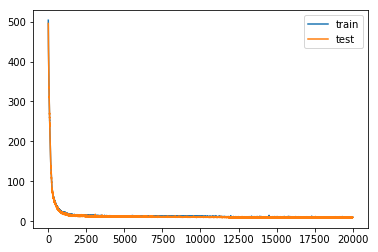

In [289]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=20000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [290]:
yhat = model.predict(validateX)

In [291]:
np.savetxt("yhat.csv", yhat.flatten(), delimiter=",")
np.savetxt("testingX.csv", validateX.flatten(), delimiter=",")
np.savetxt("testingY.csv", validateY.flatten(), delimiter=",")

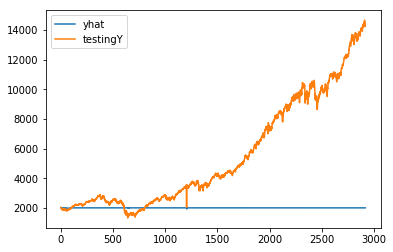

In [292]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [294]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 <= prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    growth.append(initial_capital)

10000
9940.525527667654
9740.528342992706
9582.57350811274
9583.21840264009
9553.940970426956
9400.184282020753
9315.704560178763
9404.64886150544
9304.108148617403
9228.216629423683
9286.128060563973
9378.414220917972
9415.79959444707
9213.292971248758
9313.114266299255
9502.300700192769
9502.63678570929
9281.763819653781
9304.424750915578
9268.946784462853
9254.27592104601
9194.008481726858
9039.113973369069
8983.671553074062
9034.335714068962
9282.990288248855
9231.052411854387
9131.229168482056
9135.640656196741
9310.16061039754
9243.202146816864
9265.369178493505
9303.997094272814
9175.081022181203
9227.01597609292
9487.033163213988
9497.617908662573
9565.502312195287
9422.926068638695
9429.202587429845
9315.26716192683
9235.08300265035
9341.74631690458
9202.88990681128
9065.996430966647
8977.943486879441
8994.697106337799
8978.727686417991
9154.233004386793
8931.666946656751
8832.380953030393
9012.064934254611
9076.630858622026
9007.805415643046
8907.969995259247
9074.40490092564

IndexError: index 2917 is out of bounds for axis 0 with size 2917

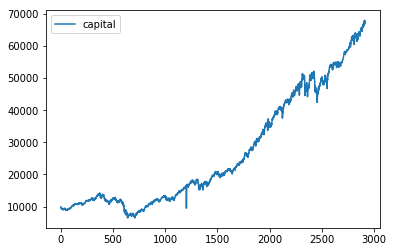

In [298]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()